# TinyML - XGBoost (Regression)

#### Federal University of Rio Grande do Norte

#### Name: Thommas Kevin Sales Flores

## 0. Install the libraries listed in the requirements.txt file

In [1]:
#!pip install -r requirements.txt

## 1. Importing libraries

In [27]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import m2cgen as m2c
import numpy as np
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_tree
import seaborn as sns
import pandas as pd

## 2. Load Dataset

The diabetes dataset was created by Bradley Efron, Trevor Hastie, Iain Johnstone, and Robert Tibshirani at Stanford University. It was used in their research on the prediction of diabetes progression.


- The dataset consists of ten baseline variables, which are clinical and demographic variables:
  1. Age
  2. Sex
  3. Body mass index (BMI)
  4. Average blood pressure
  5. S1 - TC, T-Cells (a type of white blood cell)
  6. S2 - LDL, low-density lipoproteins
  7. S3 - HDL, high-density lipoproteins
  8. S4 - TCH, total cholesterol
  9. S5 - LTG, possibly log of serum triglycerides level
  10. S6 - Glucose, blood sugar level
  
- There are 442 instances (patients) in the dataset.
- The target variable is a quantitative measure of disease progression one year after baseline. It represents the disease's progression based on factors not explicitly stated in the dataset. It is a continuous variable.
 

In [28]:
# Load dataset
data = load_diabetes() # load data

# Create a DataFrame
df_diabetes = pd.DataFrame(data.data, columns=data.feature_names)


# Add target variable to the DataFrame
df_diabetes['target'] = data.target

# Remove NaN values
df = df_diabetes.dropna(axis='rows') #remove NaN

# Display the DataFrame
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [29]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [30]:
df_diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


## 3. Exploratory Data Analysis

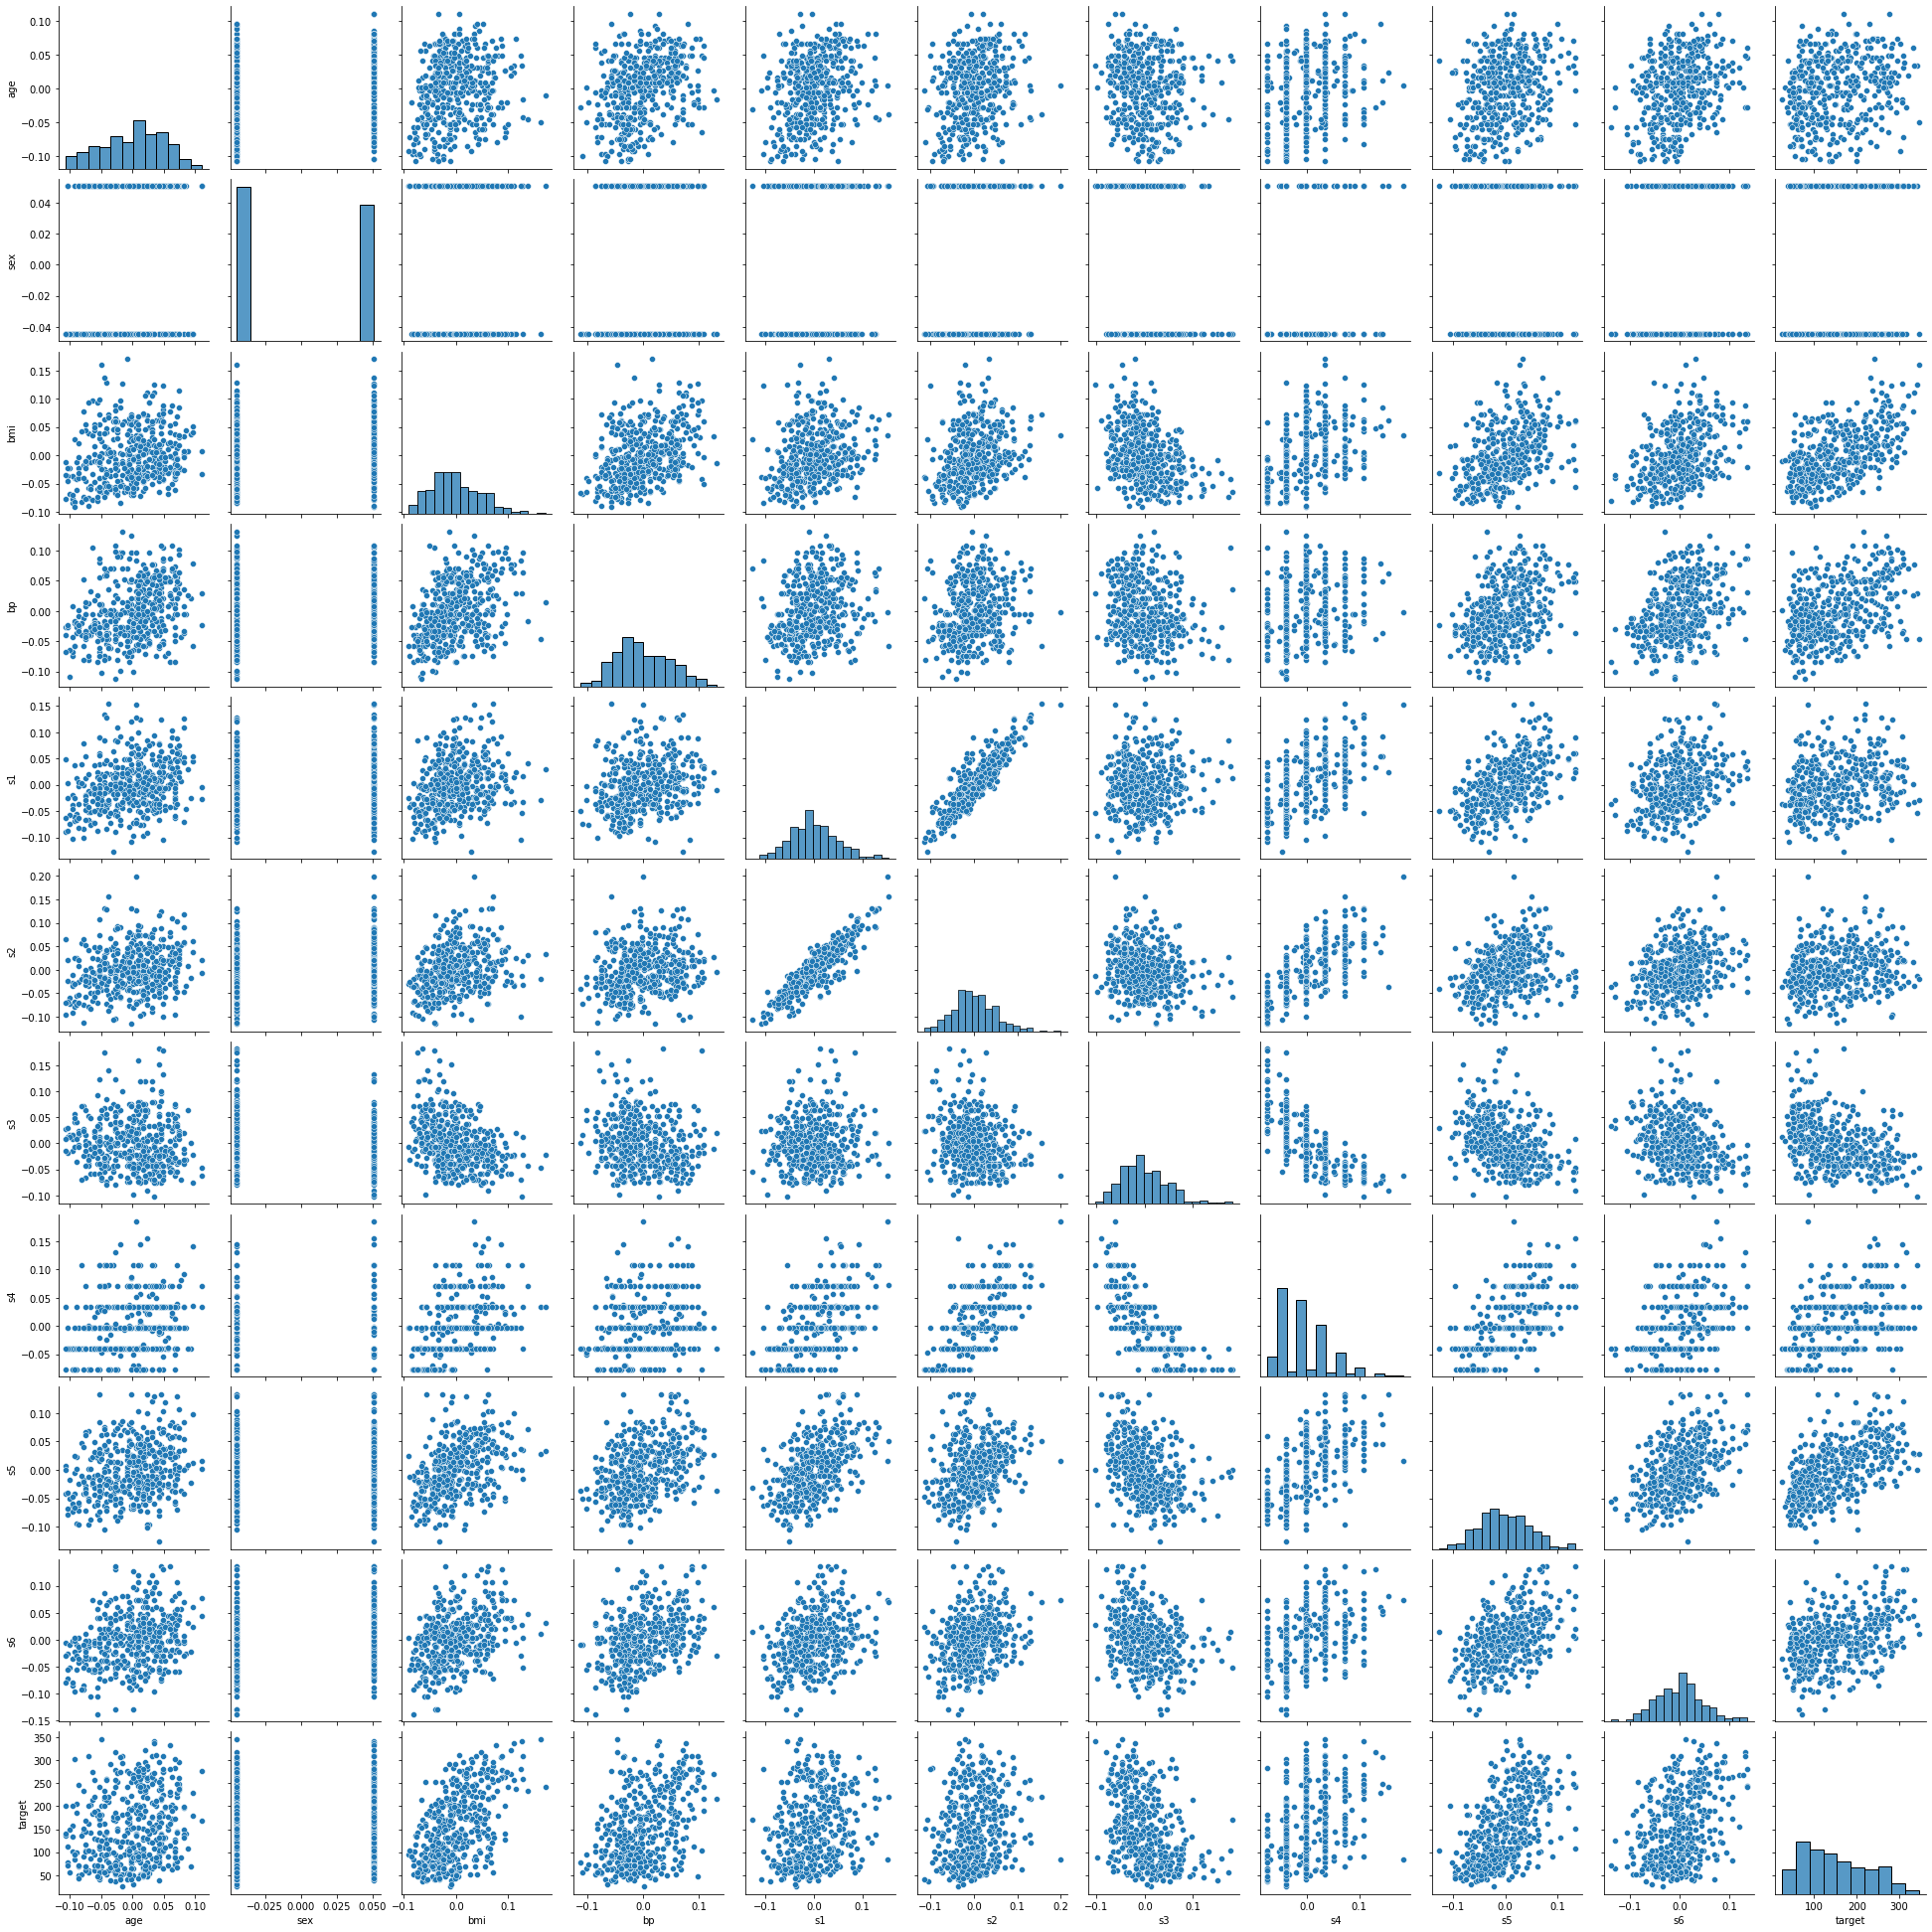

In [31]:
sns.pairplot(df_diabetes)

## 4. Split into training and test data

In [32]:
df = df_diabetes.iloc[:100,0:10]

In [35]:
X=df.to_numpy()

y=df_diabetes.iloc[:100,-1]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

## 5. Create the regressor model

In [38]:
model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

## 6. Train the model

In [39]:
model.fit(X_train, y_train)

[11:45:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=42, reg_alpha=0, ...)

## 7. Model optimization

RandomizedSearchCV is a function provided by the scikit-learn library in Python, commonly used for hyperparameter tuning in machine learning models through cross-validation. This technique proves beneficial when dealing with an extensive search space for hyperparameters and aims to identify the most effective combination of values.

Step-by-Step Explanation
1. Definition of Parameter Space:
Before utilizing RandomizedSearchCV, one needs to specify a search space for the model's hyperparameters. Rather than providing a specific grid of values, distributions are defined for each hyperparameter.

2. Random Sampling:
Instead of evaluating all conceivable combinations of hyperparameters (as in the case of GridSearchCV), RandomizedSearchCV randomly selects a fixed set of combinations for evaluation. This proves advantageous when dealing with a large search space.

3. Model Training:
For each randomly selected set of hyperparameters, RandomizedSearchCV trains the model using cross-validation. The data is divided into folds, with the model being trained on some folds and evaluated on the remaining folds.

4. Performance Evaluation:
Performance is measured using a specified metric (e.g., accuracy, F1-score). The objective is to find hyperparameters that maximize or minimize this metric, depending on the problem at hand (e.g., maximizing accuracy in a classification problem).

5. Selection of the Best Model:
Upon completion of the random search, RandomizedSearchCV returns the set of hyperparameters that led to the best average performance during cross-validation.

By employing RandomizedSearchCV, computational time can be saved compared to an exhaustive grid search (GridSearchCV), especially when dealing with a large search space. This efficiency stems from exploring a random sample of the hyperparameter space rather than evaluating all possible combinations.

In [40]:
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

best_model = RandomizedSearchCV(model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)



best_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[11:45:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:117.54278
[1]	validation_0-rmse:99.35349
[2]	validation_0-rmse:84.10183
[3]	validation_0-rmse:74.69995
[4]	validation_0-rmse:70.48083
[5]	validation_0-rmse:66.47489
[6]	validation_0-rmse:64.03063
[7]	validation_0-rmse:63.23622
[8]	validation_0-rmse:61.81278
[9]	validation_0-rmse:61.82183
[10]	validation_0-rmse:60.45081
[11]	validation_0-rmse:59.46833
[12]	validation_0-rmse:61.43830
[13]	validation_0-rmse:61.56487
[14]	validation_0-rmse:60.62082
[15]	validation_0-rmse:60.03404
[16]	validation_0-rmse:58.94691
[17]	validation_0-rmse:59.21325
[18]	validation_0-rmse:59.12295
[19]	validation_0-rmse:59.82396
[20]	validation_0-rmse:60.42410
[11:45:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/re

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:121.08303
[1]	validation_0-rmse:100.13053
[2]	validation_0-rmse:85.86199
[3]	validation_0-rmse:77.07770
[4]	validation_0-rmse:73.06263
[5]	validation_0-rmse:68.75586
[6]	validation_0-rmse:65.37467
[7]	validation_0-rmse:64.30735
[8]	validation_0-rmse:62.40647
[9]	validation_0-rmse:61.21234
[10]	validation_0-rmse:61.78791
[11]	validation_0-rmse:62.08049
[12]	validation_0-rmse:61.32749
[13]	validation_0-rmse:60.98689
[14]	validation_0-rmse:60.43845
[15]	validation_0-rmse:61.44171
[16]	validation_0-rmse:62.07825
[17]	validation_0-rmse:62.68933
[18]	validation_0-rmse:62.03911
[19]	validation_0-rmse:60.67434
[11:45:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[10]	validation_0-rmse:61.12878
[11]	validation_0-rmse:61.14250
[12]	validation_0-rmse:60.51010
[13]	validation_0-rmse:60.30026
[14]	validation_0-rmse:60.07219
[15]	validation_0-rmse:60.10981
[16]	validation_0-rmse:60.11971
[17]	validation_0-rmse:59.96129
[18]	validation_0-rmse:59.80532
[19]	validation_0-rmse:59.76568
[20]	validation_0-rmse:59.81856
[21]	validation_0-rmse:59.64633
[22]	validation_0-rmse:59.66310
[23]	validation_0-rmse:59.63888
[24]	validation_0-rmse:59.76957
[25]	validation_0-rmse:59.70366
[26]	validation_0-rmse:59.71143
[27]	validation_0-rmse:59.68894
[28]	validation_0-rmse:59.65222
[11:45:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:118.01401
[1]	validation_0-rmse:95.05653
[2]	validation_0-rmse:85.76960
[3]	validation_0-rmse:82.28422
[4]	validation_0-rmse:77.36207
[5]	validation_0-rmse:74.10669
[6]	validation_0-rmse:72.27

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:71.97792
[5]	validation_0-rmse:69.91579
[6]	validation_0-rmse:69.74410
[7]	validation_0-rmse:69.81303
[8]	validation_0-rmse:71.28701
[9]	validation_0-rmse:68.78841
[10]	validation_0-rmse:67.93799
[11]	validation_0-rmse:68.02652
[12]	validation_0-rmse:67.95042
[13]	validation_0-rmse:67.55576
[14]	validation_0-rmse:66.93810
[15]	validation_0-rmse:66.51901
[16]	validation_0-rmse:66.10713
[17]	validation_0-rmse:66.42115
[18]	validation_0-rmse:66.27879
[19]	validation_0-rmse:65.27691
[20]	validation_0-rmse:64.99933
[21]	validation_0-rmse:65.16770
[22]	validation_0-rmse:65.15451
[23]	validation_0-rmse:65.75619
[24]	validation_0-rmse:66.05008
[25]	validation_0-rmse:66.75852
[11:45:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:118.25763
[1]	validation_0-rmse:91.99355
[2]	validation_0-rmse:78.55090
[3]	validation_0-rmse:73.41489


c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[2]	validation_0-rmse:98.22216
[3]	validation_0-rmse:88.39153
[4]	validation_0-rmse:82.24037
[5]	validation_0-rmse:78.01045
[6]	validation_0-rmse:73.03468
[7]	validation_0-rmse:68.89556
[8]	validation_0-rmse:68.24763
[9]	validation_0-rmse:64.76260
[10]	validation_0-rmse:62.75610
[11]	validation_0-rmse:63.53060
[12]	validation_0-rmse:62.75439
[13]	validation_0-rmse:61.98774
[14]	validation_0-rmse:62.28400
[15]	validation_0-rmse:62.67224
[16]	validation_0-rmse:62.43091
[17]	validation_0-rmse:62.31608
[11:45:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:127.43315
[1]	validation_0-rmse:107.05575
[2]	validation_0-rmse:93.41418
[3]	validation_0-rmse:86.94306
[4]	validation_0-rmse:79.80332
[5]	validation_0-rmse:74.79424
[6]	validation_0-rmse:71.54891
[7]	validation_0-rmse:69.82748
[8]	validation_0-rmse:67.89043
[9]	validation_0-rmse:65.12137
[10]	v

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:65.77215
[30]	validation_0-rmse:66.20225
[11:45:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:132.60504
[1]	validation_0-rmse:121.17498
[2]	validation_0-rmse:112.22391
[3]	validation_0-rmse:105.46816
[4]	validation_0-rmse:98.50792
[5]	validation_0-rmse:93.85225
[6]	validation_0-rmse:89.89016
[7]	validation_0-rmse:84.54889
[8]	validation_0-rmse:81.23509
[9]	validation_0-rmse:77.10124
[10]	validation_0-rmse:75.26902
[11]	validation_0-rmse:73.63803
[12]	validation_0-rmse:71.76363
[13]	validation_0-rmse:70.04422
[14]	validation_0-rmse:67.71983
[15]	validation_0-rmse:67.27290
[16]	validation_0-rmse:66.61580
[17]	validation_0-rmse:66.49611
[18]	validation_0-rmse:65.45598
[19]	validation_0-rmse:64.66887
[20]	validation_0-rmse:64.44793
[21]	validation_0-rmse:64.24734
[22]	validation_0-rmse:64.08069
[23]	validation_0-rmse:64.078

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:125.75900
[1]	validation_0-rmse:112.99750
[2]	validation_0-rmse:101.65530
[3]	validation_0-rmse:91.84474
[4]	validation_0-rmse:87.44922
[5]	validation_0-rmse:82.42145
[6]	validation_0-rmse:80.88187
[7]	validation_0-rmse:78.90710
[8]	validation_0-rmse:77.70601
[9]	validation_0-rmse:77.38740
[10]	validation_0-rmse:77.30651
[11]	validation_0-rmse:76.94715
[12]	validation_0-rmse:77.25544
[13]	validation_0-rmse:77.49399
[14]	validation_0-rmse:76.99173
[15]	validation_0-rmse:76.93458
[16]	validation_0-rmse:76.51815
[17]	validation_0-rmse:76.03394
[18]	validation_0-rmse:75.83064
[19]	validation_0-rmse:75.66509
[20]	validation_0-rmse:75.51223
[21]	validation_0-rmse:75.75652
[22]	validation_0-rmse:75.72284
[23]	validation_0-rmse:75.66256
[24]	validation_0-rmse:75.60942
[11:45:10] WARNING: C:/Users/a

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:62.38904
[20]	validation_0-rmse:62.34070
[21]	validation_0-rmse:62.32096
[11:45:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:142.01026
[1]	validation_0-rmse:137.81119
[2]	validation_0-rmse:134.27966
[3]	validation_0-rmse:130.72464
[4]	validation_0-rmse:127.49367
[5]	validation_0-rmse:124.05922
[6]	validation_0-rmse:121.30403
[7]	validation_0-rmse:118.54695
[8]	validation_0-rmse:115.69098
[9]	validation_0-rmse:113.20807
[10]	validation_0-rmse:110.85442
[11]	validation_0-rmse:107.83639
[12]	validation_0-rmse:105.34185
[13]	validation_0-rmse:103.30022
[14]	validation_0-rmse:101.15728
[15]	validation_0-rmse:98.90452
[16]	validation_0-rmse:96.75998
[17]	validation_0-rmse:94.91858
[18]	validation_0-rmse:92.97260
[19]	validation_0-rmse:91.31029
[20]	validation_0-rmse:89.74317
[21]	validation_0-rmse:88.49272
[22]	validation_0-

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[72]	validation_0-rmse:64.39904
[73]	validation_0-rmse:64.34597
[74]	validation_0-rmse:64.48222
[75]	validation_0-rmse:64.50193
[11:45:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:142.01699
[1]	validation_0-rmse:138.87759
[2]	validation_0-rmse:135.27495
[3]	validation_0-rmse:131.93007
[4]	validation_0-rmse:128.70999
[5]	validation_0-rmse:125.98595
[6]	validation_0-rmse:123.36837
[7]	validation_0-rmse:120.34116
[8]	validation_0-rmse:117.29301
[9]	validation_0-rmse:114.74913
[10]	validation_0-rmse:111.82522
[11]	validation_0-rmse:110.10388
[12]	validation_0-rmse:108.12034
[13]	validation_0-rmse:106.50465
[14]	validation_0-rmse:104.34357
[15]	validation_0-rmse:102.63657
[16]	validation_0-rmse:101.05428
[17]	validation_0-rmse:99.48542
[18]	validation_0-rmse:97.67482
[19]	validation_0-rmse:95.59153
[20]	validation_0-rmse:94.48094
[21]	validation_

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[91]	validation_0-rmse:62.03718
[92]	validation_0-rmse:62.06829
[93]	validation_0-rmse:62.28626
[94]	validation_0-rmse:62.23014
[11:45:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:142.47864
[1]	validation_0-rmse:139.03727
[2]	validation_0-rmse:135.64140
[3]	validation_0-rmse:132.37159
[4]	validation_0-rmse:129.33315
[5]	validation_0-rmse:126.34835
[6]	validation_0-rmse:123.56412
[7]	validation_0-rmse:120.99384
[8]	validation_0-rmse:118.03488
[9]	validation_0-rmse:115.37045
[10]	validation_0-rmse:112.95292
[11]	validation_0-rmse:110.54580
[12]	validation_0-rmse:108.21294
[13]	validation_0-rmse:105.88427
[14]	validation_0-rmse:103.59936
[15]	validation_0-rmse:101.36015
[16]	validation_0-rmse:99.25199
[17]	validation_0-rmse:97.30013
[18]	validation_0-rmse:95.41397
[19]	validation_0-rmse:93.73040
[20]	validation_0-rmse:91.96285
[21]	validation_

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-rmse:71.72260
[39]	validation_0-rmse:70.93242
[40]	validation_0-rmse:70.15303
[41]	validation_0-rmse:69.62242
[42]	validation_0-rmse:68.78469
[43]	validation_0-rmse:68.15006
[44]	validation_0-rmse:67.41312
[45]	validation_0-rmse:66.82702
[46]	validation_0-rmse:66.26306
[47]	validation_0-rmse:65.89500
[48]	validation_0-rmse:65.43645
[49]	validation_0-rmse:64.78309
[50]	validation_0-rmse:64.35175
[51]	validation_0-rmse:63.94507
[52]	validation_0-rmse:63.51617
[53]	validation_0-rmse:63.27780
[54]	validation_0-rmse:62.92131
[55]	validation_0-rmse:62.58454
[56]	validation_0-rmse:62.42982
[57]	validation_0-rmse:62.10062
[58]	validation_0-rmse:61.63148
[59]	validation_0-rmse:61.37202
[60]	validation_0-rmse:61.14929
[61]	validation_0-rmse:60.98744
[62]	validation_0-rmse:60.87310
[63]	validation_0-rmse:60.63043
[64]	validation_0-rmse:60.50047
[65]	validation_0-rmse:60.20193
[66]	validation_0-rmse:60.15637
[67]	validation_0-rmse:60.06395
[68]	validation_0-rmse:59.90646
[69]	val

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[4]	validation_0-rmse:77.47762
[5]	validation_0-rmse:71.58698
[6]	validation_0-rmse:68.20642
[7]	validation_0-rmse:67.48948
[8]	validation_0-rmse:67.24584
[9]	validation_0-rmse:66.35485
[10]	validation_0-rmse:66.07297
[11]	validation_0-rmse:65.33214
[12]	validation_0-rmse:64.95899
[13]	validation_0-rmse:64.40080
[14]	validation_0-rmse:63.83561
[15]	validation_0-rmse:63.59271
[16]	validation_0-rmse:63.83171
[17]	validation_0-rmse:63.74763
[18]	validation_0-rmse:64.22380
[19]	validation_0-rmse:64.07616
[20]	validation_0-rmse:63.96902
[11:45:11] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:129.85675
[1]	validation_0-rmse:114.38799
[2]	validation_0-rmse:105.67862
[3]	validation_0-rmse:97.13401
[4]	validation_0-rmse:90.66266
[5]	validation_0-rmse:83.68145
[6]	validation_0-rmse:78.53363
[7]	validation_0-rmse:74.52055
[8]	validation_0-rmse:73.03241
[9

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[11]	validation_0-rmse:67.02140
[12]	validation_0-rmse:65.37839
[13]	validation_0-rmse:64.49477
[14]	validation_0-rmse:63.77590
[15]	validation_0-rmse:62.94144
[16]	validation_0-rmse:62.58653
[17]	validation_0-rmse:62.56700
[18]	validation_0-rmse:62.41603
[19]	validation_0-rmse:62.41027
[20]	validation_0-rmse:62.29299
[21]	validation_0-rmse:61.97208
[22]	validation_0-rmse:61.93407
[23]	validation_0-rmse:61.82766
[24]	validation_0-rmse:61.67177
[25]	validation_0-rmse:61.95845
[26]	validation_0-rmse:61.85928
[27]	validation_0-rmse:61.69678
[28]	validation_0-rmse:61.78863
[11:45:11] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:120.41762
[1]	validation_0-rmse:102.94403
[2]	validation_0-rmse:91.23637
[3]	validation_0-rmse:79.37301
[4]	validation_0-rmse:74.19884
[5]	validation_0-rmse:68.19886
[6]	validation_0-rmse:66.25012
[7]	validation_0-rmse:64.48

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:11] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:126.25414
[1]	validation_0-rmse:107.96319
[2]	validation_0-rmse:95.65060
[3]	validation_0-rmse:84.92063
[4]	validation_0-rmse:78.07222
[5]	validation_0-rmse:71.65219
[6]	validation_0-rmse:68.33488
[7]	validation_0-rmse:65.34743
[8]	validation_0-rmse:63.83586
[9]	validation_0-rmse:61.82379
[10]	validation_0-rmse:61.19387
[11]	validation_0-rmse:59.71726
[12]	validation_0-rmse:59.57271
[13]	validation_0-rmse:59.27290
[14]	validation_0-rmse:59.18209
[15]	validation_0-rmse:58.47306
[16]	validation_0-rmse:58.71013
[17]	validation_0-rmse:58.23327
[18]	validation_0-rmse:58.71129
[19]	validation_0-rmse:58.55108
[20]	validation_0-rmse:58.58007
[21]	validation_0-rmse:58.49016
[11:45:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linea

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:71.82274
[26]	validation_0-rmse:71.94715
[11:45:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:124.69971
[1]	validation_0-rmse:107.81500
[2]	validation_0-rmse:94.66426
[3]	validation_0-rmse:89.02613
[4]	validation_0-rmse:84.67979
[5]	validation_0-rmse:79.12443
[6]	validation_0-rmse:75.84076
[7]	validation_0-rmse:74.92380
[8]	validation_0-rmse:72.50503
[9]	validation_0-rmse:69.27363
[10]	validation_0-rmse:68.51048
[11]	validation_0-rmse:69.32261
[12]	validation_0-rmse:69.82028
[13]	validation_0-rmse:69.45912
[14]	validation_0-rmse:68.66117
[15]	validation_0-rmse:69.30181
[11:45:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:130.57466
[1]	validation_0-rmse:118.37109
[2]	validation

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[36]	validation_0-rmse:63.41263
[37]	validation_0-rmse:63.40553
[11:45:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:131.53238
[1]	validation_0-rmse:119.35126
[2]	validation_0-rmse:109.67403
[3]	validation_0-rmse:101.23361
[4]	validation_0-rmse:95.17718
[5]	validation_0-rmse:89.91903
[6]	validation_0-rmse:84.24225
[7]	validation_0-rmse:79.38959
[8]	validation_0-rmse:77.30769
[9]	validation_0-rmse:72.49173
[10]	validation_0-rmse:70.65993
[11]	validation_0-rmse:70.38904
[12]	validation_0-rmse:68.82465
[13]	validation_0-rmse:68.52606
[14]	validation_0-rmse:67.91626
[15]	validation_0-rmse:67.18305
[16]	validation_0-rmse:66.13024
[17]	validation_0-rmse:65.43328
[18]	validation_0-rmse:65.01459
[19]	validation_0-rmse:64.85345
[20]	validation_0-rmse:64.59304
[21]	validation_0-rmse:64.85831
[22]	validation_0-rmse:64.45806
[23]	validation_0-rmse:64.10

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-rmse:133.16624
[1]	validation_0-rmse:123.60754
[2]	validation_0-rmse:113.54021
[3]	validation_0-rmse:106.56607
[4]	validation_0-rmse:100.64785
[5]	validation_0-rmse:94.16447
[6]	validation_0-rmse:89.91495
[7]	validation_0-rmse:86.43222
[8]	validation_0-rmse:82.66766
[9]	validation_0-rmse:79.22955
[10]	validation_0-rmse:77.21768
[11]	validation_0-rmse:74.70703
[12]	validation_0-rmse:73.77115
[13]	validation_0-rmse:73.36359
[14]	validation_0-rmse:72.88753
[15]	validation_0-rmse:71.31492
[16]	validation_0-rmse:69.13628
[17]	validation_0-rmse:67.52654
[18]	validation_0-rmse:67.51200
[19]	validation_0-rmse:66.98914
[20]	validation_0-rmse:66.15045
[21]	validation_0-rmse:65.61637
[22]	validation_0-rmse:65.28524
[23]	validation_0-rmse:65.43840
[24]	validation_0-rmse:64.85308
[25]	validation_0-rmse:65.02589
[26]	validation_0-rmse:65.08428
[27]	validation_0-rmse:64.85357
[28]	validation_0-rmse:64.97504
[29]	validation_0-rmse:64.73580
[30]	validation_0-rmse:64.59173
[31]	validat

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:107.89342
[1]	validation_0-rmse:89.30919
[2]	validation_0-rmse:76.65382
[3]	validation_0-rmse:69.21962
[4]	validation_0-rmse:68.87674
[5]	validation_0-rmse:66.94013
[6]	validation_0-rmse:68.38397
[7]	validation_0-rmse:68.69860
[8]	validation_0-rmse:67.98258
[9]	validation_0-rmse:68.18205
[10]	validation_0-rmse:66.38256
[11]	validation_0-rmse:67.40204
[12]	validation_0-rmse:69.05687
[13]	validation_0-rmse:70.00617
[14]	validation_0-rmse:69.93820
[11:45:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:110.07847
[1]	validation_0-rmse:87.18459
[2]	validation_0-rmse:75.05867
[3]	validation_0-rmse:67.79228
[4]	validation_0-rmse:63.94032
[5]	validation_0-rm

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:65.17366
[15]	validation_0-rmse:64.84200
[16]	validation_0-rmse:65.01976
[11:45:13] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:120.93265
[1]	validation_0-rmse:106.02943
[2]	validation_0-rmse:91.92528
[3]	validation_0-rmse:81.94194
[4]	validation_0-rmse:75.10391
[5]	validation_0-rmse:70.69705
[6]	validation_0-rmse:68.37998
[7]	validation_0-rmse:68.59413
[8]	validation_0-rmse:66.13050
[9]	validation_0-rmse:64.20037
[10]	validation_0-rmse:63.34415
[11]	validation_0-rmse:63.59245
[12]	validation_0-rmse:63.71668
[13]	validation_0-rmse:64.09981
[14]	validation_0-rmse:63.79119
[11:45:13] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:122.41567
[1]	validation_0-rmse:102.98947
[2]	validation

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:92.91780
[10]	validation_0-rmse:90.59480
[11]	validation_0-rmse:86.46684
[12]	validation_0-rmse:84.00440
[13]	validation_0-rmse:81.97406
[14]	validation_0-rmse:80.48003
[15]	validation_0-rmse:78.71936
[16]	validation_0-rmse:76.78941
[17]	validation_0-rmse:74.54703
[18]	validation_0-rmse:73.66505
[19]	validation_0-rmse:72.84293
[20]	validation_0-rmse:71.88430
[21]	validation_0-rmse:71.49216
[22]	validation_0-rmse:71.17848
[23]	validation_0-rmse:70.82072
[24]	validation_0-rmse:69.63014
[25]	validation_0-rmse:68.75171
[26]	validation_0-rmse:67.97190
[27]	validation_0-rmse:67.27764
[28]	validation_0-rmse:67.16351
[29]	validation_0-rmse:67.24627
[30]	validation_0-rmse:67.21936
[31]	validation_0-rmse:67.09844
[32]	validation_0-rmse:66.60675
[33]	validation_0-rmse:66.29993
[34]	validation_0-rmse:66.19870
[35]	validation_0-rmse:65.78788
[36]	validation_0-rmse:65.61716
[37]	validation_0-rmse:65.58375
[38]	validation_0-rmse:65.56826
[39]	validation_0-rmse:65.90597
[40]	vali

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[20]	validation_0-rmse:73.94386
[21]	validation_0-rmse:72.36313
[22]	validation_0-rmse:71.55387
[23]	validation_0-rmse:70.62318
[24]	validation_0-rmse:69.59707
[25]	validation_0-rmse:68.64105
[26]	validation_0-rmse:68.18723
[27]	validation_0-rmse:67.84110
[28]	validation_0-rmse:67.08252
[29]	validation_0-rmse:66.66802
[30]	validation_0-rmse:65.98017
[31]	validation_0-rmse:65.83630
[32]	validation_0-rmse:65.94713
[33]	validation_0-rmse:65.65255
[34]	validation_0-rmse:65.47190
[35]	validation_0-rmse:65.30566
[36]	validation_0-rmse:65.14011
[37]	validation_0-rmse:65.01773
[38]	validation_0-rmse:64.70369
[39]	validation_0-rmse:64.46421
[40]	validation_0-rmse:64.37492
[41]	validation_0-rmse:64.16429
[42]	validation_0-rmse:63.82275
[43]	validation_0-rmse:63.89300
[44]	validation_0-rmse:63.60679
[45]	validation_0-rmse:63.35997
[46]	validation_0-rmse:63.21172
[47]	validation_0-rmse:63.15286
[48]	validation_0-rmse:63.04305
[49]	validation_0-rmse:63.05221
[50]	validation_0-rmse:63.03445
[51]	va

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:69.41791
[16]	validation_0-rmse:68.83126
[17]	validation_0-rmse:68.84680
[18]	validation_0-rmse:68.34678
[19]	validation_0-rmse:67.74929
[20]	validation_0-rmse:67.07278
[21]	validation_0-rmse:66.76303
[22]	validation_0-rmse:66.55721
[23]	validation_0-rmse:66.39994
[24]	validation_0-rmse:66.43998
[25]	validation_0-rmse:66.17809
[26]	validation_0-rmse:66.24851
[27]	validation_0-rmse:66.17832
[28]	validation_0-rmse:65.86729
[29]	validation_0-rmse:65.71533
[30]	validation_0-rmse:65.80777
[31]	validation_0-rmse:65.93807
[32]	validation_0-rmse:65.99903
[33]	validation_0-rmse:65.85994
[11:45:13] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:133.71434
[1]	validation_0-rmse:121.70115
[2]	validation_0-rmse:112.04101
[3]	validation_0-rmse:103.51815
[4]	validation_0-rmse:96.29135
[5]	validation_0-rmse:90.22353
[6]	validation_0-rmse:86.

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:102.77773
[3]	validation_0-rmse:92.16542
[4]	validation_0-rmse:83.59080
[5]	validation_0-rmse:80.48183
[6]	validation_0-rmse:76.77011
[7]	validation_0-rmse:73.55081
[8]	validation_0-rmse:70.96219
[9]	validation_0-rmse:68.24422
[10]	validation_0-rmse:66.51415
[11]	validation_0-rmse:66.65507
[12]	validation_0-rmse:65.79845
[13]	validation_0-rmse:64.94540
[14]	validation_0-rmse:64.57215
[15]	validation_0-rmse:64.62193
[16]	validation_0-rmse:63.76545
[17]	validation_0-rmse:63.01077
[18]	validation_0-rmse:62.83908
[19]	validation_0-rmse:62.37404
[20]	validation_0-rmse:62.48932
[21]	validation_0-rmse:62.05677
[22]	validation_0-rmse:62.05686
[23]	validation_0-rmse:62.04311
[24]	validation_0-rmse:62.16114
[25]	validation_0-rmse:62.03733
[26]	validation_0-rmse:62.14406
[27]	validation_0-rmse:62.18150
[28]	validation_0-rmse:62.72899
[29]	validation_0-rmse:62.93979
[30]	validation_0-rmse:63.67345
[11:45:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:120.54043
[1]	validation_0-rmse:100.04761
[2]	validation_0-rmse:84.05855
[3]	validation_0-rmse:77.73758
[4]	validation_0-rmse:72.23943
[5]	validation_0-rmse:69.93768
[6]	validation_0-rmse:66.79808
[7]	validation_0-rmse:64.67763
[8]	validation_0-rmse:62.08377
[9]	validation_0-rmse:61.01772
[10]	validation_0-rmse:60.62625
[11]	validation_0-rmse:60.06696
[12]	validation_0-rmse:60.48326
[13]	validation_0-rmse:60.81285
[14]	validation_0-rmse:60.37106
[15]	validation_0-rmse:60.12589
[16]	validation_0-rmse:60.91079
[11:45:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:137.71022
[1]	validation_0-rmse:130.30007
[2]	validation_0-rmse:124.41244
[3]	validation

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[53]	validation_0-rmse:68.23693
[54]	validation_0-rmse:68.33317
[55]	validation_0-rmse:68.44354
[56]	validation_0-rmse:68.39246
[57]	validation_0-rmse:68.21945
[58]	validation_0-rmse:68.30140
[59]	validation_0-rmse:68.33242
[60]	validation_0-rmse:68.50783
[61]	validation_0-rmse:68.50098
[11:45:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:139.24265
[1]	validation_0-rmse:133.30076
[2]	validation_0-rmse:127.37081
[3]	validation_0-rmse:121.78964
[4]	validation_0-rmse:116.87273
[5]	validation_0-rmse:112.82460
[6]	validation_0-rmse:109.54801
[7]	validation_0-rmse:105.45797
[8]	validation_0-rmse:101.89965
[9]	validation_0-rmse:98.49207
[10]	validation_0-rmse:96.05414
[11]	validation_0-rmse:92.95502
[12]	validation_0-rmse:90.35623
[13]	validation_0-rmse:88.51145
[14]	validation_0-rmse:86.05453
[15]	validation_0-rmse:84.18874
[16]	validation_0-rmse:8

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[15]	validation_0-rmse:82.85744
[16]	validation_0-rmse:81.29181
[17]	validation_0-rmse:80.24634
[18]	validation_0-rmse:78.30354
[19]	validation_0-rmse:76.65550
[20]	validation_0-rmse:75.35360
[21]	validation_0-rmse:73.63787
[22]	validation_0-rmse:72.75807
[23]	validation_0-rmse:71.73326
[24]	validation_0-rmse:70.82859
[25]	validation_0-rmse:69.85940
[26]	validation_0-rmse:69.16749
[27]	validation_0-rmse:68.39589
[28]	validation_0-rmse:67.86725
[29]	validation_0-rmse:67.08002
[30]	validation_0-rmse:66.91635
[31]	validation_0-rmse:66.56797
[32]	validation_0-rmse:66.62914
[33]	validation_0-rmse:66.43260
[34]	validation_0-rmse:66.27977
[35]	validation_0-rmse:66.00504
[36]	validation_0-rmse:65.67542
[37]	validation_0-rmse:65.31068
[38]	validation_0-rmse:65.02773
[39]	validation_0-rmse:64.76760
[40]	validation_0-rmse:64.37829
[41]	validation_0-rmse:64.27242
[42]	validation_0-rmse:64.17123
[43]	validation_0-rmse:64.15106
[44]	validation_0-rmse:64.08434
[45]	validation_0-rmse:63.86329
[46]	va

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[2]	validation_0-rmse:80.73424
[3]	validation_0-rmse:75.40984
[4]	validation_0-rmse:73.89700
[5]	validation_0-rmse:69.13296
[6]	validation_0-rmse:67.98918
[7]	validation_0-rmse:67.31168
[8]	validation_0-rmse:66.06685
[9]	validation_0-rmse:64.99596
[10]	validation_0-rmse:65.39187
[11]	validation_0-rmse:65.06817
[12]	validation_0-rmse:65.06336
[13]	validation_0-rmse:65.51710
[14]	validation_0-rmse:65.22040
[11:45:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:141.11657
[1]	validation_0-rmse:136.67313
[2]	validation_0-rmse:131.43527
[3]	validation_0-rmse:125.78217
[4]	validation_0-rmse:121.66206
[5]	validation_0-rmse:117.07771
[6]	validation_0-rmse:114.13354
[7]	validation_0-rmse:110.54142
[8]	validation_0-rmse:107.02699
[9]	validation_0-rmse:104.82019
[10]	validation_0-rmse:102.12989
[11]	validation_0-rmse:99.18878
[12]	validation_0-rmse:97.331

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[11:45:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:140.26810
[1]	validation_0-rmse:135.04693
[2]	validation_0-rmse:130.52367
[3]	validation_0-rmse:126.27053
[4]	validation_0-rmse:121.80456
[5]	validation_0-rmse:117.92211
[6]	validation_0-rmse:114.85387
[7]	validation_0-rmse:111.52243
[8]	validation_0-rmse:108.40166
[9]	validation_0-rmse:105.25560
[10]	validation_0-rmse:101.80692
[11]	validation_0-rmse:99.79988
[12]	validation_0-rmse:97.10731
[13]	validation_0-rmse:94.74198
[14]	validation_0-rmse:92.89767
[15]	validation_0-rmse:90.94950
[16]	validation_0-rmse:89.52244
[17]	validation_0-rmse:88.08049
[18]	validation_0-rmse:85.88166
[19]	validation_0-rmse:84.49001
[20]	validation_0-rmse:83.66004
[21]	validation_0-rmse:82.05441
[22]	validation_0-rmse:81.25155
[23]	validation_0-rmse:80.46460
[24]	validation_0-rmse:79.07402
[25]	validation_0-rms

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:116.75724
[6]	validation_0-rmse:113.18704
[7]	validation_0-rmse:109.54124
[8]	validation_0-rmse:106.32082
[9]	validation_0-rmse:102.61757
[10]	validation_0-rmse:99.64724
[11]	validation_0-rmse:96.99098
[12]	validation_0-rmse:93.94659
[13]	validation_0-rmse:91.20781
[14]	validation_0-rmse:88.56097
[15]	validation_0-rmse:86.91216
[16]	validation_0-rmse:84.77356
[17]	validation_0-rmse:82.68807
[18]	validation_0-rmse:80.53520
[19]	validation_0-rmse:79.42749
[20]	validation_0-rmse:77.84735
[21]	validation_0-rmse:76.14161
[22]	validation_0-rmse:74.76169
[23]	validation_0-rmse:74.02680
[24]	validation_0-rmse:73.02776
[25]	validation_0-rmse:72.50381
[26]	validation_0-rmse:71.50402
[27]	validation_0-rmse:70.97216
[28]	validation_0-rmse:70.51200
[29]	validation_0-rmse:69.91519
[30]	validation_0-rmse:69.52715
[31]	validation_0-rmse:69.03633
[32]	validation_0-rmse:68.68439
[33]	validation_0-rmse:68.28618
[34]	validation_0-rmse:68.03931
[35]	validation_0-rmse:67.80834
[36]	val

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:70.36612
[34]	validation_0-rmse:70.02928
[35]	validation_0-rmse:69.36164
[36]	validation_0-rmse:69.12422
[37]	validation_0-rmse:68.76467
[38]	validation_0-rmse:68.53313
[39]	validation_0-rmse:68.30768
[40]	validation_0-rmse:67.75844
[41]	validation_0-rmse:67.69805
[42]	validation_0-rmse:67.61337
[43]	validation_0-rmse:67.55479
[44]	validation_0-rmse:67.44533
[45]	validation_0-rmse:67.36662
[46]	validation_0-rmse:67.39731
[47]	validation_0-rmse:67.23243
[48]	validation_0-rmse:67.32532
[49]	validation_0-rmse:67.39100
[50]	validation_0-rmse:67.18584
[51]	validation_0-rmse:67.28933
[52]	validation_0-rmse:67.16268
[53]	validation_0-rmse:67.27369
[54]	validation_0-rmse:67.03714
[55]	validation_0-rmse:67.04852
[56]	validation_0-rmse:67.13548
[57]	validation_0-rmse:67.02915
[58]	validation_0-rmse:67.01948
[59]	validation_0-rmse:66.88532
[60]	validation_0-rmse:66.95739
[61]	validation_0-rmse:66.91956
[62]	validation_0-rmse:66.72759
[63]	validation_0-rmse:66.65229
[64]	val

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[75]	validation_0-rmse:60.59676
[76]	validation_0-rmse:60.64591
[77]	validation_0-rmse:60.50841
[78]	validation_0-rmse:60.48656
[79]	validation_0-rmse:60.55096
[80]	validation_0-rmse:60.44723
[81]	validation_0-rmse:60.39544
[82]	validation_0-rmse:60.37530
[83]	validation_0-rmse:60.40530
[84]	validation_0-rmse:60.43055
[85]	validation_0-rmse:60.42122
[86]	validation_0-rmse:60.47665
[87]	validation_0-rmse:60.51133
[11:45:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:129.43855
[1]	validation_0-rmse:119.28881
[2]	validation_0-rmse:109.16351
[3]	validation_0-rmse:100.30429
[4]	validation_0-rmse:94.67864
[5]	validation_0-rmse:88.38343
[6]	validation_0-rmse:85.24860
[7]	validation_0-rmse:81.21692
[8]	validation_0-rmse:77.60386
[9]	validation_0-rmse:75.52241
[10]	validation_0-rmse:73.44926
[11]	validation_0-rmse:71.17162
[12]	validation_0-rmse:71.25

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:80.40129
[9]	validation_0-rmse:76.61195
[10]	validation_0-rmse:74.76419
[11]	validation_0-rmse:73.95357
[12]	validation_0-rmse:72.66253
[13]	validation_0-rmse:71.08601
[14]	validation_0-rmse:68.77864
[15]	validation_0-rmse:69.07670
[16]	validation_0-rmse:67.97255
[17]	validation_0-rmse:67.23028
[18]	validation_0-rmse:66.46110
[19]	validation_0-rmse:65.94062
[20]	validation_0-rmse:65.64919
[21]	validation_0-rmse:65.02643
[22]	validation_0-rmse:64.51589
[23]	validation_0-rmse:64.01338
[24]	validation_0-rmse:63.78328
[25]	validation_0-rmse:64.31970
[26]	validation_0-rmse:63.53679
[27]	validation_0-rmse:63.48157
[28]	validation_0-rmse:63.43513
[29]	validation_0-rmse:63.68821
[30]	validation_0-rmse:64.23193
[31]	validation_0-rmse:64.22692
[32]	validation_0-rmse:64.08764
[11:45:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:133

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:17] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:121.11275
[1]	validation_0-rmse:103.64463
[2]	validation_0-rmse:91.52431
[3]	validation_0-rmse:79.71621
[4]	validation_0-rmse:74.17970
[5]	validation_0-rmse:69.55549
[6]	validation_0-rmse:67.62477
[7]	validation_0-rmse:65.40972
[8]	validation_0-rmse:63.67967
[9]	validation_0-rmse:62.32552
[10]	validation_0-rmse:62.62227
[11]	validation_0-rmse:61.17986
[12]	validation_0-rmse:61.97921
[13]	validation_0-rmse:62.17488
[14]	validation_0-rmse:62.41839
[15]	validation_0-rmse:62.73916
[16]	validation_0-rmse:63.76743
[11:45:17] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:120.92465
[1]	validation_0-rmse:105.84892
[2]	validation_0-rmse:91.68553
[3]	validation_

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:17] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:127.96337
[1]	validation_0-rmse:113.48219
[2]	validation_0-rmse:102.22215
[3]	validation_0-rmse:93.02423
[4]	validation_0-rmse:85.95288
[5]	validation_0-rmse:79.01697
[6]	validation_0-rmse:76.04333
[7]	validation_0-rmse:72.92409
[8]	validation_0-rmse:70.02725
[9]	validation_0-rmse:68.17559
[10]	validation_0-rmse:67.78020
[11]	validation_0-rmse:66.35923
[12]	validation_0-rmse:66.40383
[13]	validation_0-rmse:66.49592
[14]	validation_0-rmse:65.12162
[15]	validation_0-rmse:64.14004
[16]	validation_0-rmse:63.08790
[17]	validation_0-rmse:61.99602
[18]	validation_0-rmse:61.72881
[19]	validation_0-rmse:61.40978
[20]	validation_0-rmse:60.84742
[21]	validation_0-rmse:60.57276
[22]	validation_0-rmse:60.74797
[23]	validation_0-rmse:61.76033
[24]	validation_0-rmse:61.02963
[25]	validation_0-rmse:61.2318

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:17] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:130.14176
[1]	validation_0-rmse:118.28432
[2]	validation_0-rmse:108.51980
[3]	validation_0-rmse:98.57472
[4]	validation_0-rmse:91.98260
[5]	validation_0-rmse:86.67947
[6]	validation_0-rmse:83.34379
[7]	validation_0-rmse:78.50080
[8]	validation_0-rmse:75.31541
[9]	validation_0-rmse:73.51543
[10]	validation_0-rmse:71.73386
[11]	validation_0-rmse:69.04693
[12]	validation_0-rmse:67.81955
[13]	validation_0-rmse:67.98154
[14]	validation_0-rmse:66.82759
[15]	validation_0-rmse:65.80154
[16]	validation_0-rmse:65.10914
[17]	validation_0-rmse:64.72711
[18]	validation_0-rmse:64.80989
[19]	validation_0-rmse:65.09992
[20]	validation_0-rmse:64.86275
[21]	validation_0-rmse:65.20686
[11:45:17] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:line

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:65.48011
[23]	validation_0-rmse:65.07010
[24]	validation_0-rmse:64.91096
[25]	validation_0-rmse:64.60869
[26]	validation_0-rmse:64.30619
[27]	validation_0-rmse:64.06298
[28]	validation_0-rmse:63.75562
[29]	validation_0-rmse:63.92478
[30]	validation_0-rmse:64.16011
[31]	validation_0-rmse:63.91132
[32]	validation_0-rmse:63.96670
[33]	validation_0-rmse:63.98844
[11:45:17] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:133.35874
[1]	validation_0-rmse:120.61466
[2]	validation_0-rmse:112.98025
[3]	validation_0-rmse:104.30583
[4]	validation_0-rmse:97.01563
[5]	validation_0-rmse:91.40019
[6]	validation_0-rmse:87.15226
[7]	validation_0-rmse:82.85455
[8]	validation_0-rmse:78.03753
[9]	validation_0-rmse:75.51087
[10]	validation_0-rmse:73.07773
[11]	validation_0-rmse:70.55395
[12]	validation_0-rmse:68.71550
[13]	validation_0-rmse:68.036

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:17] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:106.07867
[1]	validation_0-rmse:87.98594
[2]	validation_0-rmse:74.60627
[3]	validation_0-rmse:68.29845
[4]	validation_0-rmse:64.20796
[5]	validation_0-rmse:61.38130
[6]	validation_0-rmse:61.65885
[7]	validation_0-rmse:60.11176
[8]	validation_0-rmse:60.95463
[9]	validation_0-rmse:63.62177
[10]	validation_0-rmse:63.81841
[11]	validation_0-rmse:63.94570
[11:45:17] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:111.06784
[1]	validation_0-rmse:95.93898
[2]	validation_0-rmse:85.74597
[3]	validation_0-rmse:76.21133
[4]	validation_0-rmse:70.85784
[5]	validation_0-rmse:68.12117
[6]	validation_0-rmse:66.83874
[7]	validation_0-rmse:67.00023
[8]	validation_0-rmse:

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:18] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:140.48095
[1]	validation_0-rmse:135.95028
[2]	validation_0-rmse:131.92439
[3]	validation_0-rmse:127.68041
[4]	validation_0-rmse:124.00801
[5]	validation_0-rmse:120.24110
[6]	validation_0-rmse:116.77274
[7]	validation_0-rmse:113.69966
[8]	validation_0-rmse:110.52413
[9]	validation_0-rmse:107.80101
[10]	validation_0-rmse:105.20113
[11]	validation_0-rmse:101.58239
[12]	validation_0-rmse:99.21553
[13]	validation_0-rmse:96.85020
[14]	validation_0-rmse:94.64112
[15]	validation_0-rmse:91.86817
[16]	validation_0-rmse:89.45710
[17]	validation_0-rmse:87.05447
[18]	validation_0-rmse:85.10852
[19]	validation_0-rmse:83.12481
[20]	validation_0-rmse:81.16234
[21]	validation_0-rmse:79.99815
[22]	validation_0-rmse:78.71015
[23]	validation_0-rmse:77.45973
[24]	validation_0-rmse:75.94007
[25]	validation_0-rms

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[54]	validation_0-rmse:64.93098
[55]	validation_0-rmse:64.72380
[56]	validation_0-rmse:64.59829
[57]	validation_0-rmse:64.40065
[58]	validation_0-rmse:64.30421
[59]	validation_0-rmse:64.25765
[60]	validation_0-rmse:64.44230
[61]	validation_0-rmse:64.31662
[62]	validation_0-rmse:64.14528
[63]	validation_0-rmse:64.11758
[64]	validation_0-rmse:64.23933
[65]	validation_0-rmse:64.00546
[66]	validation_0-rmse:63.94286
[67]	validation_0-rmse:63.84238
[68]	validation_0-rmse:63.83686
[69]	validation_0-rmse:63.69560
[70]	validation_0-rmse:63.82222
[71]	validation_0-rmse:63.72776
[72]	validation_0-rmse:63.54954
[73]	validation_0-rmse:63.57922
[74]	validation_0-rmse:63.57454
[75]	validation_0-rmse:63.46161
[76]	validation_0-rmse:63.52990
[77]	validation_0-rmse:63.52871
[78]	validation_0-rmse:63.72606
[79]	validation_0-rmse:63.69563
[11:45:18] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squar

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[35]	validation_0-rmse:69.85844
[36]	validation_0-rmse:69.06347
[37]	validation_0-rmse:68.47291
[38]	validation_0-rmse:67.86781
[39]	validation_0-rmse:67.27242
[40]	validation_0-rmse:66.70252
[41]	validation_0-rmse:66.33456
[42]	validation_0-rmse:65.81003
[43]	validation_0-rmse:65.52707
[44]	validation_0-rmse:65.03252
[45]	validation_0-rmse:64.63697
[46]	validation_0-rmse:64.26118
[47]	validation_0-rmse:63.81656
[48]	validation_0-rmse:63.43961
[49]	validation_0-rmse:62.99537
[50]	validation_0-rmse:62.81065
[51]	validation_0-rmse:62.59520
[52]	validation_0-rmse:62.47679
[53]	validation_0-rmse:62.32604
[54]	validation_0-rmse:62.06698
[55]	validation_0-rmse:61.79510
[56]	validation_0-rmse:61.65727
[57]	validation_0-rmse:61.23329
[58]	validation_0-rmse:61.11644
[59]	validation_0-rmse:60.79028
[60]	validation_0-rmse:60.48917
[61]	validation_0-rmse:60.25657
[62]	validation_0-rmse:59.99764
[63]	validation_0-rmse:59.91292
[64]	validation_0-rmse:59.75593
[65]	validation_0-rmse:59.55486
[66]	va

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:96.60335
[2]	validation_0-rmse:83.44354
[3]	validation_0-rmse:76.23235
[4]	validation_0-rmse:72.27615
[5]	validation_0-rmse:68.73022
[6]	validation_0-rmse:66.83189
[7]	validation_0-rmse:65.50676
[8]	validation_0-rmse:62.20611
[9]	validation_0-rmse:61.72834
[10]	validation_0-rmse:61.48894
[11]	validation_0-rmse:61.32402
[12]	validation_0-rmse:61.73186
[13]	validation_0-rmse:61.66940
[14]	validation_0-rmse:61.40708
[15]	validation_0-rmse:61.39124
[11:45:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:119.31926
[1]	validation_0-rmse:103.95092
[2]	validation_0-rmse:91.44437
[3]	validation_0-rmse:81.89016
[4]	validation_0-rmse:79.14274
[5]	validation_0-rmse:74.17835
[6]	validation_0-rmse:73.43349
[7]	validation_0-rmse:71.16539
[8]	validation_0-rmse:68.74931
[9]	validation_0-rmse:68.49229
[10]	validation_0-rmse:68.48575
[11]	val

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[17]	validation_0-rmse:60.17385
[18]	validation_0-rmse:60.00064
[19]	validation_0-rmse:59.54475
[20]	validation_0-rmse:59.54046
[21]	validation_0-rmse:59.57252
[22]	validation_0-rmse:59.46808
[23]	validation_0-rmse:59.60702
[24]	validation_0-rmse:59.70650
[25]	validation_0-rmse:59.72071
[26]	validation_0-rmse:59.43816
[27]	validation_0-rmse:59.53030
[28]	validation_0-rmse:59.54997
[29]	validation_0-rmse:59.64901
[30]	validation_0-rmse:59.80848
[31]	validation_0-rmse:59.82553
[11:45:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:125.47381
[1]	validation_0-rmse:109.03922
[2]	validation_0-rmse:94.07500
[3]	validation_0-rmse:87.57890
[4]	validation_0-rmse:82.34901
[5]	validation_0-rmse:79.12165
[6]	validation_0-rmse:74.39799
[7]	validation_0-rmse:71.61240
[8]	validation_0-rmse:69.12582
[9]	validation_0-rmse:68.13759
[10]	validation_0-rmse:66.0014

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:89.35136
[4]	validation_0-rmse:82.17552
[5]	validation_0-rmse:75.42420
[6]	validation_0-rmse:74.96554
[7]	validation_0-rmse:72.23755
[8]	validation_0-rmse:69.22765
[9]	validation_0-rmse:66.70071
[10]	validation_0-rmse:66.19989
[11]	validation_0-rmse:64.30823
[12]	validation_0-rmse:65.46620
[13]	validation_0-rmse:65.66691
[14]	validation_0-rmse:64.62081
[15]	validation_0-rmse:65.57962
[11:45:20] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:126.70053
[1]	validation_0-rmse:111.20372
[2]	validation_0-rmse:99.84006
[3]	validation_0-rmse:91.39467
[4]	validation_0-rmse:83.67684
[5]	validation_0-rmse:76.75451
[6]	validation_0-rmse:70.74344
[7]	validation_0-rmse:67.36997
[8]	validation_0-rmse:66.34626
[9]	validation_0-rmse:62.53400
[10]	validation_0-rmse:62.24867
[11]	validation_0-rmse:61.68300
[12]	validation_0-rmse:61.74079
[13]	v

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[6]	validation_0-rmse:76.02290
[7]	validation_0-rmse:72.14964
[8]	validation_0-rmse:68.92732
[9]	validation_0-rmse:66.89615
[10]	validation_0-rmse:66.05401
[11]	validation_0-rmse:65.92589
[12]	validation_0-rmse:65.29784
[13]	validation_0-rmse:65.32826
[14]	validation_0-rmse:64.64819
[15]	validation_0-rmse:64.06045
[16]	validation_0-rmse:64.48021
[17]	validation_0-rmse:64.32147
[18]	validation_0-rmse:64.33936
[19]	validation_0-rmse:63.44317
[20]	validation_0-rmse:63.53756
[21]	validation_0-rmse:63.36890
[22]	validation_0-rmse:63.36480
[23]	validation_0-rmse:63.47819
[24]	validation_0-rmse:63.18542
[25]	validation_0-rmse:63.37746
[26]	validation_0-rmse:63.46813
[27]	validation_0-rmse:63.35563
[28]	validation_0-rmse:63.28264
[29]	validation_0-rmse:62.87783
[30]	validation_0-rmse:62.94825
[31]	validation_0-rmse:63.11055
[32]	validation_0-rmse:63.70038
[33]	validation_0-rmse:63.81702
[11:45:20] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_o

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:70.73702
[30]	validation_0-rmse:70.46292
[31]	validation_0-rmse:70.65561
[32]	validation_0-rmse:70.21753
[33]	validation_0-rmse:70.17681
[34]	validation_0-rmse:70.03170
[35]	validation_0-rmse:69.96904
[36]	validation_0-rmse:69.93814
[37]	validation_0-rmse:70.01679
[38]	validation_0-rmse:70.01421
[39]	validation_0-rmse:70.13819
[40]	validation_0-rmse:70.03444
[11:45:20] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:137.94202
[1]	validation_0-rmse:130.89833
[2]	validation_0-rmse:123.95657
[3]	validation_0-rmse:117.80218
[4]	validation_0-rmse:112.17209
[5]	validation_0-rmse:107.44530
[6]	validation_0-rmse:103.86143
[7]	validation_0-rmse:99.52261
[8]	validation_0-rmse:96.35722
[9]	validation_0-rmse:93.06696
[10]	validation_0-rmse:90.12936
[11]	validation_0-rmse:87.32778
[12]	validation_0-rmse:85.00454
[13]	validation_0-rmse:83.

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:75.03425
[20]	validation_0-rmse:74.21982
[21]	validation_0-rmse:73.05070
[22]	validation_0-rmse:72.31720
[23]	validation_0-rmse:71.78841
[24]	validation_0-rmse:71.08168
[25]	validation_0-rmse:70.85940
[26]	validation_0-rmse:70.41729
[27]	validation_0-rmse:69.90335
[28]	validation_0-rmse:69.79231
[29]	validation_0-rmse:69.75751
[30]	validation_0-rmse:69.71000
[31]	validation_0-rmse:69.51088
[32]	validation_0-rmse:69.43817
[33]	validation_0-rmse:69.46557
[34]	validation_0-rmse:69.21339
[35]	validation_0-rmse:69.23172
[36]	validation_0-rmse:69.16329
[37]	validation_0-rmse:69.03076
[38]	validation_0-rmse:68.87917
[39]	validation_0-rmse:68.92870
[40]	validation_0-rmse:68.89225
[41]	validation_0-rmse:68.83728
[42]	validation_0-rmse:68.77080
[43]	validation_0-rmse:68.68700
[44]	validation_0-rmse:68.59502
[45]	validation_0-rmse:68.59289
[46]	validation_0-rmse:68.68557
[47]	validation_0-rmse:68.56880
[48]	validation_0-rmse:68.53478
[49]	validation_0-rmse:68.61946
[50]	val

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:86.72924
[11]	validation_0-rmse:83.71202
[12]	validation_0-rmse:82.04984
[13]	validation_0-rmse:80.42229
[14]	validation_0-rmse:78.17427
[15]	validation_0-rmse:77.09306
[16]	validation_0-rmse:76.08873
[17]	validation_0-rmse:75.14169
[18]	validation_0-rmse:73.94778
[19]	validation_0-rmse:72.66478
[20]	validation_0-rmse:71.47183
[21]	validation_0-rmse:70.15730
[22]	validation_0-rmse:69.51457
[23]	validation_0-rmse:69.10416
[24]	validation_0-rmse:68.30977
[25]	validation_0-rmse:67.83308
[26]	validation_0-rmse:67.30303
[27]	validation_0-rmse:66.90371
[28]	validation_0-rmse:66.68162
[29]	validation_0-rmse:66.46018
[30]	validation_0-rmse:66.15045
[31]	validation_0-rmse:65.79669
[32]	validation_0-rmse:65.77460
[33]	validation_0-rmse:65.65916
[34]	validation_0-rmse:65.56903
[35]	validation_0-rmse:65.45401
[36]	validation_0-rmse:65.24535
[37]	validation_0-rmse:64.99340
[38]	validation_0-rmse:64.66482
[39]	validation_0-rmse:64.70429
[40]	validation_0-rmse:64.56795
[41]	val

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:72.79629
[15]	validation_0-rmse:72.02975
[16]	validation_0-rmse:70.73208
[17]	validation_0-rmse:70.46016
[18]	validation_0-rmse:70.15862
[19]	validation_0-rmse:69.89467
[20]	validation_0-rmse:69.69946
[21]	validation_0-rmse:69.14462
[22]	validation_0-rmse:69.42245
[23]	validation_0-rmse:69.58014
[24]	validation_0-rmse:69.01297
[25]	validation_0-rmse:68.68619
[26]	validation_0-rmse:68.40902
[27]	validation_0-rmse:68.38975
[28]	validation_0-rmse:68.44966
[29]	validation_0-rmse:68.59583
[30]	validation_0-rmse:68.52486
[31]	validation_0-rmse:68.61931
[32]	validation_0-rmse:68.65436
[11:45:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:135.74560
[1]	validation_0-rmse:126.02179
[2]	validation_0-rmse:117.74704
[3]	validation_0-rmse:110.88369
[4]	validation_0-rmse:104.64238
[5]	validation_0-rmse:99.41016
[6]	validation_0-rmse:93

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:82.79107
[10]	validation_0-rmse:79.75862
[11]	validation_0-rmse:77.64245
[12]	validation_0-rmse:74.54361
[13]	validation_0-rmse:72.64732
[14]	validation_0-rmse:70.56969
[15]	validation_0-rmse:68.96956
[16]	validation_0-rmse:68.13867
[17]	validation_0-rmse:66.80233
[18]	validation_0-rmse:66.09893
[19]	validation_0-rmse:65.12928
[20]	validation_0-rmse:64.61145
[21]	validation_0-rmse:63.85993
[22]	validation_0-rmse:63.28622
[23]	validation_0-rmse:63.35886
[24]	validation_0-rmse:62.83710
[25]	validation_0-rmse:62.86769
[26]	validation_0-rmse:62.38515
[27]	validation_0-rmse:62.19209
[28]	validation_0-rmse:62.10136
[29]	validation_0-rmse:61.74426
[30]	validation_0-rmse:61.71098
[31]	validation_0-rmse:61.92473
[32]	validation_0-rmse:61.91929
[33]	validation_0-rmse:61.92064
[34]	validation_0-rmse:61.74888
[11:45:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:square

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[13]	validation_0-rmse:65.92272
[14]	validation_0-rmse:66.02740
[15]	validation_0-rmse:66.15171
[16]	validation_0-rmse:66.14348
[17]	validation_0-rmse:66.07080
[18]	validation_0-rmse:66.14686
[11:45:22] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:139.65588
[1]	validation_0-rmse:133.58117
[2]	validation_0-rmse:128.07523
[3]	validation_0-rmse:121.38153
[4]	validation_0-rmse:116.83750
[5]	validation_0-rmse:111.58025
[6]	validation_0-rmse:108.26988
[7]	validation_0-rmse:103.91029
[8]	validation_0-rmse:100.91034
[9]	validation_0-rmse:98.31065
[10]	validation_0-rmse:95.58325
[11]	validation_0-rmse:91.82309
[12]	validation_0-rmse:90.00664
[13]	validation_0-rmse:88.29262
[14]	validation_0-rmse:86.84896
[15]	validation_0-rmse:85.16270
[16]	validation_0-rmse:84.49993
[17]	validation_0-rmse:83.17652
[18]	validation_0-rmse:81.78341
[19]	validation_0-rmse:

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[45]	validation_0-rmse:73.73329
[46]	validation_0-rmse:73.56421
[47]	validation_0-rmse:73.50661
[48]	validation_0-rmse:73.61247
[49]	validation_0-rmse:73.65227
[50]	validation_0-rmse:73.58263
[51]	validation_0-rmse:73.54146
[11:45:23] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:139.11820
[1]	validation_0-rmse:132.26803
[2]	validation_0-rmse:126.59647
[3]	validation_0-rmse:120.93001
[4]	validation_0-rmse:115.60335
[5]	validation_0-rmse:111.42907
[6]	validation_0-rmse:106.87463
[7]	validation_0-rmse:103.28057
[8]	validation_0-rmse:100.49972
[9]	validation_0-rmse:97.30453
[10]	validation_0-rmse:94.33412
[11]	validation_0-rmse:90.99419
[12]	validation_0-rmse:88.22282
[13]	validation_0-rmse:85.92309
[14]	validation_0-rmse:83.43575
[15]	validation_0-rmse:81.74539
[16]	validation_0-rmse:80.09809
[17]	validation_0-rmse:78.51985
[18]	validation_0-rmse:7

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[43]	validation_0-rmse:65.09612
[44]	validation_0-rmse:65.04648
[45]	validation_0-rmse:65.12892
[46]	validation_0-rmse:65.03211
[47]	validation_0-rmse:65.00990
[48]	validation_0-rmse:65.11367
[49]	validation_0-rmse:65.13878
[50]	validation_0-rmse:65.07555
[51]	validation_0-rmse:65.01930
[52]	validation_0-rmse:64.90852
[53]	validation_0-rmse:64.79951
[54]	validation_0-rmse:64.92132
[55]	validation_0-rmse:65.11756
[56]	validation_0-rmse:65.06516
[57]	validation_0-rmse:65.14795
[58]	validation_0-rmse:65.23045
[11:45:23] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:138.97284
[1]	validation_0-rmse:133.12309
[2]	validation_0-rmse:127.74213
[3]	validation_0-rmse:122.09710
[4]	validation_0-rmse:117.40785
[5]	validation_0-rmse:112.49310
[6]	validation_0-rmse:107.72977
[7]	validation_0-rmse:103.59587
[8]	validation_0-rmse:100.20355
[9]	validation_0-rmse:9

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[25]	validation_0-rmse:67.47667
[26]	validation_0-rmse:66.69534
[27]	validation_0-rmse:66.07279
[28]	validation_0-rmse:65.39939
[29]	validation_0-rmse:64.72985
[30]	validation_0-rmse:64.04187
[31]	validation_0-rmse:63.78530
[32]	validation_0-rmse:63.36163
[33]	validation_0-rmse:63.05898
[34]	validation_0-rmse:62.38538
[35]	validation_0-rmse:62.24940
[36]	validation_0-rmse:62.01819
[37]	validation_0-rmse:61.83663
[38]	validation_0-rmse:61.42426
[39]	validation_0-rmse:61.25677
[40]	validation_0-rmse:61.25773
[41]	validation_0-rmse:61.27247
[42]	validation_0-rmse:60.98376
[43]	validation_0-rmse:60.75725
[44]	validation_0-rmse:60.57836
[45]	validation_0-rmse:60.36087
[46]	validation_0-rmse:60.22232
[47]	validation_0-rmse:60.25162
[48]	validation_0-rmse:60.27247
[49]	validation_0-rmse:60.18466
[50]	validation_0-rmse:60.13286
[51]	validation_0-rmse:60.23079
[52]	validation_0-rmse:60.23245
[53]	validation_0-rmse:60.33175
[54]	validation_0-rmse:60.28032
[11:45:23] WARNING: C:/Users/administra

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:61.01597
[8]	validation_0-rmse:60.38251
[9]	validation_0-rmse:59.87347
[10]	validation_0-rmse:60.50140
[11]	validation_0-rmse:60.65554
[12]	validation_0-rmse:60.97921
[13]	validation_0-rmse:61.61712
[14]	validation_0-rmse:61.50570
[11:45:24] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:111.17028
[1]	validation_0-rmse:91.82000
[2]	validation_0-rmse:81.12118
[3]	validation_0-rmse:75.30239
[4]	validation_0-rmse:73.76620
[5]	validation_0-rmse:69.96502
[6]	validation_0-rmse:68.09851
[7]	validation_0-rmse:68.22301
[8]	validation_0-rmse:67.61206
[9]	validation_0-rmse:67.55534
[10]	validation_0-rmse:68.15707
[11]	validation_0-rmse:67.60986
[12]	validation_0-rmse:68.49912
[13]	validation_0-rmse:68.72908
[11:45:24] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[15]	validation_0-rmse:62.96020
[11:45:24] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:109.55303
[1]	validation_0-rmse:88.04852
[2]	validation_0-rmse:77.00738
[3]	validation_0-rmse:70.04092
[4]	validation_0-rmse:66.60023
[5]	validation_0-rmse:63.41377
[6]	validation_0-rmse:65.19070
[7]	validation_0-rmse:66.24280
[8]	validation_0-rmse:65.47938
[9]	validation_0-rmse:65.94241
[10]	validation_0-rmse:66.42066
[11:45:24] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:116.35538
[1]	validation_0-rmse:97.39864
[2]	validation_0-rmse:85.96168
[3]	validation_0-rmse:75.26933
[4]	validation_0-rmse:69.96722
[5]	validation_0-rmse:66.17896
[6]	validation_0-rmse:64.97241
[7]	validation_0-rmse:64.94522
[8]	validation_0-rmse

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[3]	validation_0-rmse:77.05901
[4]	validation_0-rmse:72.86254
[5]	validation_0-rmse:69.58249
[6]	validation_0-rmse:69.62465
[7]	validation_0-rmse:68.66968
[8]	validation_0-rmse:66.79277
[9]	validation_0-rmse:66.20126
[10]	validation_0-rmse:66.40662
[11]	validation_0-rmse:65.95241
[12]	validation_0-rmse:66.48640
[13]	validation_0-rmse:66.95660
[14]	validation_0-rmse:66.96566
[15]	validation_0-rmse:66.57444
[16]	validation_0-rmse:66.79546
[11:45:24] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:108.20915
[1]	validation_0-rmse:89.35054
[2]	validation_0-rmse:76.82116
[3]	validation_0-rmse:69.86428
[4]	validation_0-rmse:67.10635
[5]	validation_0-rmse:64.30766
[6]	validation_0-rmse:64.42529
[7]	validation_0-rmse:64.27375
[8]	validation_0-rmse:63.10549
[9]	validation_0-rmse:62.48899
[10]	validation_0-rmse:62.80964
[11]	validation_0-rmse:62.05278
[12]	v

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:24] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:131.07404
[1]	validation_0-rmse:120.13004
[2]	validation_0-rmse:110.92259
[3]	validation_0-rmse:101.33148
[4]	validation_0-rmse:96.93378
[5]	validation_0-rmse:90.18891
[6]	validation_0-rmse:86.26873
[7]	validation_0-rmse:82.45063
[8]	validation_0-rmse:78.78403
[9]	validation_0-rmse:76.99805
[10]	validation_0-rmse:74.81709
[11]	validation_0-rmse:71.25067
[12]	validation_0-rmse:70.65074
[13]	validation_0-rmse:69.83868
[14]	validation_0-rmse:68.79829
[15]	validation_0-rmse:67.59681
[16]	validation_0-rmse:67.20516
[17]	validation_0-rmse:66.84844
[18]	validation_0-rmse:66.72274
[19]	validation_0-rmse:66.14200
[20]	validation_0-rmse:65.44951
[21]	validation_0-rmse:65.00319
[22]	validation_0-rmse:65.29832
[23]	validation_0-rmse:65.66225
[24]	validation_0-rmse:64.66343
[25]	validation_0-rmse:64.748

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:71.99251
[13]	validation_0-rmse:70.36064
[14]	validation_0-rmse:68.47953
[15]	validation_0-rmse:67.91243
[16]	validation_0-rmse:67.75208
[17]	validation_0-rmse:66.98462
[18]	validation_0-rmse:66.03562
[19]	validation_0-rmse:66.06718
[20]	validation_0-rmse:66.47416
[21]	validation_0-rmse:66.17655
[22]	validation_0-rmse:66.02877
[23]	validation_0-rmse:65.64988
[24]	validation_0-rmse:65.37814
[25]	validation_0-rmse:65.04185
[26]	validation_0-rmse:64.66878
[27]	validation_0-rmse:64.42612
[28]	validation_0-rmse:64.26350
[29]	validation_0-rmse:64.45316
[30]	validation_0-rmse:64.89483
[31]	validation_0-rmse:64.81317
[32]	validation_0-rmse:64.64265
[11:45:24] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:134.48489
[1]	validation_0-rmse:123.67183
[2]	validation_0-rmse:113.80898
[3]	validation_0-rmse:106.36646
[4]	validation_0-rmse:9

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[17]	validation_0-rmse:70.75257
[18]	validation_0-rmse:70.32592
[19]	validation_0-rmse:69.74538
[20]	validation_0-rmse:69.10124
[21]	validation_0-rmse:69.36112
[22]	validation_0-rmse:69.05343
[23]	validation_0-rmse:68.76312
[24]	validation_0-rmse:68.00399
[25]	validation_0-rmse:67.81851
[26]	validation_0-rmse:67.27847
[27]	validation_0-rmse:66.93115
[28]	validation_0-rmse:66.65555
[29]	validation_0-rmse:67.01568
[30]	validation_0-rmse:66.66947
[31]	validation_0-rmse:66.79139
[32]	validation_0-rmse:66.47368
[33]	validation_0-rmse:66.44437
[34]	validation_0-rmse:66.42662
[35]	validation_0-rmse:66.49939
[36]	validation_0-rmse:66.49173
[37]	validation_0-rmse:66.39921
[38]	validation_0-rmse:66.43234
[39]	validation_0-rmse:66.66005
[40]	validation_0-rmse:66.60855
[41]	validation_0-rmse:66.79902
[42]	validation_0-rmse:66.67948
[11:45:25] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squa

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:71.75315
[17]	validation_0-rmse:70.07765
[18]	validation_0-rmse:68.68669
[19]	validation_0-rmse:67.12513
[20]	validation_0-rmse:66.52292
[21]	validation_0-rmse:65.21297
[22]	validation_0-rmse:64.71140
[23]	validation_0-rmse:64.27972
[24]	validation_0-rmse:63.34036
[25]	validation_0-rmse:63.21399
[26]	validation_0-rmse:62.64924
[27]	validation_0-rmse:62.55879
[28]	validation_0-rmse:61.81387
[29]	validation_0-rmse:61.42340
[30]	validation_0-rmse:60.98984
[31]	validation_0-rmse:60.85962
[32]	validation_0-rmse:60.57871
[33]	validation_0-rmse:60.58172
[34]	validation_0-rmse:60.41894
[35]	validation_0-rmse:60.30149
[36]	validation_0-rmse:60.20702
[37]	validation_0-rmse:59.91199
[38]	validation_0-rmse:59.70633
[39]	validation_0-rmse:59.74108
[40]	validation_0-rmse:59.48810
[41]	validation_0-rmse:59.66380
[42]	validation_0-rmse:59.60525
[43]	validation_0-rmse:59.66954
[44]	validation_0-rmse:59.66402
[11:45:25] WARNING: C:/Users/administrator/workspace/xgboost-win64_relea

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:81.56024
[4]	validation_0-rmse:76.10406
[5]	validation_0-rmse:69.89016
[6]	validation_0-rmse:66.51901
[7]	validation_0-rmse:64.65639
[8]	validation_0-rmse:63.09354
[9]	validation_0-rmse:62.01415
[10]	validation_0-rmse:60.51119
[11]	validation_0-rmse:60.00220
[12]	validation_0-rmse:60.05237
[13]	validation_0-rmse:60.40874
[14]	validation_0-rmse:59.87532
[15]	validation_0-rmse:60.51762
[16]	validation_0-rmse:60.82250
[17]	validation_0-rmse:60.92561
[18]	validation_0-rmse:61.01190
[19]	validation_0-rmse:61.27308
[11:45:25] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:117.61559
[1]	validation_0-rmse:102.08647
[2]	validation_0-rmse:90.62620
[3]	validation_0-rmse:81.17499
[4]	validation_0-rmse:74.57065
[5]	validation_0-rmse:70.24741
[6]	validation_0-rmse:69.44626
[7]	validation_0-rmse:68.46239
[8]	validation_0-rmse:66.66603
[9]	v

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:69.09958
[7]	validation_0-rmse:67.03305
[8]	validation_0-rmse:65.58759
[9]	validation_0-rmse:62.60072
[10]	validation_0-rmse:61.20523
[11]	validation_0-rmse:61.73102
[12]	validation_0-rmse:61.38628
[13]	validation_0-rmse:61.15534
[14]	validation_0-rmse:60.82452
[15]	validation_0-rmse:61.22330
[16]	validation_0-rmse:61.86940
[17]	validation_0-rmse:62.13771
[18]	validation_0-rmse:61.86737
[19]	validation_0-rmse:61.89475
[11:45:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:124.41473
[1]	validation_0-rmse:106.75714
[2]	validation_0-rmse:93.53340
[3]	validation_0-rmse:83.89314
[4]	validation_0-rmse:76.79701
[5]	validation_0-rmse:73.01490
[6]	validation_0-rmse:69.48494
[7]	validation_0-rmse:67.36987
[8]	validation_0-rmse:64.40949
[9]	validation_0-rmse:62.82384
[10]	validation_0-rmse:63.39421
[11]	validation_0-rmse:62.29874
[12

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:116.71323
[1]	validation_0-rmse:96.61157
[2]	validation_0-rmse:82.67101
[3]	validation_0-rmse:75.42370
[4]	validation_0-rmse:73.49553
[5]	validation_0-rmse:73.16830
[6]	validation_0-rmse:72.01413
[7]	validation_0-rmse:70.78547
[8]	validation_0-rmse:68.77856
[9]	validation_0-rmse:68.80668
[10]	validation_0-rmse:69.11844
[11]	validation_0-rmse:69.63864
[12]	validation_0-rmse:69.94629
[13]	validation_0-rmse:70.50812
[11:45:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:112.33642
[1]	validation_0-rmse:92.99224
[2]	validation_0-rmse:82.30493
[3]	validation_0-rmse:73.59908
[4]	validation_0-rmse:69.16695
[5]	validation_0-rmse:65.49437
[6]	validation_0-rms

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:117.86317
[1]	validation_0-rmse:95.43067
[2]	validation_0-rmse:81.19263
[3]	validation_0-rmse:76.92360
[4]	validation_0-rmse:72.99548
[5]	validation_0-rmse:71.57529
[6]	validation_0-rmse:69.52216
[7]	validation_0-rmse:70.30980
[8]	validation_0-rmse:69.58237
[9]	validation_0-rmse:68.24237
[10]	validation_0-rmse:67.84842
[11]	validation_0-rmse:68.12507
[12]	validation_0-rmse:68.75795
[13]	validation_0-rmse:68.91203
[14]	validation_0-rmse:68.72283
[11:45:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:137.83387
[1]	validation_0-rmse:130.18158
[2]	validation_0-rmse:123.39997
[3]	validation_0-rmse:116.59642
[4]	validation_0-rmse:111.28748
[5]	validation_

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:74.97302
[33]	validation_0-rmse:74.66961
[34]	validation_0-rmse:74.47653
[35]	validation_0-rmse:74.24240
[36]	validation_0-rmse:74.04290
[37]	validation_0-rmse:73.87212
[38]	validation_0-rmse:73.75037
[39]	validation_0-rmse:73.67962
[40]	validation_0-rmse:73.45615
[41]	validation_0-rmse:73.42928
[42]	validation_0-rmse:73.43225
[43]	validation_0-rmse:73.42826
[44]	validation_0-rmse:73.37869
[45]	validation_0-rmse:73.46169
[46]	validation_0-rmse:73.45655
[47]	validation_0-rmse:73.49094
[48]	validation_0-rmse:73.44103
[49]	validation_0-rmse:73.44854
[11:45:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:137.19556
[1]	validation_0-rmse:129.82822
[2]	validation_0-rmse:122.72583
[3]	validation_0-rmse:115.90140
[4]	validation_0-rmse:109.49522
[5]	validation_0-rmse:105.38153
[6]	validation_0-rmse:100.82913
[7]	validation_0-rmse:9

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:129.48364
[2]	validation_0-rmse:121.92538
[3]	validation_0-rmse:115.13241
[4]	validation_0-rmse:109.50964
[5]	validation_0-rmse:103.89844
[6]	validation_0-rmse:98.82109
[7]	validation_0-rmse:95.16682
[8]	validation_0-rmse:91.08347
[9]	validation_0-rmse:87.72371
[10]	validation_0-rmse:85.14319
[11]	validation_0-rmse:82.22216
[12]	validation_0-rmse:79.59098
[13]	validation_0-rmse:77.49459
[14]	validation_0-rmse:75.28889
[15]	validation_0-rmse:73.88107
[16]	validation_0-rmse:71.92045
[17]	validation_0-rmse:70.81840
[18]	validation_0-rmse:69.48344
[19]	validation_0-rmse:68.44017
[20]	validation_0-rmse:67.55802
[21]	validation_0-rmse:67.04153
[22]	validation_0-rmse:66.58060
[23]	validation_0-rmse:66.05489
[24]	validation_0-rmse:65.59459
[25]	validation_0-rmse:65.04655
[26]	validation_0-rmse:64.72359
[27]	validation_0-rmse:64.67500
[28]	validation_0-rmse:64.40231
[29]	validation_0-rmse:64.57260
[30]	validation_0-rmse:64.40210
[31]	validation_0-rmse:64.30692
[32]	validat

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[59]	validation_0-rmse:71.00604
[60]	validation_0-rmse:71.03466
[61]	validation_0-rmse:71.12754
[62]	validation_0-rmse:70.83416
[63]	validation_0-rmse:70.78811
[64]	validation_0-rmse:70.58278
[65]	validation_0-rmse:70.62302
[66]	validation_0-rmse:70.40457
[67]	validation_0-rmse:70.19854
[68]	validation_0-rmse:70.04466
[69]	validation_0-rmse:70.01091
[70]	validation_0-rmse:70.07595
[71]	validation_0-rmse:70.12221
[72]	validation_0-rmse:70.16542
[73]	validation_0-rmse:69.99072
[74]	validation_0-rmse:69.99681
[75]	validation_0-rmse:70.08098
[76]	validation_0-rmse:70.11664
[77]	validation_0-rmse:70.12790
[11:45:27] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:141.93939
[1]	validation_0-rmse:138.22914
[2]	validation_0-rmse:134.95676
[3]	validation_0-rmse:131.70178
[4]	validation_0-rmse:128.51193
[5]	validation_0-rmse:125.67282
[6]	validation_0-rmse:1

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[82]	validation_0-rmse:67.20683
[83]	validation_0-rmse:67.16175
[84]	validation_0-rmse:67.04966
[85]	validation_0-rmse:67.07998
[86]	validation_0-rmse:67.02372
[87]	validation_0-rmse:67.04707
[88]	validation_0-rmse:67.05141
[89]	validation_0-rmse:67.13386
[90]	validation_0-rmse:67.13363
[11:45:27] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:142.40153
[1]	validation_0-rmse:139.05255
[2]	validation_0-rmse:135.35233
[3]	validation_0-rmse:132.30220
[4]	validation_0-rmse:129.21879
[5]	validation_0-rmse:126.66768
[6]	validation_0-rmse:123.98308
[7]	validation_0-rmse:121.05518
[8]	validation_0-rmse:118.11070
[9]	validation_0-rmse:115.42481
[10]	validation_0-rmse:112.80179
[11]	validation_0-rmse:110.23079
[12]	validation_0-rmse:108.06570
[13]	validation_0-rmse:106.72959
[14]	validation_0-rmse:104.54477
[15]	validation_0-rmse:102.46633
[16]	validation_

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[40]	validation_0-rmse:74.06478
[41]	validation_0-rmse:73.42954
[42]	validation_0-rmse:72.83748
[43]	validation_0-rmse:72.25379
[44]	validation_0-rmse:71.69839
[45]	validation_0-rmse:71.23304
[46]	validation_0-rmse:70.69327
[47]	validation_0-rmse:70.13404
[48]	validation_0-rmse:69.65272
[49]	validation_0-rmse:69.10191
[50]	validation_0-rmse:68.82859
[51]	validation_0-rmse:68.56375
[52]	validation_0-rmse:68.11775
[53]	validation_0-rmse:67.83601
[54]	validation_0-rmse:67.55355
[55]	validation_0-rmse:67.07580
[56]	validation_0-rmse:66.81137
[57]	validation_0-rmse:66.37799
[58]	validation_0-rmse:66.06984
[59]	validation_0-rmse:65.68903
[60]	validation_0-rmse:65.32910
[61]	validation_0-rmse:65.00712
[62]	validation_0-rmse:64.73403
[63]	validation_0-rmse:64.64096
[64]	validation_0-rmse:64.55197
[65]	validation_0-rmse:64.21822
[66]	validation_0-rmse:64.19559
[67]	validation_0-rmse:63.92598
[68]	validation_0-rmse:63.77386
[69]	validation_0-rmse:63.67901
[70]	validation_0-rmse:63.69113
[71]	va

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[9]	validation_0-rmse:65.45293
[10]	validation_0-rmse:65.03422
[11]	validation_0-rmse:64.39465
[12]	validation_0-rmse:63.51801
[13]	validation_0-rmse:63.36756
[14]	validation_0-rmse:63.40051
[15]	validation_0-rmse:63.61934
[16]	validation_0-rmse:63.15001
[17]	validation_0-rmse:63.20991
[18]	validation_0-rmse:63.64992
[19]	validation_0-rmse:62.86424
[20]	validation_0-rmse:62.46520
[21]	validation_0-rmse:62.58216
[22]	validation_0-rmse:62.55902
[23]	validation_0-rmse:62.67397
[24]	validation_0-rmse:62.62478
[25]	validation_0-rmse:62.43156
[26]	validation_0-rmse:62.44578
[27]	validation_0-rmse:62.32420
[28]	validation_0-rmse:62.30576
[29]	validation_0-rmse:62.57716
[30]	validation_0-rmse:62.53046
[31]	validation_0-rmse:62.62092
[32]	validation_0-rmse:62.67690
[33]	validation_0-rmse:62.75346
[11:45:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:67.79952
[11]	validation_0-rmse:66.25492
[12]	validation_0-rmse:64.36138
[13]	validation_0-rmse:63.26454
[14]	validation_0-rmse:62.01861
[15]	validation_0-rmse:61.65021
[16]	validation_0-rmse:61.06226
[17]	validation_0-rmse:61.12740
[18]	validation_0-rmse:61.17222
[19]	validation_0-rmse:61.05525
[20]	validation_0-rmse:60.93886
[21]	validation_0-rmse:60.68744
[22]	validation_0-rmse:60.40337
[23]	validation_0-rmse:60.73164
[24]	validation_0-rmse:60.53022
[25]	validation_0-rmse:60.62488
[26]	validation_0-rmse:60.69859
[11:45:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:133.86425
[1]	validation_0-rmse:125.78152
[2]	validation_0-rmse:117.06727
[3]	validation_0-rmse:109.00885
[4]	validation_0-rmse:102.13324
[5]	validation_0-rmse:96.15865
[6]	validation_0-rmse:92.10338
[7]	validation_0-rmse:87.38924
[8]	validation_0-rmse:83.8

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:135.39309
[1]	validation_0-rmse:126.79051
[2]	validation_0-rmse:119.09153
[3]	validation_0-rmse:113.11278
[4]	validation_0-rmse:106.50500
[5]	validation_0-rmse:101.11281
[6]	validation_0-rmse:96.07889
[7]	validation_0-rmse:91.88861
[8]	validation_0-rmse:89.07759
[9]	validation_0-rmse:84.90469
[10]	validation_0-rmse:82.22642
[11]	validation_0-rmse:79.73445
[12]	validation_0-rmse:77.47016
[13]	validation_0-rmse:74.81860
[14]	validation_0-rmse:73.09093
[15]	validation_0-rmse:72.47075
[16]	validation_0-rmse:72.02510
[17]	validation_0-rmse:70.76546
[18]	validation_0-rmse:69.68094
[19]	validation_0-rmse:69.31777
[20]	validation_0-rmse:69.04867
[21]	validation_0-rmse:68.24468
[22]	validation_0-rmse:67.66981
[23]	validation_0-rmse:66.87920
[24]	validation_0-rmse:66.46697
[25]	validation_0-rmse:66.3

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:131.80857
[1]	validation_0-rmse:119.46440
[2]	validation_0-rmse:109.88112
[3]	validation_0-rmse:101.44418
[4]	validation_0-rmse:97.10177
[5]	validation_0-rmse:91.80104
[6]	validation_0-rmse:89.24985
[7]	validation_0-rmse:85.44262
[8]	validation_0-rmse:81.50996
[9]	validation_0-rmse:78.19119
[10]	validation_0-rmse:77.00732
[11]	validation_0-rmse:75.15331
[12]	validation_0-rmse:74.42421
[13]	validation_0-rmse:73.93900
[14]	validation_0-rmse:73.66547
[15]	validation_0-rmse:72.37244
[16]	validation_0-rmse:70.63899
[17]	validation_0-rmse:70.24105
[18]	validation_0-rmse:70.61010
[19]	validation_0-rmse:70.15815
[20]	validation_0-rmse:69.78823
[21]	validation_0-rmse:69.53739
[22]	validation_0-rmse:69.61808
[23]	validation_0-rmse:69.08987
[24]	validation_0-rmse:68.44894
[25]	validation_0-rmse:68.580

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:67.69544
[13]	validation_0-rmse:68.00371
[14]	validation_0-rmse:66.88870
[15]	validation_0-rmse:66.78804
[16]	validation_0-rmse:66.28391
[17]	validation_0-rmse:65.48669
[18]	validation_0-rmse:65.20365
[19]	validation_0-rmse:64.46074
[20]	validation_0-rmse:64.13493
[21]	validation_0-rmse:64.26029
[22]	validation_0-rmse:64.27259
[23]	validation_0-rmse:64.11416
[24]	validation_0-rmse:64.07305
[25]	validation_0-rmse:63.71021
[26]	validation_0-rmse:63.49242
[27]	validation_0-rmse:63.39523
[28]	validation_0-rmse:63.34413
[29]	validation_0-rmse:63.68958
[30]	validation_0-rmse:63.54083
[31]	validation_0-rmse:63.84159
[32]	validation_0-rmse:63.74503
[11:45:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:132.89956
[1]	validation_0-rmse:118.90374
[2]	validation_0-rmse:108.20525
[3]	validation_0-rmse:100.77597
[4]	validation_0-rmse:9

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:132.49108
[1]	validation_0-rmse:121.01108
[2]	validation_0-rmse:111.63878
[3]	validation_0-rmse:103.37345
[4]	validation_0-rmse:97.04361
[5]	validation_0-rmse:91.30515
[6]	validation_0-rmse:86.40216
[7]	validation_0-rmse:82.09855
[8]	validation_0-rmse:79.81878
[9]	validation_0-rmse:76.91172
[10]	validation_0-rmse:73.64474
[11]	validation_0-rmse:72.04765
[12]	validation_0-rmse:70.08578
[13]	validation_0-rmse:70.02909
[14]	validation_0-rmse:68.23676
[15]	validation_0-rmse:68.15520
[16]	validation_0-rmse:66.79861
[17]	validation_0-rmse:66.53989
[18]	validation_0-rmse:66.69313
[19]	validation_0-rmse:66.17344
[20]	validation_0-rmse:66.38393
[21]	validation_0-rmse:66.04963
[22]	validation_0-rmse:65.97574
[23]	validation_0-rmse:65.84096
[24]	validation_0-rmse:65.67464
[25]	validation_0-rmse:65.201

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[4]	validation_0-rmse:98.55555
[5]	validation_0-rmse:92.92223
[6]	validation_0-rmse:88.31367
[7]	validation_0-rmse:85.20626
[8]	validation_0-rmse:80.68612
[9]	validation_0-rmse:76.95301
[10]	validation_0-rmse:74.29450
[11]	validation_0-rmse:72.57653
[12]	validation_0-rmse:70.83105
[13]	validation_0-rmse:70.12716
[14]	validation_0-rmse:68.48543
[15]	validation_0-rmse:68.54673
[16]	validation_0-rmse:68.34195
[17]	validation_0-rmse:67.47655
[18]	validation_0-rmse:66.95921
[19]	validation_0-rmse:65.88207
[20]	validation_0-rmse:65.32977
[21]	validation_0-rmse:64.40724
[22]	validation_0-rmse:64.12488
[23]	validation_0-rmse:64.32933
[24]	validation_0-rmse:63.95658
[25]	validation_0-rmse:64.53611
[26]	validation_0-rmse:63.91004
[27]	validation_0-rmse:63.76662
[28]	validation_0-rmse:63.49832
[29]	validation_0-rmse:63.48180
[30]	validation_0-rmse:63.33870
[31]	validation_0-rmse:63.65986
[32]	validation_0-rmse:63.98705
[33]	validation_0-rmse:63.88862
[34]	validation_0-rmse:63.84166
[11:45:29] WA

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[78]	validation_0-rmse:70.04016
[79]	validation_0-rmse:69.99672
[80]	validation_0-rmse:69.83325
[81]	validation_0-rmse:69.65619
[82]	validation_0-rmse:69.67545
[83]	validation_0-rmse:69.66980
[84]	validation_0-rmse:69.58312
[85]	validation_0-rmse:69.54010
[86]	validation_0-rmse:69.55364
[87]	validation_0-rmse:69.57724
[88]	validation_0-rmse:69.51626
[89]	validation_0-rmse:69.59883
[90]	validation_0-rmse:69.59634
[91]	validation_0-rmse:69.54960
[92]	validation_0-rmse:69.51991
[93]	validation_0-rmse:69.31827
[94]	validation_0-rmse:69.34791
[95]	validation_0-rmse:69.30889
[96]	validation_0-rmse:69.33154
[97]	validation_0-rmse:69.26931
[98]	validation_0-rmse:69.29836
[99]	validation_0-rmse:69.43124
[100]	validation_0-rmse:69.53421
[101]	validation_0-rmse:69.45330
[11:45:29] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:142.27799
[1]	validation_0-rmse

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[77]	validation_0-rmse:68.44631
[78]	validation_0-rmse:68.38412
[79]	validation_0-rmse:68.30115
[80]	validation_0-rmse:68.11229
[81]	validation_0-rmse:68.13279
[82]	validation_0-rmse:68.10072
[83]	validation_0-rmse:68.00685
[84]	validation_0-rmse:68.09670
[85]	validation_0-rmse:68.08874
[86]	validation_0-rmse:68.00599
[87]	validation_0-rmse:68.01309
[88]	validation_0-rmse:68.06549
[89]	validation_0-rmse:68.12076
[90]	validation_0-rmse:68.07013
[91]	validation_0-rmse:68.04164
[11:45:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:142.65609
[1]	validation_0-rmse:139.36822
[2]	validation_0-rmse:135.92978
[3]	validation_0-rmse:133.19714
[4]	validation_0-rmse:130.56128
[5]	validation_0-rmse:127.71895
[6]	validation_0-rmse:125.28159
[7]	validation_0-rmse:123.06551
[8]	validation_0-rmse:120.22760
[9]	validation_0-rmse:117.58821
[10]	validation_0-rmse:

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[84]	validation_0-rmse:64.07874
[85]	validation_0-rmse:63.93928
[86]	validation_0-rmse:63.67976
[87]	validation_0-rmse:63.58066
[88]	validation_0-rmse:63.40887
[89]	validation_0-rmse:63.19074
[90]	validation_0-rmse:63.17320
[91]	validation_0-rmse:63.08543
[92]	validation_0-rmse:63.08352
[93]	validation_0-rmse:62.96059
[94]	validation_0-rmse:62.89582
[95]	validation_0-rmse:62.89756
[96]	validation_0-rmse:62.89101
[97]	validation_0-rmse:62.73302
[98]	validation_0-rmse:62.71062
[99]	validation_0-rmse:62.73049
[100]	validation_0-rmse:62.67174
[101]	validation_0-rmse:62.69027
[102]	validation_0-rmse:62.68955
[103]	validation_0-rmse:62.60647
[104]	validation_0-rmse:62.50488
[105]	validation_0-rmse:62.51546
[106]	validation_0-rmse:62.51133
[107]	validation_0-rmse:62.42264
[108]	validation_0-rmse:62.43406
[109]	validation_0-rmse:62.44281
[110]	validation_0-rmse:62.49488
[111]	validation_0-rmse:62.50945
[112]	validation_0-rmse:62.47742
[11:45:30] WARNING: C:/Users/administrator/workspace/xgboos

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:110.28739
[9]	validation_0-rmse:107.68923
[10]	validation_0-rmse:105.28085
[11]	validation_0-rmse:103.09324
[12]	validation_0-rmse:101.05658
[13]	validation_0-rmse:99.35433
[14]	validation_0-rmse:96.87193
[15]	validation_0-rmse:95.15105
[16]	validation_0-rmse:92.83280
[17]	validation_0-rmse:90.74219
[18]	validation_0-rmse:89.22327
[19]	validation_0-rmse:87.48724
[20]	validation_0-rmse:86.17935
[21]	validation_0-rmse:84.14614
[22]	validation_0-rmse:82.36875
[23]	validation_0-rmse:80.52332
[24]	validation_0-rmse:79.32297
[25]	validation_0-rmse:77.84357
[26]	validation_0-rmse:77.54381
[27]	validation_0-rmse:76.51125
[28]	validation_0-rmse:75.49837
[29]	validation_0-rmse:74.36501
[30]	validation_0-rmse:73.78532
[31]	validation_0-rmse:73.28546
[32]	validation_0-rmse:72.48757
[33]	validation_0-rmse:72.01025
[34]	validation_0-rmse:71.63908
[35]	validation_0-rmse:70.97583
[36]	validation_0-rmse:70.82196
[37]	validation_0-rmse:70.62568
[38]	validation_0-rmse:69.89214
[39]	

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[79]	validation_0-rmse:59.69348
[80]	validation_0-rmse:59.47376
[81]	validation_0-rmse:59.49667
[82]	validation_0-rmse:59.50803
[83]	validation_0-rmse:59.44714
[84]	validation_0-rmse:59.36798
[85]	validation_0-rmse:59.22914
[86]	validation_0-rmse:59.17134
[87]	validation_0-rmse:59.14351
[88]	validation_0-rmse:59.05840
[89]	validation_0-rmse:59.02886
[90]	validation_0-rmse:59.11268
[91]	validation_0-rmse:58.98647
[92]	validation_0-rmse:59.10120
[93]	validation_0-rmse:59.03044
[94]	validation_0-rmse:59.01238
[95]	validation_0-rmse:59.10238
[96]	validation_0-rmse:59.09948
[11:45:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:120.70741
[1]	validation_0-rmse:105.03390
[2]	validation_0-rmse:92.66366
[3]	validation_0-rmse:84.07120
[4]	validation_0-rmse:82.39188
[5]	validation_0-rmse:77.65587
[6]	validation_0-rmse:77.54915
[7]	validation_0-rmse:75.07

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:67.09213
[11]	validation_0-rmse:67.16284
[12]	validation_0-rmse:68.14156
[13]	validation_0-rmse:67.27947
[11:45:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:114.13331
[1]	validation_0-rmse:97.28411
[2]	validation_0-rmse:83.75137
[3]	validation_0-rmse:75.75834
[4]	validation_0-rmse:69.31364
[5]	validation_0-rmse:67.52085
[6]	validation_0-rmse:67.23249
[7]	validation_0-rmse:66.38205
[8]	validation_0-rmse:64.44462
[9]	validation_0-rmse:63.32339
[10]	validation_0-rmse:63.04663
[11]	validation_0-rmse:63.05471
[12]	validation_0-rmse:62.17907
[13]	validation_0-rmse:61.71063
[14]	validation_0-rmse:61.56631
[15]	validation_0-rmse:63.34941
[16]	validation_0-rmse:63.74443
[17]	validation_0-rmse:64.24153
[18]	validation_0-rmse:64.68551
[11:45:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/r

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:125.64234
[1]	validation_0-rmse:109.84598
[2]	validation_0-rmse:98.33477
[3]	validation_0-rmse:89.63046
[4]	validation_0-rmse:83.56868
[5]	validation_0-rmse:76.37717
[6]	validation_0-rmse:73.36773
[7]	validation_0-rmse:72.14599
[8]	validation_0-rmse:69.93836
[9]	validation_0-rmse:68.23205
[10]	validation_0-rmse:67.14244
[11]	validation_0-rmse:66.85064
[12]	validation_0-rmse:66.14052
[13]	validation_0-rmse:65.60836
[14]	validation_0-rmse:65.34143
[15]	validation_0-rmse:64.81781
[16]	validation_0-rmse:65.01064
[17]	validation_0-rmse:65.25619
[18]	validation_0-rmse:65.04803
[19]	validation_0-rmse:65.86219
[20]	validation_0-rmse:65.86396
[11:45:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of 

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:61.52597
[23]	validation_0-rmse:61.54487
[24]	validation_0-rmse:61.71168
[25]	validation_0-rmse:61.95952
[11:45:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:134.91863
[1]	validation_0-rmse:124.80553
[2]	validation_0-rmse:117.43514
[3]	validation_0-rmse:109.20081
[4]	validation_0-rmse:103.18179
[5]	validation_0-rmse:97.68838
[6]	validation_0-rmse:93.90710
[7]	validation_0-rmse:89.35208
[8]	validation_0-rmse:85.46846
[9]	validation_0-rmse:83.37087
[10]	validation_0-rmse:80.07496
[11]	validation_0-rmse:76.71637
[12]	validation_0-rmse:74.94822
[13]	validation_0-rmse:74.07583
[14]	validation_0-rmse:73.13515
[15]	validation_0-rmse:72.21225
[16]	validation_0-rmse:69.83007
[17]	validation_0-rmse:68.46324
[18]	validation_0-rmse:67.58399
[19]	validation_0-rmse:67.33282
[20]	validation_0-rmse:66.81335
[21]	validation_0-rmse:66.88

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[20]	validation_0-rmse:67.98265
[21]	validation_0-rmse:67.32315
[22]	validation_0-rmse:66.93807
[23]	validation_0-rmse:66.66160
[24]	validation_0-rmse:66.29236
[25]	validation_0-rmse:65.65294
[26]	validation_0-rmse:65.18048
[27]	validation_0-rmse:64.72893
[28]	validation_0-rmse:64.18794
[29]	validation_0-rmse:64.31306
[30]	validation_0-rmse:64.58640
[31]	validation_0-rmse:64.32171
[32]	validation_0-rmse:64.25741
[33]	validation_0-rmse:64.17441
[34]	validation_0-rmse:64.44124
[35]	validation_0-rmse:64.07162
[36]	validation_0-rmse:64.03100
[37]	validation_0-rmse:64.07995
[38]	validation_0-rmse:63.98305
[39]	validation_0-rmse:64.15420
[40]	validation_0-rmse:64.12589
[41]	validation_0-rmse:64.07142
[42]	validation_0-rmse:64.10905
[11:45:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:137.12684
[1]	validation_0-rmse:128.43816
[2]	validation_0-rmse:

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:110.54832
[1]	validation_0-rmse:87.93354
[2]	validation_0-rmse:77.42287
[3]	validation_0-rmse:70.09461
[4]	validation_0-rmse:70.38042
[5]	validation_0-rmse:69.32102
[6]	validation_0-rmse:71.05722
[7]	validation_0-rmse:71.17480
[8]	validation_0-rmse:74.16527
[9]	validation_0-rmse:73.38955
[11:45:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:114.05261
[1]	validation_0-rmse:87.17085
[2]	validation_0-rmse:75.24338
[3]	validation_0-rmse:72.88870
[4]	validation_0-rmse:70.39584
[5]	validation_0-rmse:66.54588
[6]	validation_0-rmse:64.66160
[7]	validation_0-rmse:65.21028
[8]	validation_0-rmse:66.15287
[9]	validation_0-rmse:65.13402
[10]	validation_0-rmse:6

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:70.29085
[6]	validation_0-rmse:69.71747
[7]	validation_0-rmse:68.97895
[8]	validation_0-rmse:67.69082
[9]	validation_0-rmse:66.48489
[10]	validation_0-rmse:66.34751
[11]	validation_0-rmse:65.79914
[12]	validation_0-rmse:65.22079
[13]	validation_0-rmse:64.74868
[14]	validation_0-rmse:65.36402
[15]	validation_0-rmse:65.84615
[16]	validation_0-rmse:65.95402
[17]	validation_0-rmse:65.90638
[11:45:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:115.39866
[1]	validation_0-rmse:97.52744
[2]	validation_0-rmse:84.05020
[3]	validation_0-rmse:75.43625
[4]	validation_0-rmse:71.94642
[5]	validation_0-rmse:66.44205
[6]	validation_0-rmse:65.66354
[7]	validation_0-rmse:64.49221
[8]	validation_0-rmse:63.27734
[9]	validation_0-rmse:64.96579
[10]	validation_0-rmse:65.79969
[11]	validation_0-rmse:65.33636
[12]	validation_0-rmse:67.11592
[13]	

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:59.66574
[15]	validation_0-rmse:59.70901
[16]	validation_0-rmse:59.63306
[17]	validation_0-rmse:59.70099
[18]	validation_0-rmse:60.09584
[19]	validation_0-rmse:59.77072
[20]	validation_0-rmse:60.04429
[21]	validation_0-rmse:59.95098
[11:45:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:136.54694
[1]	validation_0-rmse:126.91903
[2]	validation_0-rmse:119.83971
[3]	validation_0-rmse:112.87330
[4]	validation_0-rmse:106.80170
[5]	validation_0-rmse:99.98507
[6]	validation_0-rmse:95.63603
[7]	validation_0-rmse:90.77449
[8]	validation_0-rmse:86.96581
[9]	validation_0-rmse:83.65610
[10]	validation_0-rmse:80.79020
[11]	validation_0-rmse:77.05626
[12]	validation_0-rmse:75.28915
[13]	validation_0-rmse:73.99194
[14]	validation_0-rmse:72.57640
[15]	validation_0-rmse:70.92199
[16]	validation_0-rmse:69.43762
[17]	validation_0-rmse:68.56

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:60.88838
[35]	validation_0-rmse:60.93047
[36]	validation_0-rmse:60.84919
[37]	validation_0-rmse:60.68442
[38]	validation_0-rmse:60.75524
[39]	validation_0-rmse:60.56922
[40]	validation_0-rmse:60.36955
[41]	validation_0-rmse:60.25436
[42]	validation_0-rmse:60.10135
[43]	validation_0-rmse:60.18983
[44]	validation_0-rmse:60.14659
[45]	validation_0-rmse:60.26998
[46]	validation_0-rmse:60.36606
[47]	validation_0-rmse:60.45129
[11:45:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:137.05349
[1]	validation_0-rmse:129.15267
[2]	validation_0-rmse:121.32339
[3]	validation_0-rmse:114.58973
[4]	validation_0-rmse:108.39356
[5]	validation_0-rmse:103.09916
[6]	validation_0-rmse:97.50456
[7]	validation_0-rmse:92.75574
[8]	validation_0-rmse:88.40971
[9]	validation_0-rmse:85.07571
[10]	validation_0-rmse:81.43637
[11]	validation_0-rmse:78.6

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:66.87174
[10]	validation_0-rmse:65.34857
[11]	validation_0-rmse:65.41412
[12]	validation_0-rmse:65.49275
[13]	validation_0-rmse:66.37978
[14]	validation_0-rmse:66.85489
[15]	validation_0-rmse:66.02267
[11:45:33] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:122.13658
[1]	validation_0-rmse:104.01334
[2]	validation_0-rmse:91.72274
[3]	validation_0-rmse:82.36093
[4]	validation_0-rmse:76.15680
[5]	validation_0-rmse:73.93000
[6]	validation_0-rmse:71.71074
[7]	validation_0-rmse:70.13073
[8]	validation_0-rmse:70.31552
[9]	validation_0-rmse:67.43140
[10]	validation_0-rmse:67.87641
[11]	validation_0-rmse:69.09067
[12]	validation_0-rmse:69.03209
[13]	validation_0-rmse:68.89299
[11:45:33] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of r

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:33] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:141.78846
[1]	validation_0-rmse:138.02254
[2]	validation_0-rmse:133.91108
[3]	validation_0-rmse:130.50233
[4]	validation_0-rmse:126.97026
[5]	validation_0-rmse:123.85766
[6]	validation_0-rmse:121.31559
[7]	validation_0-rmse:118.56602
[8]	validation_0-rmse:116.09909
[9]	validation_0-rmse:114.10204
[10]	validation_0-rmse:112.03653
[11]	validation_0-rmse:109.55812
[12]	validation_0-rmse:107.87870
[13]	validation_0-rmse:105.91174
[14]	validation_0-rmse:103.56334
[15]	validation_0-rmse:101.99149
[16]	validation_0-rmse:99.11663
[17]	validation_0-rmse:96.66399
[18]	validation_0-rmse:94.97726
[19]	validation_0-rmse:93.95600
[20]	validation_0-rmse:92.12056
[21]	validation_0-rmse:90.90330
[22]	validation_0-rmse:89.45732
[23]	validation_0-rmse:88.36068
[24]	validation_0-rmse:86.79290
[25]	validation_0

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:110.59628
[12]	validation_0-rmse:108.05053
[13]	validation_0-rmse:105.76295
[14]	validation_0-rmse:103.67931
[15]	validation_0-rmse:102.05000
[16]	validation_0-rmse:99.97897
[17]	validation_0-rmse:98.27141
[18]	validation_0-rmse:96.59699
[19]	validation_0-rmse:94.91023
[20]	validation_0-rmse:92.98102
[21]	validation_0-rmse:91.20206
[22]	validation_0-rmse:90.10961
[23]	validation_0-rmse:88.70603
[24]	validation_0-rmse:86.92074
[25]	validation_0-rmse:86.35053
[26]	validation_0-rmse:85.29166
[27]	validation_0-rmse:83.89552
[28]	validation_0-rmse:82.73347
[29]	validation_0-rmse:81.60100
[30]	validation_0-rmse:80.72056
[31]	validation_0-rmse:79.59446
[32]	validation_0-rmse:78.68129
[33]	validation_0-rmse:77.61530
[34]	validation_0-rmse:77.08634
[35]	validation_0-rmse:76.40822
[36]	validation_0-rmse:75.38676
[37]	validation_0-rmse:74.56852
[38]	validation_0-rmse:73.55579
[39]	validation_0-rmse:72.59670
[40]	validation_0-rmse:72.00533
[41]	validation_0-rmse:71.59974
[42

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:34] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:135.30241
[1]	validation_0-rmse:127.05369
[2]	validation_0-rmse:119.52073
[3]	validation_0-rmse:113.20069
[4]	validation_0-rmse:108.44108
[5]	validation_0-rmse:101.90778
[6]	validation_0-rmse:98.18606
[7]	validation_0-rmse:93.58211
[8]	validation_0-rmse:90.05613
[9]	validation_0-rmse:86.94196
[10]	validation_0-rmse:83.91654
[11]	validation_0-rmse:80.06427
[12]	validation_0-rmse:78.91748
[13]	validation_0-rmse:77.17745
[14]	validation_0-rmse:74.47167
[15]	validation_0-rmse:73.46059
[16]	validation_0-rmse:71.25851
[17]	validation_0-rmse:70.47768
[18]	validation_0-rmse:69.82478
[19]	validation_0-rmse:69.07435
[20]	validation_0-rmse:67.96429
[21]	validation_0-rmse:67.50824
[22]	validation_0-rmse:66.73940
[23]	validation_0-rmse:66.59823
[24]	validation_0-rmse:65.26773
[25]	validation_0-rmse:64.9

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-rmse:63.58187
[45]	validation_0-rmse:63.59151
[11:45:34] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:137.68938
[1]	validation_0-rmse:129.75931
[2]	validation_0-rmse:122.25713
[3]	validation_0-rmse:116.22266
[4]	validation_0-rmse:110.44944
[5]	validation_0-rmse:105.51655
[6]	validation_0-rmse:100.81523
[7]	validation_0-rmse:97.07526
[8]	validation_0-rmse:92.64290
[9]	validation_0-rmse:89.20357
[10]	validation_0-rmse:85.75709
[11]	validation_0-rmse:82.80935
[12]	validation_0-rmse:80.46725
[13]	validation_0-rmse:78.42938
[14]	validation_0-rmse:75.90930
[15]	validation_0-rmse:73.70368
[16]	validation_0-rmse:71.84346
[17]	validation_0-rmse:70.13035
[18]	validation_0-rmse:69.22590
[19]	validation_0-rmse:67.56203
[20]	validation_0-rmse:66.17162
[21]	validation_0-rmse:64.93313
[22]	validation_0-rmse:64.40080
[23]	validation_0-rmse:63.

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[50]	validation_0-rmse:57.85912
[51]	validation_0-rmse:57.69297
[52]	validation_0-rmse:57.71941
[53]	validation_0-rmse:57.72335
[54]	validation_0-rmse:57.70075
[55]	validation_0-rmse:57.75021
[11:45:34] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:140.16021
[1]	validation_0-rmse:134.85134
[2]	validation_0-rmse:130.52844
[3]	validation_0-rmse:126.55511
[4]	validation_0-rmse:122.66173
[5]	validation_0-rmse:118.21278
[6]	validation_0-rmse:115.35225
[7]	validation_0-rmse:112.15141
[8]	validation_0-rmse:109.25122
[9]	validation_0-rmse:107.13086
[10]	validation_0-rmse:104.71627
[11]	validation_0-rmse:101.15521
[12]	validation_0-rmse:98.86145
[13]	validation_0-rmse:96.98167
[14]	validation_0-rmse:95.16024
[15]	validation_0-rmse:93.02950
[16]	validation_0-rmse:90.03027
[17]	validation_0-rmse:87.63063
[18]	validation_0-rmse:86.24485
[19]	validation_0-rms

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:124.93989
[5]	validation_0-rmse:121.75727
[6]	validation_0-rmse:119.05298
[7]	validation_0-rmse:115.43880
[8]	validation_0-rmse:112.59387
[9]	validation_0-rmse:110.03354
[10]	validation_0-rmse:107.45084
[11]	validation_0-rmse:104.68878
[12]	validation_0-rmse:102.66154
[13]	validation_0-rmse:100.42130
[14]	validation_0-rmse:98.01121
[15]	validation_0-rmse:96.10261
[16]	validation_0-rmse:94.39175
[17]	validation_0-rmse:92.40888
[18]	validation_0-rmse:90.57511
[19]	validation_0-rmse:88.69057
[20]	validation_0-rmse:87.27355
[21]	validation_0-rmse:85.45511
[22]	validation_0-rmse:83.84274
[23]	validation_0-rmse:82.50280
[24]	validation_0-rmse:81.21266
[25]	validation_0-rmse:79.79784
[26]	validation_0-rmse:78.47692
[27]	validation_0-rmse:76.92905
[28]	validation_0-rmse:76.40710
[29]	validation_0-rmse:75.99119
[30]	validation_0-rmse:75.11700
[31]	validation_0-rmse:74.44546
[32]	validation_0-rmse:73.67631
[33]	validation_0-rmse:73.18011
[34]	validation_0-rmse:72.73787
[35]

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:121.12011
[1]	validation_0-rmse:105.12870
[2]	validation_0-rmse:92.87089
[3]	validation_0-rmse:83.65155
[4]	validation_0-rmse:75.67523
[5]	validation_0-rmse:72.99800
[6]	validation_0-rmse:70.85903
[7]	validation_0-rmse:69.18009
[8]	validation_0-rmse:69.55448
[9]	validation_0-rmse:70.95094
[10]	validation_0-rmse:70.06099
[11]	validation_0-rmse:70.39635
[11:45:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:120.43364
[1]	validation_0-rmse:102.23959
[2]	validation_0-rmse:92.10980
[3]	validation_0-rmse:84.01784
[4]	validation_0-rmse:79.96524
[5]	validation_0-rmse:77.80348
[6]	validation_0-rmse:76.23884
[7]	validation_0-rmse:74.12293
[8]	validation_0-rms

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:119.39063
[1]	validation_0-rmse:103.97489
[2]	validation_0-rmse:91.21248
[3]	validation_0-rmse:84.82852
[4]	validation_0-rmse:78.71660
[5]	validation_0-rmse:74.29048
[6]	validation_0-rmse:71.16638
[7]	validation_0-rmse:69.52353
[8]	validation_0-rmse:67.43837
[9]	validation_0-rmse:68.50615
[10]	validation_0-rmse:67.92384
[11]	validation_0-rmse:68.23041
[12]	validation_0-rmse:68.35373
[11:45:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:123.21296
[1]	validation_0-rmse:108.90887
[2]	validation_0-rmse:98.77189
[3]	validation_0-rmse:86.92334
[4]	validation_0-rmse:80.53231
[5]	validation_0-rmse:78.11070
[6]	validation_0-rmse:74.84686
[7]	validation_0-rm

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:125.74702
[1]	validation_0-rmse:108.77613
[2]	validation_0-rmse:95.70272
[3]	validation_0-rmse:86.14724
[4]	validation_0-rmse:79.82998
[5]	validation_0-rmse:75.22623
[6]	validation_0-rmse:71.90889
[7]	validation_0-rmse:68.72355
[8]	validation_0-rmse:65.59449
[9]	validation_0-rmse:64.05170
[10]	validation_0-rmse:64.21421
[11]	validation_0-rmse:63.46905
[12]	validation_0-rmse:63.39464
[13]	validation_0-rmse:63.32891
[14]	validation_0-rmse:62.65558
[15]	validation_0-rmse:62.71202
[16]	validation_0-rmse:62.81657
[17]	validation_0-rmse:62.91189
[18]	validation_0-rmse:62.51141
[19]	validation_0-rmse:62.65113
[20]	validation_0-rmse:62.56341
[21]	validation_0-rmse:62.62447
[22]	validation_0-rmse:62.78067
[11:45:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[11]	validation_0-rmse:70.05237
[12]	validation_0-rmse:69.65079
[13]	validation_0-rmse:68.97489
[14]	validation_0-rmse:68.50455
[15]	validation_0-rmse:68.63046
[16]	validation_0-rmse:68.24809
[17]	validation_0-rmse:68.30886
[18]	validation_0-rmse:67.96807
[19]	validation_0-rmse:67.61610
[20]	validation_0-rmse:67.55661
[21]	validation_0-rmse:67.47071
[22]	validation_0-rmse:67.12392
[23]	validation_0-rmse:66.97541
[24]	validation_0-rmse:66.85490
[25]	validation_0-rmse:66.92601
[26]	validation_0-rmse:66.85007
[27]	validation_0-rmse:66.94512
[28]	validation_0-rmse:66.83056
[29]	validation_0-rmse:66.81100
[30]	validation_0-rmse:66.74946
[31]	validation_0-rmse:66.72482
[32]	validation_0-rmse:66.75994
[33]	validation_0-rmse:66.74336
[34]	validation_0-rmse:66.71893
[35]	validation_0-rmse:66.58042
[36]	validation_0-rmse:66.57784
[37]	validation_0-rmse:66.58885
[38]	validation_0-rmse:66.67811
[39]	validation_0-rmse:66.61763
[40]	validation_0-rmse:66.61880
[41]	validation_0-rmse:66.71833
[11:45:

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:139.33100
[1]	validation_0-rmse:133.11791
[2]	validation_0-rmse:126.61153
[3]	validation_0-rmse:121.65093
[4]	validation_0-rmse:116.33689
[5]	validation_0-rmse:111.70747
[6]	validation_0-rmse:108.24475
[7]	validation_0-rmse:104.25480
[8]	validation_0-rmse:101.14303
[9]	validation_0-rmse:98.43717
[10]	validation_0-rmse:95.99440
[11]	validation_0-rmse:92.44065
[12]	validation_0-rmse:90.36668
[13]	validation_0-rmse:87.91524
[14]	validation_0-rmse:86.17059
[15]	validation_0-rmse:84.39431
[16]	validation_0-rmse:82.14321
[17]	validation_0-rmse:79.60030
[18]	validation_0-rmse:78.83324
[19]	validation_0-rmse:78.19751
[20]	validation_0-rmse:76.14428
[21]	validation_0-rmse:74.80041
[22]	validation_0-rmse:73.73377
[23]	validation_0-rmse:73.38371
[24]	validation_0-rmse:71.88524
[25]	validation_0-rmse:7

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:98.50113
[11]	validation_0-rmse:96.49172
[12]	validation_0-rmse:93.84098
[13]	validation_0-rmse:92.16405
[14]	validation_0-rmse:89.60767
[15]	validation_0-rmse:88.16429
[16]	validation_0-rmse:86.32565
[17]	validation_0-rmse:84.26462
[18]	validation_0-rmse:82.94250
[19]	validation_0-rmse:81.45343
[20]	validation_0-rmse:80.57820
[21]	validation_0-rmse:78.73629
[22]	validation_0-rmse:77.29943
[23]	validation_0-rmse:76.47818
[24]	validation_0-rmse:75.24472
[25]	validation_0-rmse:74.49198
[26]	validation_0-rmse:73.46295
[27]	validation_0-rmse:72.91716
[28]	validation_0-rmse:72.27415
[29]	validation_0-rmse:71.63921
[30]	validation_0-rmse:71.12512
[31]	validation_0-rmse:71.00124
[32]	validation_0-rmse:70.76899
[33]	validation_0-rmse:70.60937
[34]	validation_0-rmse:70.41288
[35]	validation_0-rmse:69.90672
[36]	validation_0-rmse:69.77648
[37]	validation_0-rmse:69.81861
[38]	validation_0-rmse:69.44599
[39]	validation_0-rmse:69.33248
[40]	validation_0-rmse:68.78574
[41]	val

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[49]	validation_0-rmse:60.89273
[50]	validation_0-rmse:60.93636
[51]	validation_0-rmse:60.92477
[52]	validation_0-rmse:60.62139
[53]	validation_0-rmse:60.20667
[54]	validation_0-rmse:60.27921
[55]	validation_0-rmse:60.11357
[56]	validation_0-rmse:59.93126
[57]	validation_0-rmse:60.11000
[58]	validation_0-rmse:60.02892
[59]	validation_0-rmse:59.85986
[60]	validation_0-rmse:59.68705
[61]	validation_0-rmse:59.45730
[62]	validation_0-rmse:59.17567
[63]	validation_0-rmse:59.22434
[64]	validation_0-rmse:59.40156
[65]	validation_0-rmse:59.30416
[66]	validation_0-rmse:58.96742
[67]	validation_0-rmse:58.76580
[68]	validation_0-rmse:58.92007
[69]	validation_0-rmse:59.02558
[70]	validation_0-rmse:58.90897
[71]	validation_0-rmse:58.83927
[72]	validation_0-rmse:58.83926
[11:45:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:141.09051
[1]	validation_0-rmse:1

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:142.15762
[1]	validation_0-rmse:138.44413
[2]	validation_0-rmse:134.97186
[3]	validation_0-rmse:131.49074
[4]	validation_0-rmse:128.12133
[5]	validation_0-rmse:125.33079
[6]	validation_0-rmse:122.18926
[7]	validation_0-rmse:118.86124
[8]	validation_0-rmse:116.11482
[9]	validation_0-rmse:112.89901
[10]	validation_0-rmse:110.27550
[11]	validation_0-rmse:107.70694
[12]	validation_0-rmse:105.90594
[13]	validation_0-rmse:103.90163
[14]	validation_0-rmse:101.62396
[15]	validation_0-rmse:99.58660
[16]	validation_0-rmse:97.84296
[17]	validation_0-rmse:95.97816
[18]	validation_0-rmse:93.90156
[19]	validation_0-rmse:91.95005
[20]	validation_0-rmse:90.37642
[21]	validation_0-rmse:89.00349
[22]	validation_0-rmse:87.43294
[23]	validation_0-rmse:86.05890
[24]	validation_0-rmse:84.53385
[25]	validation_0-

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[79]	validation_0-rmse:61.33331
[80]	validation_0-rmse:61.19770
[81]	validation_0-rmse:61.16324
[82]	validation_0-rmse:61.13926
[83]	validation_0-rmse:61.13276
[84]	validation_0-rmse:61.00864
[85]	validation_0-rmse:60.82953
[86]	validation_0-rmse:60.69387
[87]	validation_0-rmse:60.61378
[88]	validation_0-rmse:60.54787
[89]	validation_0-rmse:60.47171
[90]	validation_0-rmse:60.51778
[91]	validation_0-rmse:60.40492
[92]	validation_0-rmse:60.45787
[93]	validation_0-rmse:60.45317
[94]	validation_0-rmse:60.39593
[95]	validation_0-rmse:60.35083
[96]	validation_0-rmse:60.27253
[97]	validation_0-rmse:60.19222
[98]	validation_0-rmse:60.29375
[99]	validation_0-rmse:60.36263
[100]	validation_0-rmse:60.37339
[101]	validation_0-rmse:60.42637
[11:45:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:106.85652
[1]	validation_0-rmse:89.23731
[2]	validation_0-rmse

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:65.68631
[16]	validation_0-rmse:65.67966
[11:45:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:132.23551
[1]	validation_0-rmse:121.24068
[2]	validation_0-rmse:107.88440
[3]	validation_0-rmse:97.94077
[4]	validation_0-rmse:91.02391
[5]	validation_0-rmse:86.71448
[6]	validation_0-rmse:84.43983
[7]	validation_0-rmse:81.50642
[8]	validation_0-rmse:79.98318
[9]	validation_0-rmse:78.49022
[10]	validation_0-rmse:77.96258
[11]	validation_0-rmse:77.51456
[12]	validation_0-rmse:77.13194
[13]	validation_0-rmse:76.84888
[14]	validation_0-rmse:76.16599
[15]	validation_0-rmse:75.62123
[16]	validation_0-rmse:75.03169
[17]	validation_0-rmse:74.80009
[18]	validation_0-rmse:74.82904
[19]	validation_0-rmse:74.56131
[20]	validation_0-rmse:74.28677
[21]	validation_0-rmse:74.25316
[22]	validation_0-rmse:74.19565
[23]	validation_0-rmse:74.2212

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:89.36158
[5]	validation_0-rmse:83.97558
[6]	validation_0-rmse:79.24137
[7]	validation_0-rmse:75.58975
[8]	validation_0-rmse:73.11904
[9]	validation_0-rmse:71.90263
[10]	validation_0-rmse:69.68132
[11]	validation_0-rmse:67.77746
[12]	validation_0-rmse:66.64155
[13]	validation_0-rmse:66.07535
[14]	validation_0-rmse:65.42561
[15]	validation_0-rmse:64.95611
[16]	validation_0-rmse:64.85182
[17]	validation_0-rmse:64.29829
[18]	validation_0-rmse:64.36567
[19]	validation_0-rmse:64.26718
[20]	validation_0-rmse:64.32207
[21]	validation_0-rmse:64.14182
[22]	validation_0-rmse:64.10449
[23]	validation_0-rmse:64.19414
[24]	validation_0-rmse:64.03422
[25]	validation_0-rmse:64.15415
[26]	validation_0-rmse:64.17154
[27]	validation_0-rmse:64.26004
[28]	validation_0-rmse:64.27116
[29]	validation_0-rmse:64.42225
[11:45:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederro

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:116.93172
[1]	validation_0-rmse:98.01210
[2]	validation_0-rmse:84.72950
[3]	validation_0-rmse:75.36302
[4]	validation_0-rmse:70.67247
[5]	validation_0-rmse:67.28549
[6]	validation_0-rmse:65.69004
[7]	validation_0-rmse:66.03345
[8]	validation_0-rmse:63.97037
[9]	validation_0-rmse:63.58741
[10]	validation_0-rmse:61.78836
[11]	validation_0-rmse:61.33393
[12]	validation_0-rmse:61.94674
[13]	validation_0-rmse:61.48508
[14]	validation_0-rmse:60.85552
[15]	validation_0-rmse:61.29865
[16]	validation_0-rmse:62.27088
[17]	validation_0-rmse:63.13151
[18]	validation_0-rmse:64.63656
[11:45:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:116.84408
[1]	validation_

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[14]	validation_0-rmse:60.68050
[11:45:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:122.11197
[1]	validation_0-rmse:106.92717
[2]	validation_0-rmse:94.15953
[3]	validation_0-rmse:83.73539
[4]	validation_0-rmse:77.74416
[5]	validation_0-rmse:74.30241
[6]	validation_0-rmse:72.29829
[7]	validation_0-rmse:71.38021
[8]	validation_0-rmse:69.97463
[9]	validation_0-rmse:70.17148
[10]	validation_0-rmse:71.08808
[11]	validation_0-rmse:70.47851
[12]	validation_0-rmse:70.52661
[13]	validation_0-rmse:70.97841
[11:45:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:117.37556
[1]	validation_0-rmse:95.68490
[2]	validation_0-rmse:80.47483
[3]	validation_0-rmse:74.26742
[4]	validation_0-rmse:68.04264
[5]	validation_0-

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:62.48640
[8]	validation_0-rmse:61.46624
[9]	validation_0-rmse:62.43279
[10]	validation_0-rmse:61.35955
[11]	validation_0-rmse:61.73156
[12]	validation_0-rmse:62.77599
[13]	validation_0-rmse:63.28765
[14]	validation_0-rmse:63.39150
[15]	validation_0-rmse:62.79666
[11:45:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:112.79279
[1]	validation_0-rmse:90.53131
[2]	validation_0-rmse:81.36622
[3]	validation_0-rmse:75.30865
[4]	validation_0-rmse:71.66755
[5]	validation_0-rmse:69.19886
[6]	validation_0-rmse:68.02578
[7]	validation_0-rmse:67.77347
[8]	validation_0-rmse:68.51415
[9]	validation_0-rmse:67.82131
[10]	validation_0-rmse:68.02025
[11]	validation_0-rmse:68.82620
[12]	validation_0-rmse:69.38622
[11:45:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:66.75896
[11]	validation_0-rmse:67.14389
[12]	validation_0-rmse:67.38136
[13]	validation_0-rmse:68.18719
[14]	validation_0-rmse:68.69301
[11:45:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:123.32588
[1]	validation_0-rmse:105.80992
[2]	validation_0-rmse:93.90890
[3]	validation_0-rmse:86.70784
[4]	validation_0-rmse:80.31005
[5]	validation_0-rmse:74.81581
[6]	validation_0-rmse:70.82046
[7]	validation_0-rmse:68.29236
[8]	validation_0-rmse:67.46509
[9]	validation_0-rmse:66.10730
[10]	validation_0-rmse:66.22280
[11]	validation_0-rmse:65.94280
[12]	validation_0-rmse:65.46466
[13]	validation_0-rmse:65.42924
[14]	validation_0-rmse:64.75086
[15]	validation_0-rmse:65.44867
[16]	validation_0-rmse:65.46821
[17]	validation_0-rmse:65.30713
[18]	validation_0-rmse:65.30285
[11:45:38] WARNING: C:/Users/administrator/workspace/xgboost-wi

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:62.49764
[11]	validation_0-rmse:61.66403
[12]	validation_0-rmse:62.85495
[13]	validation_0-rmse:63.21683
[14]	validation_0-rmse:63.70253
[15]	validation_0-rmse:63.93669
[11:45:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:121.90189
[1]	validation_0-rmse:107.36217
[2]	validation_0-rmse:93.37471
[3]	validation_0-rmse:83.54772
[4]	validation_0-rmse:77.92735
[5]	validation_0-rmse:74.45946
[6]	validation_0-rmse:70.85560
[7]	validation_0-rmse:69.86108
[8]	validation_0-rmse:67.20959
[9]	validation_0-rmse:66.81502
[10]	validation_0-rmse:66.11651
[11]	validation_0-rmse:66.50574
[12]	validation_0-rmse:66.45480
[13]	validation_0-rmse:66.31582
[14]	validation_0-rmse:66.37797
[15]	validation_0-rmse:66.10574
[16]	validation_0-rmse:66.15834
[17]	validation_0-rmse:66.23739
[18]	validation_0-rmse:66.22011
[19]	validation_0-rmse:66.22152

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:67.26766
[5]	validation_0-rmse:67.58884
[6]	validation_0-rmse:68.22639
[7]	validation_0-rmse:68.16627
[8]	validation_0-rmse:67.03562
[9]	validation_0-rmse:69.42966
[10]	validation_0-rmse:69.70820
[11]	validation_0-rmse:69.41233
[12]	validation_0-rmse:70.48073
[11:45:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:110.40169
[1]	validation_0-rmse:87.75161
[2]	validation_0-rmse:77.27099
[3]	validation_0-rmse:69.98067
[4]	validation_0-rmse:70.33483
[5]	validation_0-rmse:69.31464
[6]	validation_0-rmse:71.08239
[7]	validation_0-rmse:71.33195
[8]	validation_0-rmse:74.33292
[9]	validation_0-rmse:73.56323
[10]	validation_0-rmse:72.96122
[11:45:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:69.38446
[11]	validation_0-rmse:68.49499
[12]	validation_0-rmse:68.72639
[13]	validation_0-rmse:69.21164
[14]	validation_0-rmse:69.59213
[15]	validation_0-rmse:70.02650
[16]	validation_0-rmse:70.20193
[11:45:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:120.96309
[1]	validation_0-rmse:106.07010
[2]	validation_0-rmse:91.62259
[3]	validation_0-rmse:81.23695
[4]	validation_0-rmse:74.84584
[5]	validation_0-rmse:72.72243
[6]	validation_0-rmse:70.48037
[7]	validation_0-rmse:68.98662
[8]	validation_0-rmse:68.91872
[9]	validation_0-rmse:69.06370
[10]	validation_0-rmse:68.69464
[11]	validation_0-rmse:69.17886
[12]	validation_0-rmse:68.38897
[13]	validation_0-rmse:67.82235
[14]	validation_0-rmse:67.95999
[15]	validation_0-rmse:68.40202
[16]	validation_0-rmse:68.20542
[17]	validation_0-rmse:68.29255
[11:45:39] WARNING: C:/Users/ad

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:114.89188
[1]	validation_0-rmse:93.43325
[2]	validation_0-rmse:83.79478
[3]	validation_0-rmse:75.37139
[4]	validation_0-rmse:72.42704
[5]	validation_0-rmse:70.80029
[6]	validation_0-rmse:69.65343
[7]	validation_0-rmse:67.56424
[8]	validation_0-rmse:69.05001
[9]	validation_0-rmse:67.45223
[10]	validation_0-rmse:65.00509
[11]	validation_0-rmse:64.76594
[12]	validation_0-rmse:64.48256
[13]	validation_0-rmse:65.53593
[14]	validation_0-rmse:62.77764
[15]	validation_0-rmse:63.12484
[16]	validation_0-rmse:64.05179
[17]	validation_0-rmse:64.31603
[18]	validation_0-rmse:64.10778
[19]	validation_0-rmse:64.02803
[11:45:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[14]	validation_0-rmse:77.87781
[15]	validation_0-rmse:75.60331
[16]	validation_0-rmse:72.76155
[17]	validation_0-rmse:70.54554
[18]	validation_0-rmse:69.63241
[19]	validation_0-rmse:68.41565
[20]	validation_0-rmse:66.96640
[21]	validation_0-rmse:65.62923
[22]	validation_0-rmse:64.83431
[23]	validation_0-rmse:64.17006
[24]	validation_0-rmse:62.92386
[25]	validation_0-rmse:62.56246
[26]	validation_0-rmse:61.86488
[27]	validation_0-rmse:61.37798
[28]	validation_0-rmse:60.85026
[29]	validation_0-rmse:60.85099
[30]	validation_0-rmse:60.82745
[31]	validation_0-rmse:61.02080
[32]	validation_0-rmse:60.34547
[33]	validation_0-rmse:60.22291
[34]	validation_0-rmse:60.40210
[35]	validation_0-rmse:60.41728
[36]	validation_0-rmse:59.88377
[37]	validation_0-rmse:59.61864
[38]	validation_0-rmse:59.35478
[39]	validation_0-rmse:59.93724
[40]	validation_0-rmse:60.20850
[41]	validation_0-rmse:60.60572
[42]	validation_0-rmse:60.36030
[11:45:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_rele

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:64.94118
[26]	validation_0-rmse:64.10021
[27]	validation_0-rmse:63.16907
[28]	validation_0-rmse:62.45911
[29]	validation_0-rmse:61.78824
[30]	validation_0-rmse:61.29664
[31]	validation_0-rmse:60.96339
[32]	validation_0-rmse:61.16257
[33]	validation_0-rmse:61.01419
[34]	validation_0-rmse:60.83303
[35]	validation_0-rmse:60.59822
[36]	validation_0-rmse:60.32522
[37]	validation_0-rmse:59.97612
[38]	validation_0-rmse:59.59909
[39]	validation_0-rmse:59.14651
[40]	validation_0-rmse:59.01882
[41]	validation_0-rmse:59.06264
[42]	validation_0-rmse:59.16971
[43]	validation_0-rmse:59.14967
[44]	validation_0-rmse:59.24557
[11:45:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:114.58776
[1]	validation_0-rmse:94.36160
[2]	validation_0-rmse:83.44241
[3]	validation_0-rmse:77.53437
[4]	validation_0-rmse:74.56230
[5]	validation_0-rmse:71.95

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:96.17206
[11]	validation_0-rmse:92.23215
[12]	validation_0-rmse:89.75155
[13]	validation_0-rmse:87.60026
[14]	validation_0-rmse:85.25494
[15]	validation_0-rmse:82.52524
[16]	validation_0-rmse:80.31810
[17]	validation_0-rmse:78.44904
[18]	validation_0-rmse:77.16694
[19]	validation_0-rmse:76.09484
[20]	validation_0-rmse:74.39312
[21]	validation_0-rmse:73.61885
[22]	validation_0-rmse:72.94480
[23]	validation_0-rmse:72.10262
[24]	validation_0-rmse:71.07899
[25]	validation_0-rmse:70.06353
[26]	validation_0-rmse:69.35741
[27]	validation_0-rmse:68.37234
[28]	validation_0-rmse:67.75398
[29]	validation_0-rmse:67.16002
[30]	validation_0-rmse:66.94427
[31]	validation_0-rmse:66.66242
[32]	validation_0-rmse:66.28471
[33]	validation_0-rmse:66.03160
[34]	validation_0-rmse:65.61591
[35]	validation_0-rmse:65.20832
[36]	validation_0-rmse:64.79521
[37]	validation_0-rmse:64.38099
[38]	validation_0-rmse:64.05407
[39]	validation_0-rmse:63.89279
[40]	validation_0-rmse:63.67916
[41]	val

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[32]	validation_0-rmse:65.15943
[33]	validation_0-rmse:64.71201
[34]	validation_0-rmse:64.50156
[35]	validation_0-rmse:64.29448
[36]	validation_0-rmse:64.21339
[37]	validation_0-rmse:63.85457
[38]	validation_0-rmse:63.29299
[39]	validation_0-rmse:62.85743
[40]	validation_0-rmse:62.48344
[41]	validation_0-rmse:62.27043
[42]	validation_0-rmse:61.87779
[43]	validation_0-rmse:61.56654
[44]	validation_0-rmse:61.44793
[45]	validation_0-rmse:61.17103
[46]	validation_0-rmse:60.88022
[47]	validation_0-rmse:60.68365
[48]	validation_0-rmse:60.43326
[49]	validation_0-rmse:60.48629
[50]	validation_0-rmse:60.55835
[51]	validation_0-rmse:60.36518
[52]	validation_0-rmse:60.18595
[53]	validation_0-rmse:59.94165
[54]	validation_0-rmse:59.91077
[55]	validation_0-rmse:59.89991
[56]	validation_0-rmse:59.73052
[57]	validation_0-rmse:59.85959
[58]	validation_0-rmse:59.81016
[59]	validation_0-rmse:59.69012
[60]	validation_0-rmse:59.54150
[61]	validation_0-rmse:59.46637
[62]	validation_0-rmse:59.08357
[63]	va

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:89.34840
[13]	validation_0-rmse:87.52581
[14]	validation_0-rmse:85.22163
[15]	validation_0-rmse:83.77376
[16]	validation_0-rmse:81.31988
[17]	validation_0-rmse:79.76080
[18]	validation_0-rmse:78.84296
[19]	validation_0-rmse:77.78406
[20]	validation_0-rmse:77.66189
[21]	validation_0-rmse:75.87109
[22]	validation_0-rmse:74.59873
[23]	validation_0-rmse:73.31432
[24]	validation_0-rmse:72.75108
[25]	validation_0-rmse:71.82664
[26]	validation_0-rmse:71.20721
[27]	validation_0-rmse:70.52610
[28]	validation_0-rmse:69.48598
[29]	validation_0-rmse:69.31641
[30]	validation_0-rmse:69.03024
[31]	validation_0-rmse:68.97533
[32]	validation_0-rmse:68.77831
[33]	validation_0-rmse:68.66243
[34]	validation_0-rmse:68.56494
[35]	validation_0-rmse:68.08921
[36]	validation_0-rmse:68.00871
[37]	validation_0-rmse:68.19483
[38]	validation_0-rmse:67.69671
[39]	validation_0-rmse:67.31974
[40]	validation_0-rmse:66.67384
[41]	validation_0-rmse:66.84286
[42]	validation_0-rmse:66.87542
[43]	val

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:41] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:137.57487
[1]	validation_0-rmse:129.71351
[2]	validation_0-rmse:123.54830
[3]	validation_0-rmse:116.62610
[4]	validation_0-rmse:111.34608
[5]	validation_0-rmse:105.69126
[6]	validation_0-rmse:101.61810
[7]	validation_0-rmse:97.69057
[8]	validation_0-rmse:93.83760
[9]	validation_0-rmse:91.38918
[10]	validation_0-rmse:87.73180
[11]	validation_0-rmse:83.95542
[12]	validation_0-rmse:81.38776
[13]	validation_0-rmse:79.29474
[14]	validation_0-rmse:77.21127
[15]	validation_0-rmse:75.26046
[16]	validation_0-rmse:72.59879
[17]	validation_0-rmse:70.45428
[18]	validation_0-rmse:69.07650
[19]	validation_0-rmse:68.05390
[20]	validation_0-rmse:66.94231
[21]	validation_0-rmse:65.75094
[22]	validation_0-rmse:64.53660
[23]	validation_0-rmse:64.21912
[24]	validation_0-rmse:63.48172
[25]	validation_0-rmse:62.

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:74.55045
[20]	validation_0-rmse:73.96845
[21]	validation_0-rmse:72.49203
[22]	validation_0-rmse:71.43032
[23]	validation_0-rmse:70.80243
[24]	validation_0-rmse:69.88465
[25]	validation_0-rmse:68.83881
[26]	validation_0-rmse:68.04339
[27]	validation_0-rmse:67.35597
[28]	validation_0-rmse:66.59048
[29]	validation_0-rmse:66.65493
[30]	validation_0-rmse:66.54069
[31]	validation_0-rmse:65.91139
[32]	validation_0-rmse:65.77938
[33]	validation_0-rmse:65.54446
[34]	validation_0-rmse:65.45392
[35]	validation_0-rmse:64.99276
[36]	validation_0-rmse:64.72805
[37]	validation_0-rmse:64.47653
[38]	validation_0-rmse:64.40924
[39]	validation_0-rmse:64.19137
[40]	validation_0-rmse:63.74436
[41]	validation_0-rmse:63.85002
[42]	validation_0-rmse:63.69057
[43]	validation_0-rmse:63.67093
[44]	validation_0-rmse:63.53010
[45]	validation_0-rmse:63.50365
[46]	validation_0-rmse:63.55911
[47]	validation_0-rmse:63.34820
[48]	validation_0-rmse:63.10563
[49]	validation_0-rmse:63.08857
[50]	val

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:41] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:129.29361
[1]	validation_0-rmse:117.42848
[2]	validation_0-rmse:105.46854
[3]	validation_0-rmse:94.86034
[4]	validation_0-rmse:90.62073
[5]	validation_0-rmse:83.84497
[6]	validation_0-rmse:80.10201
[7]	validation_0-rmse:78.54084
[8]	validation_0-rmse:75.62485
[9]	validation_0-rmse:72.60723
[10]	validation_0-rmse:71.24959
[11]	validation_0-rmse:69.13680
[12]	validation_0-rmse:68.36162
[13]	validation_0-rmse:68.62485
[14]	validation_0-rmse:67.01054
[15]	validation_0-rmse:66.21477
[16]	validation_0-rmse:65.65818
[17]	validation_0-rmse:63.04419
[18]	validation_0-rmse:63.86636
[19]	validation_0-rmse:63.24811
[20]	validation_0-rmse:63.01719
[21]	validation_0-rmse:63.35123
[22]	validation_0-rmse:63.81227
[23]	validation_0-rmse:64.03236
[24]	validation_0-rmse:63.59473
[25]	validation_0-rmse:63.4418

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[54]	validation_0-rmse:66.51548
[55]	validation_0-rmse:66.54589
[56]	validation_0-rmse:66.68874
[57]	validation_0-rmse:66.50515
[58]	validation_0-rmse:66.36587
[59]	validation_0-rmse:66.31146
[60]	validation_0-rmse:66.27576
[61]	validation_0-rmse:66.19023
[62]	validation_0-rmse:66.15548
[63]	validation_0-rmse:66.16932
[64]	validation_0-rmse:66.19976
[65]	validation_0-rmse:66.24353
[66]	validation_0-rmse:66.11368
[67]	validation_0-rmse:66.14417
[68]	validation_0-rmse:66.06261
[69]	validation_0-rmse:66.00422
[70]	validation_0-rmse:65.99392
[71]	validation_0-rmse:66.02553
[72]	validation_0-rmse:66.15680
[73]	validation_0-rmse:66.11949
[74]	validation_0-rmse:66.12928
[11:45:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:130.56310
[1]	validation_0-rmse:117.14678
[2]	validation_0-rmse:105.85344
[3]	validation_0-rmse:97.25262
[4]	validation_0-rmse:91

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:61.39969
[10]	validation_0-rmse:60.94158
[11]	validation_0-rmse:61.07309
[12]	validation_0-rmse:61.25648
[13]	validation_0-rmse:61.22871
[14]	validation_0-rmse:61.93186
[15]	validation_0-rmse:61.82086
[11:45:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:119.67666
[1]	validation_0-rmse:100.13540
[2]	validation_0-rmse:86.10488
[3]	validation_0-rmse:77.17644
[4]	validation_0-rmse:69.63586
[5]	validation_0-rmse:66.11129
[6]	validation_0-rmse:63.56161
[7]	validation_0-rmse:62.12384
[8]	validation_0-rmse:59.66742
[9]	validation_0-rmse:57.76405
[10]	validation_0-rmse:58.87148
[11]	validation_0-rmse:58.31480
[12]	validation_0-rmse:59.76503
[13]	validation_0-rmse:60.92102
[14]	validation_0-rmse:61.47451
[11:45:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:63.66421
[7]	validation_0-rmse:63.82775
[8]	validation_0-rmse:63.45444
[9]	validation_0-rmse:62.42073
[10]	validation_0-rmse:62.56168
[11]	validation_0-rmse:62.63980
[12]	validation_0-rmse:62.89054
[13]	validation_0-rmse:63.28544
[14]	validation_0-rmse:62.92187
[11:45:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:135.56953
[1]	validation_0-rmse:127.92424
[2]	validation_0-rmse:120.16688
[3]	validation_0-rmse:112.40715
[4]	validation_0-rmse:106.95166
[5]	validation_0-rmse:100.80859
[6]	validation_0-rmse:96.29127
[7]	validation_0-rmse:93.85309
[8]	validation_0-rmse:89.86681
[9]	validation_0-rmse:86.39809
[10]	validation_0-rmse:82.96121
[11]	validation_0-rmse:80.44680
[12]	validation_0-rmse:78.21736
[13]	validation_0-rmse:76.78715
[14]	validation_0-rmse:75.20054
[15]	validation_0-rmse:72.93603
[16]	validation_0-rmse:70.13855

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:66.20158
[22]	validation_0-rmse:65.66929
[23]	validation_0-rmse:65.11128
[24]	validation_0-rmse:64.51179
[25]	validation_0-rmse:63.85579
[26]	validation_0-rmse:63.69257
[27]	validation_0-rmse:63.02463
[28]	validation_0-rmse:62.74313
[29]	validation_0-rmse:62.64147
[30]	validation_0-rmse:63.03319
[31]	validation_0-rmse:62.66528
[32]	validation_0-rmse:62.32255
[33]	validation_0-rmse:62.37246
[34]	validation_0-rmse:62.70153
[35]	validation_0-rmse:62.48950
[36]	validation_0-rmse:62.47797
[37]	validation_0-rmse:62.41981
[11:45:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:138.01297
[1]	validation_0-rmse:128.04750
[2]	validation_0-rmse:120.83248
[3]	validation_0-rmse:115.09585
[4]	validation_0-rmse:109.33389
[5]	validation_0-rmse:103.65924
[6]	validation_0-rmse:99.31167
[7]	validation_0-rmse:95.65504
[8]	validation_0-rmse:91.

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:61.06608
[26]	validation_0-rmse:61.27839
[27]	validation_0-rmse:60.65405
[28]	validation_0-rmse:60.59409
[29]	validation_0-rmse:60.84827
[30]	validation_0-rmse:60.65690
[31]	validation_0-rmse:60.58717
[32]	validation_0-rmse:60.91739
[33]	validation_0-rmse:61.08693
[34]	validation_0-rmse:61.55742
[35]	validation_0-rmse:61.86284
[36]	validation_0-rmse:61.61895
[11:45:43] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:129.58109
[1]	validation_0-rmse:116.07972
[2]	validation_0-rmse:105.60002
[3]	validation_0-rmse:98.17996
[4]	validation_0-rmse:90.16529
[5]	validation_0-rmse:84.27632
[6]	validation_0-rmse:79.83565
[7]	validation_0-rmse:75.73301
[8]	validation_0-rmse:74.92096
[9]	validation_0-rmse:69.91710
[10]	validation_0-rmse:68.55846
[11]	validation_0-rmse:68.11826
[12]	validation_0-rmse:66.69114
[13]	validation_0-rmse:65.8478

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:61.75901
[25]	validation_0-rmse:61.66090
[26]	validation_0-rmse:61.26432
[27]	validation_0-rmse:61.23758
[28]	validation_0-rmse:61.37014
[29]	validation_0-rmse:61.38283
[30]	validation_0-rmse:61.35612
[31]	validation_0-rmse:61.33455
[11:45:43] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:125.71981
[1]	validation_0-rmse:110.75008
[2]	validation_0-rmse:98.46412
[3]	validation_0-rmse:87.72767
[4]	validation_0-rmse:82.01673
[5]	validation_0-rmse:76.38243
[6]	validation_0-rmse:74.18112
[7]	validation_0-rmse:73.32963
[8]	validation_0-rmse:69.84190
[9]	validation_0-rmse:69.97964
[10]	validation_0-rmse:69.45338
[11]	validation_0-rmse:69.10780
[12]	validation_0-rmse:69.06710
[13]	validation_0-rmse:69.85706
[14]	validation_0-rmse:70.12103
[15]	validation_0-rmse:69.40651
[16]	validation_0-rmse:69.15472
[17]	validation_0-rmse:68.58069

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:68.11527
[16]	validation_0-rmse:68.24947
[17]	validation_0-rmse:68.59018
[18]	validation_0-rmse:68.79599
[19]	validation_0-rmse:67.25404
[20]	validation_0-rmse:67.26489
[21]	validation_0-rmse:67.22187
[22]	validation_0-rmse:67.01027
[23]	validation_0-rmse:67.25906
[24]	validation_0-rmse:66.76623
[25]	validation_0-rmse:67.17812
[26]	validation_0-rmse:66.88217
[27]	validation_0-rmse:66.56348
[28]	validation_0-rmse:66.53260
[29]	validation_0-rmse:66.66279
[30]	validation_0-rmse:66.67490
[31]	validation_0-rmse:66.88326
[32]	validation_0-rmse:66.87939
[11:45:43] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:133.07838
[1]	validation_0-rmse:124.69121
[2]	validation_0-rmse:116.44630
[3]	validation_0-rmse:108.50014
[4]	validation_0-rmse:102.44122
[5]	validation_0-rmse:95.83991
[6]	validation_0-rmse:91.91589
[7]	validation_0-rmse:87.

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[17]	validation_0-rmse:69.44380
[18]	validation_0-rmse:68.49588
[19]	validation_0-rmse:67.58494
[20]	validation_0-rmse:67.47016
[21]	validation_0-rmse:67.40452
[22]	validation_0-rmse:66.97263
[23]	validation_0-rmse:66.70174
[24]	validation_0-rmse:66.31961
[25]	validation_0-rmse:66.22172
[26]	validation_0-rmse:65.94318
[27]	validation_0-rmse:65.81625
[28]	validation_0-rmse:65.11602
[29]	validation_0-rmse:65.40589
[30]	validation_0-rmse:65.79217
[31]	validation_0-rmse:65.52085
[32]	validation_0-rmse:65.27478
[33]	validation_0-rmse:64.98850
[34]	validation_0-rmse:64.89279
[35]	validation_0-rmse:65.00299
[36]	validation_0-rmse:65.04593
[37]	validation_0-rmse:64.98783
[38]	validation_0-rmse:64.84365
[39]	validation_0-rmse:64.79090
[40]	validation_0-rmse:64.67980
[41]	validation_0-rmse:64.62573
[42]	validation_0-rmse:64.68542
[43]	validation_0-rmse:64.70661
[44]	validation_0-rmse:64.68781
[45]	validation_0-rmse:64.81940
[11:45:43] WARNING: C:/Users/administrator/workspace/xgboost-win64_rele

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:112.25890
[9]	validation_0-rmse:109.79157
[10]	validation_0-rmse:107.20639
[11]	validation_0-rmse:103.70717
[12]	validation_0-rmse:101.47969
[13]	validation_0-rmse:99.09028
[14]	validation_0-rmse:96.83421
[15]	validation_0-rmse:94.60745
[16]	validation_0-rmse:92.32688
[17]	validation_0-rmse:90.15492
[18]	validation_0-rmse:88.59592
[19]	validation_0-rmse:87.33642
[20]	validation_0-rmse:85.27380
[21]	validation_0-rmse:84.00305
[22]	validation_0-rmse:82.66764
[23]	validation_0-rmse:81.39090
[24]	validation_0-rmse:79.77230
[25]	validation_0-rmse:78.70282
[26]	validation_0-rmse:77.44199
[27]	validation_0-rmse:75.95583
[28]	validation_0-rmse:74.73585
[29]	validation_0-rmse:74.08139
[30]	validation_0-rmse:73.57204
[31]	validation_0-rmse:72.90599
[32]	validation_0-rmse:71.93391
[33]	validation_0-rmse:70.91314
[34]	validation_0-rmse:70.43782
[35]	validation_0-rmse:70.01243
[36]	validation_0-rmse:69.27754
[37]	validation_0-rmse:68.82824
[38]	validation_0-rmse:68.34221
[39]	

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[55]	validation_0-rmse:63.60922
[56]	validation_0-rmse:63.48483
[57]	validation_0-rmse:63.22935
[58]	validation_0-rmse:63.18413
[59]	validation_0-rmse:63.16705
[60]	validation_0-rmse:63.32211
[61]	validation_0-rmse:63.23221
[62]	validation_0-rmse:63.07617
[63]	validation_0-rmse:63.25555
[64]	validation_0-rmse:63.34560
[65]	validation_0-rmse:63.14907
[66]	validation_0-rmse:63.03735
[67]	validation_0-rmse:63.07201
[68]	validation_0-rmse:62.88312
[69]	validation_0-rmse:62.74970
[70]	validation_0-rmse:62.64013
[71]	validation_0-rmse:62.63035
[72]	validation_0-rmse:62.47275
[73]	validation_0-rmse:62.50843
[74]	validation_0-rmse:62.49118
[75]	validation_0-rmse:62.43650
[76]	validation_0-rmse:62.42369
[77]	validation_0-rmse:62.58409
[78]	validation_0-rmse:62.55570
[79]	validation_0-rmse:62.34807
[80]	validation_0-rmse:62.20171
[81]	validation_0-rmse:62.15382
[82]	validation_0-rmse:62.20506
[83]	validation_0-rmse:62.25999
[84]	validation_0-rmse:62.30711
[85]	validation_0-rmse:62.23503
[11:45:

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[93]	validation_0-rmse:58.66534
[11:45:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:139.12787
[1]	validation_0-rmse:133.46890
[2]	validation_0-rmse:127.45733
[3]	validation_0-rmse:121.54213
[4]	validation_0-rmse:116.37984
[5]	validation_0-rmse:110.91114
[6]	validation_0-rmse:107.38015
[7]	validation_0-rmse:103.67940
[8]	validation_0-rmse:99.80156
[9]	validation_0-rmse:97.32360
[10]	validation_0-rmse:95.25591
[11]	validation_0-rmse:91.65507
[12]	validation_0-rmse:90.02394
[13]	validation_0-rmse:88.55771
[14]	validation_0-rmse:86.97786
[15]	validation_0-rmse:85.16974
[16]	validation_0-rmse:83.75812
[17]	validation_0-rmse:82.58761
[18]	validation_0-rmse:81.14805
[19]	validation_0-rmse:80.12709
[20]	validation_0-rmse:79.58418
[21]	validation_0-rmse:79.02194
[22]	validation_0-rmse:78.58899
[23]	validation_0-rmse:78.24153
[24]	validation_0-rmse:77

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:138.56191
[1]	validation_0-rmse:132.24511
[2]	validation_0-rmse:126.05245
[3]	validation_0-rmse:120.81965
[4]	validation_0-rmse:115.13286
[5]	validation_0-rmse:110.83530
[6]	validation_0-rmse:107.41485
[7]	validation_0-rmse:104.18065
[8]	validation_0-rmse:101.32782
[9]	validation_0-rmse:97.84719
[10]	validation_0-rmse:94.79586
[11]	validation_0-rmse:92.10293
[12]	validation_0-rmse:88.77403
[13]	validation_0-rmse:85.83172
[14]	validation_0-rmse:83.46960
[15]	validation_0-rmse:82.04002
[16]	validation_0-rmse:79.88724
[17]	validation_0-rmse:78.46111
[18]	validation_0-rmse:77.01587
[19]	validation_0-rmse:75.83295
[20]	validation_0-rmse:74.94845
[21]	validation_0-rmse:73.92645
[22]	validation_0-rmse:73.21366
[23]	validation_0-rmse:72.38776
[24]	validation_0-rmse:71.75970
[25]	validation_0-rmse:7

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:128.80098
[1]	validation_0-rmse:117.37810
[2]	validation_0-rmse:106.20828
[3]	validation_0-rmse:97.75426
[4]	validation_0-rmse:90.53764
[5]	validation_0-rmse:85.34986
[6]	validation_0-rmse:83.04191
[7]	validation_0-rmse:81.52013
[8]	validation_0-rmse:80.29849
[9]	validation_0-rmse:79.88779
[10]	validation_0-rmse:79.56865
[11]	validation_0-rmse:77.52594
[12]	validation_0-rmse:77.47576
[13]	validation_0-rmse:76.96447
[14]	validation_0-rmse:77.48673
[15]	validation_0-rmse:76.92891
[16]	validation_0-rmse:77.19584
[17]	validation_0-rmse:76.62303
[18]	validation_0-rmse:76.86117
[19]	validation_0-rmse:77.19407
[20]	validation_0-rmse:77.35315
[21]	validation_0-rmse:77.35008
[11:45:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:line

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:130.28159
[1]	validation_0-rmse:115.23961
[2]	validation_0-rmse:105.33273
[3]	validation_0-rmse:96.81109
[4]	validation_0-rmse:90.23994
[5]	validation_0-rmse:83.84341
[6]	validation_0-rmse:80.16924
[7]	validation_0-rmse:75.90638
[8]	validation_0-rmse:73.64399
[9]	validation_0-rmse:71.89991
[10]	validation_0-rmse:70.26247
[11]	validation_0-rmse:69.15861
[12]	validation_0-rmse:69.02661
[13]	validation_0-rmse:69.28887
[14]	validation_0-rmse:68.41727
[15]	validation_0-rmse:68.38788
[16]	validation_0-rmse:67.65074
[17]	validation_0-rmse:67.73967
[18]	validation_0-rmse:68.16284
[19]	validation_0-rmse:68.00757
[20]	validation_0-rmse:67.51722
[21]	validation_0-rmse:67.05875
[22]	validation_0-rmse:66.75327
[23]	validation_0-rmse:67.35457
[24]	validation_0-rmse:67.36214
[25]	validation_0-rmse:67.4736

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:131.14937
[1]	validation_0-rmse:118.73852
[2]	validation_0-rmse:107.76595
[3]	validation_0-rmse:100.27191
[4]	validation_0-rmse:92.28148
[5]	validation_0-rmse:85.67056
[6]	validation_0-rmse:81.06669
[7]	validation_0-rmse:77.28519
[8]	validation_0-rmse:74.22505
[9]	validation_0-rmse:72.06619
[10]	validation_0-rmse:69.63746
[11]	validation_0-rmse:67.80868
[12]	validation_0-rmse:65.92588
[13]	validation_0-rmse:64.77703
[14]	validation_0-rmse:64.05043
[15]	validation_0-rmse:63.26058
[16]	validation_0-rmse:62.90482
[17]	validation_0-rmse:62.43091
[18]	validation_0-rmse:62.62319
[19]	validation_0-rmse:62.34963
[20]	validation_0-rmse:62.31794
[21]	validation_0-rmse:62.33490
[22]	validation_0-rmse:62.39585
[23]	validation_0-rmse:62.45903
[24]	validation_0-rmse:62.49975
[25]	validation_0-rmse:62.256

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:58.59417
[21]	validation_0-rmse:58.17921
[22]	validation_0-rmse:58.00130
[23]	validation_0-rmse:57.73721
[24]	validation_0-rmse:57.27189
[25]	validation_0-rmse:57.40233
[26]	validation_0-rmse:57.37043
[27]	validation_0-rmse:57.44612
[28]	validation_0-rmse:57.65484
[29]	validation_0-rmse:57.59792
[11:45:45] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:137.68271
[1]	validation_0-rmse:130.30039
[2]	validation_0-rmse:122.42844
[3]	validation_0-rmse:116.53151
[4]	validation_0-rmse:110.35586
[5]	validation_0-rmse:104.68529
[6]	validation_0-rmse:100.26918
[7]	validation_0-rmse:96.12598
[8]	validation_0-rmse:92.49593
[9]	validation_0-rmse:89.35567
[10]	validation_0-rmse:87.19471
[11]	validation_0-rmse:83.77937
[12]	validation_0-rmse:81.65086
[13]	validation_0-rmse:78.94552
[14]	validation_0-rmse:77.30505
[15]	validation_0-rmse:75.

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:137.74105
[1]	validation_0-rmse:130.44113
[2]	validation_0-rmse:124.36936
[3]	validation_0-rmse:118.40709
[4]	validation_0-rmse:113.15837
[5]	validation_0-rmse:109.65813
[6]	validation_0-rmse:103.82598
[7]	validation_0-rmse:99.90428
[8]	validation_0-rmse:96.77385
[9]	validation_0-rmse:92.27937
[10]	validation_0-rmse:88.84168
[11]	validation_0-rmse:86.95576
[12]	validation_0-rmse:84.71770
[13]	validation_0-rmse:82.92223
[14]	validation_0-rmse:80.45633
[15]	validation_0-rmse:78.49889
[16]	validation_0-rmse:77.01923
[17]	validation_0-rmse:75.50777
[18]	validation_0-rmse:74.52617
[19]	validation_0-rmse:73.32701
[20]	validation_0-rmse:71.93115
[21]	validation_0-rmse:70.42228
[22]	validation_0-rmse:69.43383
[23]	validation_0-rmse:68.98156
[24]	validation_0-rmse:67.81477
[25]	validation_0-rmse:67.

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:118.63089
[1]	validation_0-rmse:99.51871
[2]	validation_0-rmse:88.44690
[3]	validation_0-rmse:80.04259
[4]	validation_0-rmse:75.70871
[5]	validation_0-rmse:71.88377
[6]	validation_0-rmse:70.85895
[7]	validation_0-rmse:69.96283
[8]	validation_0-rmse:68.52693
[9]	validation_0-rmse:67.30990
[10]	validation_0-rmse:67.07855
[11]	validation_0-rmse:67.12832
[12]	validation_0-rmse:67.23388
[13]	validation_0-rmse:67.67749
[14]	validation_0-rmse:67.36313
[15]	validation_0-rmse:67.17411
[11:45:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:119.65868
[1]	validation_0-rmse:101.76013
[2]	validation_0-rmse:87.27854
[3]	validation_0-rmse:76.87347
[4]	validation_0-

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:74.66351
[14]	validation_0-rmse:73.79792
[15]	validation_0-rmse:72.73009
[16]	validation_0-rmse:70.34906
[17]	validation_0-rmse:68.61433
[18]	validation_0-rmse:68.50776
[19]	validation_0-rmse:67.70458
[20]	validation_0-rmse:67.03266
[21]	validation_0-rmse:66.29701
[22]	validation_0-rmse:66.00099
[23]	validation_0-rmse:66.04667
[24]	validation_0-rmse:65.04978
[25]	validation_0-rmse:64.30625
[26]	validation_0-rmse:64.54933
[27]	validation_0-rmse:64.26203
[28]	validation_0-rmse:63.87305
[29]	validation_0-rmse:64.32444
[30]	validation_0-rmse:64.64335
[31]	validation_0-rmse:65.13092
[32]	validation_0-rmse:65.48685
[33]	validation_0-rmse:65.57863
[11:45:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:134.04144
[1]	validation_0-rmse:123.75352
[2]	validation_0-rmse:115.22067
[3]	validation_0-rmse:107.84146
[4]	validation_0-rmse:1

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:71.81068
[17]	validation_0-rmse:71.02711
[18]	validation_0-rmse:70.76041
[19]	validation_0-rmse:68.76781
[20]	validation_0-rmse:67.98692
[21]	validation_0-rmse:67.72632
[22]	validation_0-rmse:67.14257
[23]	validation_0-rmse:66.97992
[24]	validation_0-rmse:66.38555
[25]	validation_0-rmse:66.94164
[26]	validation_0-rmse:66.39118
[27]	validation_0-rmse:65.66510
[28]	validation_0-rmse:65.00991
[29]	validation_0-rmse:64.70033
[30]	validation_0-rmse:64.48053
[31]	validation_0-rmse:64.87474
[32]	validation_0-rmse:65.56646
[33]	validation_0-rmse:65.65320
[34]	validation_0-rmse:65.88206
[35]	validation_0-rmse:66.21095
[11:45:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:132.84925
[1]	validation_0-rmse:122.51570
[2]	validation_0-rmse:113.86007
[3]	validation_0-rmse:106.07695
[4]	validation_0-rmse:100.78249
[5]	validation_0-rmse:9

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[4]	validation_0-rmse:103.64176
[5]	validation_0-rmse:97.38810
[6]	validation_0-rmse:92.17748
[7]	validation_0-rmse:88.01287
[8]	validation_0-rmse:83.16338
[9]	validation_0-rmse:79.05793
[10]	validation_0-rmse:76.19577
[11]	validation_0-rmse:73.12587
[12]	validation_0-rmse:70.73722
[13]	validation_0-rmse:69.07545
[14]	validation_0-rmse:67.12324
[15]	validation_0-rmse:65.69097
[16]	validation_0-rmse:64.85941
[17]	validation_0-rmse:64.09394
[18]	validation_0-rmse:63.52577
[19]	validation_0-rmse:62.32760
[20]	validation_0-rmse:61.69821
[21]	validation_0-rmse:60.95159
[22]	validation_0-rmse:60.38727
[23]	validation_0-rmse:59.96314
[24]	validation_0-rmse:59.27532
[25]	validation_0-rmse:59.20053
[26]	validation_0-rmse:58.89821
[27]	validation_0-rmse:59.05791
[28]	validation_0-rmse:58.84773
[29]	validation_0-rmse:58.54925
[30]	validation_0-rmse:58.35553
[31]	validation_0-rmse:58.28612
[32]	validation_0-rmse:58.31041
[33]	validation_0-rmse:58.33005
[34]	validation_0-rmse:58.51135
[35]	validat

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:70.21935
[7]	validation_0-rmse:69.68901
[8]	validation_0-rmse:66.96814
[9]	validation_0-rmse:67.58742
[10]	validation_0-rmse:67.18053
[11]	validation_0-rmse:65.65214
[12]	validation_0-rmse:66.56693
[13]	validation_0-rmse:66.89797
[14]	validation_0-rmse:67.03616
[15]	validation_0-rmse:66.50659
[16]	validation_0-rmse:65.11291
[17]	validation_0-rmse:64.00315
[18]	validation_0-rmse:64.81813
[19]	validation_0-rmse:64.54158
[20]	validation_0-rmse:65.37384
[21]	validation_0-rmse:65.13112
[11:45:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:123.61903
[1]	validation_0-rmse:106.33139
[2]	validation_0-rmse:94.08452
[3]	validation_0-rmse:85.44080
[4]	validation_0-rmse:79.03222
[5]	validation_0-rmse:74.71182
[6]	validation_0-rmse:71.29045
[7]	validation_0-rmse:68.31554
[8]	validation_0-rmse:69.15472
[9]	validation_0-rmse:66.06585
[10

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[2]	validation_0-rmse:87.94873
[3]	validation_0-rmse:79.23232
[4]	validation_0-rmse:73.88352
[5]	validation_0-rmse:69.26139
[6]	validation_0-rmse:66.12048
[7]	validation_0-rmse:65.34624
[8]	validation_0-rmse:62.68304
[9]	validation_0-rmse:61.54871
[10]	validation_0-rmse:61.92558
[11]	validation_0-rmse:61.40381
[12]	validation_0-rmse:63.42586
[13]	validation_0-rmse:64.02988
[14]	validation_0-rmse:65.01046
[15]	validation_0-rmse:65.82714
[16]	validation_0-rmse:65.77324
[11:45:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:121.85879
[1]	validation_0-rmse:103.58673
[2]	validation_0-rmse:91.25996
[3]	validation_0-rmse:81.70777
[4]	validation_0-rmse:75.40600
[5]	validation_0-rmse:71.68462
[6]	validation_0-rmse:68.14698
[7]	validation_0-rmse:66.83375
[8]	validation_0-rmse:66.95219
[9]	validation_0-rmse:64.53232
[10]	validation_0-rmse:63.06289
[11]	v

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[4]	validation_0-rmse:91.34453
[5]	validation_0-rmse:84.30811
[6]	validation_0-rmse:81.17410
[7]	validation_0-rmse:77.90039
[8]	validation_0-rmse:75.64871
[9]	validation_0-rmse:73.04954
[10]	validation_0-rmse:71.74956
[11]	validation_0-rmse:68.50829
[12]	validation_0-rmse:67.90853
[13]	validation_0-rmse:67.40215
[14]	validation_0-rmse:66.23766
[15]	validation_0-rmse:65.51309
[16]	validation_0-rmse:64.54548
[17]	validation_0-rmse:64.66200
[18]	validation_0-rmse:65.26999
[19]	validation_0-rmse:64.88113
[20]	validation_0-rmse:64.95489
[11:45:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:130.65819
[1]	validation_0-rmse:117.81440
[2]	validation_0-rmse:108.03707
[3]	validation_0-rmse:99.48127
[4]	validation_0-rmse:92.12393
[5]	validation_0-rmse:87.90186
[6]	validation_0-rmse:83.01903
[7]	validation_0-rmse:78.01087
[8]	validation_0-rmse:75.71951
[9

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[18]	validation_0-rmse:61.64687
[19]	validation_0-rmse:60.67961
[20]	validation_0-rmse:60.08817
[21]	validation_0-rmse:59.89730
[22]	validation_0-rmse:59.95637
[23]	validation_0-rmse:60.09193
[24]	validation_0-rmse:59.91122
[25]	validation_0-rmse:59.92831
[26]	validation_0-rmse:59.69071
[27]	validation_0-rmse:59.61785
[28]	validation_0-rmse:59.56590
[29]	validation_0-rmse:59.12072
[30]	validation_0-rmse:59.01571
[31]	validation_0-rmse:58.96212
[32]	validation_0-rmse:59.43157
[33]	validation_0-rmse:59.32968
[34]	validation_0-rmse:59.48976
[35]	validation_0-rmse:59.53139
[11:45:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:128.97693
[1]	validation_0-rmse:115.40923
[2]	validation_0-rmse:104.69865
[3]	validation_0-rmse:94.17494
[4]	validation_0-rmse:87.28884
[5]	validation_0-rmse:81.24524
[6]	validation_0-rmse:78.55161
[7]	validation_0-rmse:74.2

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:66.79448
[18]	validation_0-rmse:66.23056
[19]	validation_0-rmse:65.97936
[20]	validation_0-rmse:65.81267
[21]	validation_0-rmse:65.79329
[22]	validation_0-rmse:65.82202
[23]	validation_0-rmse:65.55203
[24]	validation_0-rmse:65.47627
[25]	validation_0-rmse:65.34729
[26]	validation_0-rmse:65.23371
[27]	validation_0-rmse:65.20420
[28]	validation_0-rmse:65.27157
[29]	validation_0-rmse:65.61630
[30]	validation_0-rmse:66.09541
[31]	validation_0-rmse:66.30556
[11:45:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:132.57679
[1]	validation_0-rmse:119.70314
[2]	validation_0-rmse:109.20601
[3]	validation_0-rmse:100.33750
[4]	validation_0-rmse:93.31644
[5]	validation_0-rmse:87.73104
[6]	validation_0-rmse:83.35812
[7]	validation_0-rmse:78.90838
[8]	validation_0-rmse:75.30746
[9]	validation_0-rmse:72.04724
[10]	validation_0-rmse:69.849

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:68.99958
[6]	validation_0-rmse:66.28511
[7]	validation_0-rmse:66.99676
[8]	validation_0-rmse:67.76200
[9]	validation_0-rmse:65.91454
[10]	validation_0-rmse:63.62254
[11]	validation_0-rmse:65.02049
[12]	validation_0-rmse:64.04246
[13]	validation_0-rmse:64.53044
[14]	validation_0-rmse:64.46365
[15]	validation_0-rmse:65.32367
[11:45:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:117.39329
[1]	validation_0-rmse:94.89830
[2]	validation_0-rmse:80.81484
[3]	validation_0-rmse:73.00301
[4]	validation_0-rmse:68.58399
[5]	validation_0-rmse:65.05948
[6]	validation_0-rmse:63.38263
[7]	validation_0-rmse:63.42406
[8]	validation_0-rmse:62.31280
[9]	validation_0-rmse:61.13460
[10]	validation_0-rmse:60.99363
[11]	validation_0-rmse:61.25723
[12]	validation_0-rmse:62.03898
[13]	validation_0-rmse:62.16331
[14]	validation_0-rmse:62.34762
[11:4

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:116.91411
[3]	validation_0-rmse:109.99888
[4]	validation_0-rmse:103.80981
[5]	validation_0-rmse:99.36593
[6]	validation_0-rmse:94.34775
[7]	validation_0-rmse:90.30169
[8]	validation_0-rmse:86.61907
[9]	validation_0-rmse:83.19506
[10]	validation_0-rmse:81.05075
[11]	validation_0-rmse:78.67254
[12]	validation_0-rmse:76.45676
[13]	validation_0-rmse:74.44437
[14]	validation_0-rmse:73.26730
[15]	validation_0-rmse:71.94104
[16]	validation_0-rmse:71.03570
[17]	validation_0-rmse:70.01242
[18]	validation_0-rmse:69.54853
[19]	validation_0-rmse:68.85768
[20]	validation_0-rmse:68.19939
[21]	validation_0-rmse:67.87908
[22]	validation_0-rmse:67.60720
[23]	validation_0-rmse:67.10698
[24]	validation_0-rmse:66.95958
[25]	validation_0-rmse:66.90210
[26]	validation_0-rmse:66.60042
[27]	validation_0-rmse:66.47277
[28]	validation_0-rmse:66.37119
[29]	validation_0-rmse:66.12366
[30]	validation_0-rmse:66.19844
[31]	validation_0-rmse:66.19731
[32]	validation_0-rmse:66.22001
[33]	validati

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:123.66026
[1]	validation_0-rmse:106.26645
[2]	validation_0-rmse:93.04845
[3]	validation_0-rmse:87.44537
[4]	validation_0-rmse:83.49837
[5]	validation_0-rmse:77.96035
[6]	validation_0-rmse:74.82069
[7]	validation_0-rmse:73.01925
[8]	validation_0-rmse:71.36534
[9]	validation_0-rmse:69.44469
[10]	validation_0-rmse:69.80473
[11]	validation_0-rmse:69.11457
[12]	validation_0-rmse:69.67976
[13]	validation_0-rmse:69.12151
[14]	validation_0-rmse:68.89510
[15]	validation_0-rmse:69.16574
[16]	validation_0-rmse:68.99209
[17]	validation_0-rmse:69.35848
[18]	validation_0-rmse:69.44867
[19]	validation_0-rmse:68.36560
[20]	validation_0-rmse:68.71091
[21]	validation_0-rmse:68.80464
[22]	validation_0-rmse:68.66614
[23]	validation_0-rmse:68.48530
[24]	validation_0-rmse:68.32884
[25]	validation_0-rmse:68.69369

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:137.84968
[1]	validation_0-rmse:130.78175
[2]	validation_0-rmse:123.84195
[3]	validation_0-rmse:117.41604
[4]	validation_0-rmse:111.83973
[5]	validation_0-rmse:107.39358
[6]	validation_0-rmse:102.45322
[7]	validation_0-rmse:98.30106
[8]	validation_0-rmse:94.62105
[9]	validation_0-rmse:90.66052
[10]	validation_0-rmse:87.44402
[11]	validation_0-rmse:84.56752
[12]	validation_0-rmse:82.31047
[13]	validation_0-rmse:79.49851
[14]	validation_0-rmse:76.95638
[15]	validation_0-rmse:75.64279
[16]	validation_0-rmse:74.65645
[17]	validation_0-rmse:73.01223
[18]	validation_0-rmse:71.41919
[19]	validation_0-rmse:69.71523
[20]	validation_0-rmse:68.83379
[21]	validation_0-rmse:68.33408
[22]	validation_0-rmse:67.80568
[23]	validation_0-rmse:67.29219
[24]	validation_0-rmse:66.45698
[25]	validation_0-rmse:65.

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:68.75525
[22]	validation_0-rmse:68.11849
[23]	validation_0-rmse:67.40859
[24]	validation_0-rmse:66.47716
[25]	validation_0-rmse:65.85839
[26]	validation_0-rmse:65.65408
[27]	validation_0-rmse:65.25800
[28]	validation_0-rmse:65.41631
[29]	validation_0-rmse:65.15153
[30]	validation_0-rmse:64.97212
[31]	validation_0-rmse:64.97800
[32]	validation_0-rmse:64.62424
[33]	validation_0-rmse:64.51389
[34]	validation_0-rmse:64.41589
[35]	validation_0-rmse:64.08497
[36]	validation_0-rmse:63.99527
[37]	validation_0-rmse:63.72805
[38]	validation_0-rmse:63.34638
[39]	validation_0-rmse:63.09647
[40]	validation_0-rmse:62.81944
[41]	validation_0-rmse:62.61461
[42]	validation_0-rmse:62.33345
[43]	validation_0-rmse:62.45482
[44]	validation_0-rmse:62.32281
[45]	validation_0-rmse:61.96982
[46]	validation_0-rmse:61.61484
[47]	validation_0-rmse:61.93074
[48]	validation_0-rmse:61.80204
[49]	validation_0-rmse:61.96939
[50]	validation_0-rmse:62.07161
[11:45:49] WARNING: C:/Users/administrat

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:50] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:117.17915
[1]	validation_0-rmse:93.86678
[2]	validation_0-rmse:83.85628
[3]	validation_0-rmse:78.16178
[4]	validation_0-rmse:76.07033
[5]	validation_0-rmse:73.82030
[6]	validation_0-rmse:71.75612
[7]	validation_0-rmse:70.96538
[8]	validation_0-rmse:69.23903
[9]	validation_0-rmse:67.94396
[10]	validation_0-rmse:67.91192
[11]	validation_0-rmse:68.09492
[12]	validation_0-rmse:68.38558
[13]	validation_0-rmse:68.14244
[14]	validation_0-rmse:68.15892
[11:45:50] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:140.40353
[1]	validation_0-rmse:135.96999
[2]	validation_0-rmse:131.86079
[3]	validation_0-rmse:127.55186
[4]	validation_0-rmse:123.81605
[5]	validation_

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[54]	validation_0-rmse:62.69405
[55]	validation_0-rmse:62.78370
[56]	validation_0-rmse:62.63888
[57]	validation_0-rmse:62.56584
[58]	validation_0-rmse:62.28640
[59]	validation_0-rmse:61.87305
[60]	validation_0-rmse:61.80568
[61]	validation_0-rmse:61.71656
[62]	validation_0-rmse:61.46282
[63]	validation_0-rmse:61.27247
[64]	validation_0-rmse:61.15877
[65]	validation_0-rmse:61.23312
[66]	validation_0-rmse:60.97764
[67]	validation_0-rmse:61.11735
[68]	validation_0-rmse:61.04568
[69]	validation_0-rmse:61.18636
[70]	validation_0-rmse:61.28710
[11:45:50] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:140.98349
[1]	validation_0-rmse:136.61761
[2]	validation_0-rmse:132.71417
[3]	validation_0-rmse:128.82135
[4]	validation_0-rmse:124.95131
[5]	validation_0-rmse:121.91050
[6]	validation_0-rmse:117.76791
[7]	validation_0-rmse:114.06245
[8]	validation_0-rmse:1

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[19]	validation_0-rmse:85.88451
[20]	validation_0-rmse:84.23224
[21]	validation_0-rmse:82.42640
[22]	validation_0-rmse:81.12602
[23]	validation_0-rmse:79.85871
[24]	validation_0-rmse:78.24574
[25]	validation_0-rmse:77.79769
[26]	validation_0-rmse:76.62920
[27]	validation_0-rmse:75.20570
[28]	validation_0-rmse:74.27343
[29]	validation_0-rmse:73.64900
[30]	validation_0-rmse:72.55034
[31]	validation_0-rmse:72.03321
[32]	validation_0-rmse:71.67778
[33]	validation_0-rmse:71.07921
[34]	validation_0-rmse:70.44613
[35]	validation_0-rmse:69.97596
[36]	validation_0-rmse:69.29635
[37]	validation_0-rmse:68.90371
[38]	validation_0-rmse:68.26711
[39]	validation_0-rmse:67.76388
[40]	validation_0-rmse:67.28588
[41]	validation_0-rmse:66.99385
[42]	validation_0-rmse:66.48570
[43]	validation_0-rmse:66.28115
[44]	validation_0-rmse:65.86447
[45]	validation_0-rmse:65.45566
[46]	validation_0-rmse:65.04268
[47]	validation_0-rmse:64.58631
[48]	validation_0-rmse:64.14383
[49]	validation_0-rmse:63.56231
[50]	va

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:64.41484
[36]	validation_0-rmse:64.49623
[37]	validation_0-rmse:64.38794
[38]	validation_0-rmse:64.01730
[39]	validation_0-rmse:64.09790
[40]	validation_0-rmse:63.69285
[41]	validation_0-rmse:63.79569
[42]	validation_0-rmse:63.74004
[43]	validation_0-rmse:63.91150
[44]	validation_0-rmse:63.95183
[11:45:50] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:139.21882
[1]	validation_0-rmse:130.70838
[2]	validation_0-rmse:124.44249
[3]	validation_0-rmse:119.61938
[4]	validation_0-rmse:115.25466
[5]	validation_0-rmse:110.52438
[6]	validation_0-rmse:106.11407
[7]	validation_0-rmse:102.86635
[8]	validation_0-rmse:98.32770
[9]	validation_0-rmse:94.45700
[10]	validation_0-rmse:91.71427
[11]	validation_0-rmse:89.06897
[12]	validation_0-rmse:86.27605
[13]	validation_0-rmse:83.82712
[14]	validation_0-rmse:81.15564
[15]	validation_0-rmse:79

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:67.77287
[8]	validation_0-rmse:65.49627
[9]	validation_0-rmse:63.89372
[10]	validation_0-rmse:62.92456
[11]	validation_0-rmse:62.36280
[12]	validation_0-rmse:62.83805
[13]	validation_0-rmse:63.53265
[14]	validation_0-rmse:63.64575
[15]	validation_0-rmse:63.14678
[16]	validation_0-rmse:63.28924
[11:45:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:122.78461
[1]	validation_0-rmse:103.99405
[2]	validation_0-rmse:90.06065
[3]	validation_0-rmse:81.17983
[4]	validation_0-rmse:73.34537
[5]	validation_0-rmse:70.56719
[6]	validation_0-rmse:67.61669
[7]	validation_0-rmse:64.87710
[8]	validation_0-rmse:63.03323
[9]	validation_0-rmse:61.19763
[10]	validation_0-rmse:61.64672
[11]	validation_0-rmse:61.58522
[12]	validation_0-rmse:60.49173
[13]	validation_0-rmse:59.95943
[14]	validation_0-rmse:60.06805
[15]	validation_0-rmse:59.57394
[1

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:80.57438
[3]	validation_0-rmse:72.62221
[4]	validation_0-rmse:72.14614
[5]	validation_0-rmse:71.31655
[6]	validation_0-rmse:73.39444
[7]	validation_0-rmse:72.34695
[8]	validation_0-rmse:74.08730
[9]	validation_0-rmse:74.02072
[11:45:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:116.74919
[1]	validation_0-rmse:95.13718
[2]	validation_0-rmse:82.33099
[3]	validation_0-rmse:77.77289
[4]	validation_0-rmse:76.00798
[5]	validation_0-rmse:75.04526
[6]	validation_0-rmse:74.20401
[7]	validation_0-rmse:74.52351
[8]	validation_0-rmse:72.04343
[9]	validation_0-rmse:71.40464
[10]	validation_0-rmse:70.32299
[11]	validation_0-rmse:70.99241
[12]	validation_0-rmse:70.18958
[13]	validation_0-rmse:69.94446
[14]	validation_0-rmse:69.59434
[15]	validation_0-rmse:70.22659
[16]	validation_0-rmse:70.07461
[17]	validation_0-rmse:70.43512
[18]	val

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:121.17248
[1]	validation_0-rmse:102.26673
[2]	validation_0-rmse:85.67552
[3]	validation_0-rmse:77.72393
[4]	validation_0-rmse:72.13824
[5]	validation_0-rmse:66.41983
[6]	validation_0-rmse:63.52389
[7]	validation_0-rmse:61.52733
[8]	validation_0-rmse:59.79490
[9]	validation_0-rmse:57.81746
[10]	validation_0-rmse:58.00152
[11]	validation_0-rmse:58.46519
[12]	validation_0-rmse:57.68346
[13]	validation_0-rmse:58.00219
[14]	validation_0-rmse:57.28302
[15]	validation_0-rmse:57.21656
[16]	validation_0-rmse:57.44446
[17]	validation_0-rmse:57.92992
[18]	validation_0-rmse:58.16021
[19]	validation_0-rmse:57.82906
[20]	validation_0-rmse:58.04559
[11:45:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of 

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[15]	validation_0-rmse:68.80236
[16]	validation_0-rmse:68.79717
[11:45:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:136.99357
[1]	validation_0-rmse:130.39748
[2]	validation_0-rmse:124.43145
[3]	validation_0-rmse:117.31167
[4]	validation_0-rmse:112.51371
[5]	validation_0-rmse:107.19376
[6]	validation_0-rmse:103.81725
[7]	validation_0-rmse:99.97746
[8]	validation_0-rmse:96.59839
[9]	validation_0-rmse:94.02437
[10]	validation_0-rmse:91.72020
[11]	validation_0-rmse:87.97597
[12]	validation_0-rmse:86.29217
[13]	validation_0-rmse:84.64829
[14]	validation_0-rmse:83.50524
[15]	validation_0-rmse:82.72615
[16]	validation_0-rmse:80.57760
[17]	validation_0-rmse:79.36442
[18]	validation_0-rmse:78.02141
[19]	validation_0-rmse:76.52543
[20]	validation_0-rmse:75.74192
[21]	validation_0-rmse:75.27246
[22]	validation_0-rmse:74.36067
[23]	validation_0-rmse:74

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-rmse:63.84026
[42]	validation_0-rmse:63.65536
[43]	validation_0-rmse:63.60278
[44]	validation_0-rmse:63.50282
[45]	validation_0-rmse:63.59234
[46]	validation_0-rmse:63.58103
[47]	validation_0-rmse:63.52083
[48]	validation_0-rmse:63.67379
[49]	validation_0-rmse:63.69580
[11:45:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:138.90445
[1]	validation_0-rmse:132.59249
[2]	validation_0-rmse:126.78522
[3]	validation_0-rmse:120.82201
[4]	validation_0-rmse:115.92122
[5]	validation_0-rmse:110.72363
[6]	validation_0-rmse:105.80278
[7]	validation_0-rmse:101.91533
[8]	validation_0-rmse:98.28486
[9]	validation_0-rmse:94.52570
[10]	validation_0-rmse:91.42373
[11]	validation_0-rmse:88.67561
[12]	validation_0-rmse:85.98571
[13]	validation_0-rmse:83.80141
[14]	validation_0-rmse:81.14746
[15]	validation_0-rmse:78.63973
[16]	validation_0-rmse:76

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[50]	validation_0-rmse:61.78867
[51]	validation_0-rmse:61.91930
[52]	validation_0-rmse:61.86706
[53]	validation_0-rmse:61.96894
[54]	validation_0-rmse:61.86816
[55]	validation_0-rmse:61.69821
[56]	validation_0-rmse:61.76713
[57]	validation_0-rmse:61.74137
[58]	validation_0-rmse:61.49138
[59]	validation_0-rmse:61.42932
[60]	validation_0-rmse:61.40932
[61]	validation_0-rmse:61.48693
[62]	validation_0-rmse:61.40139
[63]	validation_0-rmse:61.40593
[64]	validation_0-rmse:61.55578
[65]	validation_0-rmse:61.64769
[66]	validation_0-rmse:61.61326
[11:45:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:109.45013
[1]	validation_0-rmse:91.19512
[2]	validation_0-rmse:79.42391
[3]	validation_0-rmse:72.27838
[4]	validation_0-rmse:69.65507
[5]	validation_0-rmse:66.89327
[6]	validation_0-rmse:66.90867
[7]	validation_0-rmse:65.84398
[8]	validation_0-rmse:64.78363

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:135.50174
[1]	validation_0-rmse:126.93006
[2]	validation_0-rmse:119.65380
[3]	validation_0-rmse:113.14314
[4]	validation_0-rmse:107.17578
[5]	validation_0-rmse:100.92536
[6]	validation_0-rmse:96.97512
[7]	validation_0-rmse:93.09494
[8]	validation_0-rmse:89.50595
[9]	validation_0-rmse:86.74149
[10]	validation_0-rmse:84.73490
[11]	validation_0-rmse:81.71453
[12]	validation_0-rmse:80.71946
[13]	validation_0-rmse:78.94655
[14]	validation_0-rmse:77.89162
[15]	validation_0-rmse:75.80249
[16]	validation_0-rmse:73.81101
[17]	validation_0-rmse:72.11833
[18]	validation_0-rmse:71.28315
[19]	validation_0-rmse:70.53700
[20]	validation_0-rmse:69.96390
[21]	validation_0-rmse:68.94335
[22]	validation_0-rmse:67.92054
[23]	validation_0-rmse:67.82058
[24]	validation_0-rmse:66.48428
[25]	validation_0-rmse:66.1

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[32]	validation_0-rmse:68.08692
[33]	validation_0-rmse:68.05323
[34]	validation_0-rmse:67.84717
[35]	validation_0-rmse:67.53978
[36]	validation_0-rmse:67.59334
[37]	validation_0-rmse:67.40719
[38]	validation_0-rmse:67.59324
[39]	validation_0-rmse:67.63674
[40]	validation_0-rmse:67.00229
[41]	validation_0-rmse:67.01416
[42]	validation_0-rmse:67.02463
[43]	validation_0-rmse:66.91487
[44]	validation_0-rmse:66.92070
[45]	validation_0-rmse:66.89081
[46]	validation_0-rmse:66.90995
[47]	validation_0-rmse:66.81643
[48]	validation_0-rmse:66.92230
[49]	validation_0-rmse:66.96691
[50]	validation_0-rmse:66.91138
[51]	validation_0-rmse:66.98785
[11:45:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:137.35804
[1]	validation_0-rmse:126.90951
[2]	validation_0-rmse:118.90657
[3]	validation_0-rmse:113.16729
[4]	validation_0-rmse:108.46773
[5]	validation_0-rmse:

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:63.91416
[9]	validation_0-rmse:63.49389
[10]	validation_0-rmse:62.17339
[11]	validation_0-rmse:62.16961
[12]	validation_0-rmse:62.09524
[13]	validation_0-rmse:62.32166
[14]	validation_0-rmse:62.51623
[15]	validation_0-rmse:62.86655
[16]	validation_0-rmse:62.74373
[17]	validation_0-rmse:62.85104
[11:45:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:117.34961
[1]	validation_0-rmse:94.10786
[2]	validation_0-rmse:84.97724
[3]	validation_0-rmse:81.72931
[4]	validation_0-rmse:76.95889
[5]	validation_0-rmse:73.88078
[6]	validation_0-rmse:71.92914
[7]	validation_0-rmse:71.67283
[8]	validation_0-rmse:70.81827
[9]	validation_0-rmse:70.58538
[10]	validation_0-rmse:69.99838
[11]	validation_0-rmse:70.07976
[12]	validation_0-rmse:70.03779
[13]	validation_0-rmse:70.44335
[14]	validation_0-rmse:70.56309
[11:45:52] WARNING: C:/Users/admin

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:74.83592
[27]	validation_0-rmse:73.98653
[28]	validation_0-rmse:73.78034
[29]	validation_0-rmse:73.68174
[30]	validation_0-rmse:73.41252
[31]	validation_0-rmse:73.30430
[32]	validation_0-rmse:72.60517
[33]	validation_0-rmse:72.23156
[34]	validation_0-rmse:71.76567
[35]	validation_0-rmse:71.81014
[36]	validation_0-rmse:71.53737
[37]	validation_0-rmse:71.57784
[38]	validation_0-rmse:71.51419
[39]	validation_0-rmse:71.62934
[40]	validation_0-rmse:71.38074
[41]	validation_0-rmse:71.46613
[42]	validation_0-rmse:71.27719
[43]	validation_0-rmse:71.28532
[44]	validation_0-rmse:71.14788
[45]	validation_0-rmse:71.21317
[46]	validation_0-rmse:71.15333
[47]	validation_0-rmse:70.94306
[48]	validation_0-rmse:71.01718
[49]	validation_0-rmse:71.16090
[50]	validation_0-rmse:71.03239
[51]	validation_0-rmse:71.15946
[52]	validation_0-rmse:71.01530
[11:45:53] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now 

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[42]	validation_0-rmse:67.85156
[43]	validation_0-rmse:67.74584
[44]	validation_0-rmse:67.78520
[45]	validation_0-rmse:67.64237
[46]	validation_0-rmse:67.50953
[47]	validation_0-rmse:67.35595
[48]	validation_0-rmse:67.13461
[49]	validation_0-rmse:67.14663
[50]	validation_0-rmse:67.02028
[51]	validation_0-rmse:66.93947
[52]	validation_0-rmse:66.89195
[53]	validation_0-rmse:66.84999
[54]	validation_0-rmse:66.73708
[55]	validation_0-rmse:66.67891
[56]	validation_0-rmse:66.68217
[57]	validation_0-rmse:66.46753
[58]	validation_0-rmse:66.25427
[59]	validation_0-rmse:66.09365
[60]	validation_0-rmse:66.07574
[61]	validation_0-rmse:65.92952
[62]	validation_0-rmse:65.78248
[63]	validation_0-rmse:65.74019
[64]	validation_0-rmse:65.87042
[65]	validation_0-rmse:65.89076
[66]	validation_0-rmse:65.90036
[67]	validation_0-rmse:65.83304
[68]	validation_0-rmse:65.66237
[69]	validation_0-rmse:65.67437
[70]	validation_0-rmse:65.80010
[71]	validation_0-rmse:65.79165
[72]	validation_0-rmse:65.93751
[11:45:5

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[58]	validation_0-rmse:62.37686
[59]	validation_0-rmse:62.29081
[60]	validation_0-rmse:62.15666
[61]	validation_0-rmse:62.09278
[62]	validation_0-rmse:62.09388
[63]	validation_0-rmse:62.04799
[64]	validation_0-rmse:62.07005
[65]	validation_0-rmse:62.04751
[66]	validation_0-rmse:61.90085
[67]	validation_0-rmse:61.93259
[68]	validation_0-rmse:61.84903
[69]	validation_0-rmse:61.89375
[70]	validation_0-rmse:61.84753
[71]	validation_0-rmse:61.76598
[72]	validation_0-rmse:61.79111
[73]	validation_0-rmse:61.73486
[74]	validation_0-rmse:61.73979
[75]	validation_0-rmse:61.77718
[76]	validation_0-rmse:61.76137
[77]	validation_0-rmse:61.69810
[78]	validation_0-rmse:61.77831
[79]	validation_0-rmse:61.78844
[80]	validation_0-rmse:61.76531
[81]	validation_0-rmse:61.74466
[82]	validation_0-rmse:61.75329
[11:45:53] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:76.46054
[17]	validation_0-rmse:75.61395
[18]	validation_0-rmse:73.62836
[19]	validation_0-rmse:71.85665
[20]	validation_0-rmse:70.72615
[21]	validation_0-rmse:69.21568
[22]	validation_0-rmse:68.21779
[23]	validation_0-rmse:67.38964
[24]	validation_0-rmse:66.64793
[25]	validation_0-rmse:65.76485
[26]	validation_0-rmse:65.37959
[27]	validation_0-rmse:64.72914
[28]	validation_0-rmse:64.18981
[29]	validation_0-rmse:63.85646
[30]	validation_0-rmse:64.14667
[31]	validation_0-rmse:63.35624
[32]	validation_0-rmse:63.21609
[33]	validation_0-rmse:63.08001
[34]	validation_0-rmse:62.86233
[35]	validation_0-rmse:62.63193
[36]	validation_0-rmse:62.49077
[37]	validation_0-rmse:62.37461
[38]	validation_0-rmse:62.30951
[39]	validation_0-rmse:61.96661
[40]	validation_0-rmse:61.54227
[41]	validation_0-rmse:61.63185
[42]	validation_0-rmse:61.53317
[43]	validation_0-rmse:61.63846
[44]	validation_0-rmse:61.94954
[45]	validation_0-rmse:62.01071
[46]	validation_0-rmse:61.94683
[47]	val

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:130.41521
[1]	validation_0-rmse:119.92348
[2]	validation_0-rmse:108.83947
[3]	validation_0-rmse:101.91552
[4]	validation_0-rmse:93.34732
[5]	validation_0-rmse:87.70317
[6]	validation_0-rmse:82.79962
[7]	validation_0-rmse:78.04919
[8]	validation_0-rmse:75.16970
[9]	validation_0-rmse:72.52874
[10]	validation_0-rmse:69.89685
[11]	validation_0-rmse:68.69194
[12]	validation_0-rmse:67.86088
[13]	validation_0-rmse:66.59853
[14]	validation_0-rmse:65.80717
[15]	validation_0-rmse:65.69705
[16]	validation_0-rmse:65.75642
[17]	validation_0-rmse:65.55999
[18]	validation_0-rmse:64.63994
[19]	validation_0-rmse:64.31887
[20]	validation_0-rmse:64.29077
[21]	validation_0-rmse:63.68156
[22]	validation_0-rmse:63.35754
[23]	validation_0-rmse:62.80453
[24]	validation_0-rmse:62.66077
[25]	validation_0-rmse:62.775

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:105.60952
[6]	validation_0-rmse:102.48161
[7]	validation_0-rmse:98.76266
[8]	validation_0-rmse:95.35589
[9]	validation_0-rmse:92.12752
[10]	validation_0-rmse:89.12986
[11]	validation_0-rmse:86.02849
[12]	validation_0-rmse:84.51221
[13]	validation_0-rmse:82.46478
[14]	validation_0-rmse:81.06925
[15]	validation_0-rmse:79.05585
[16]	validation_0-rmse:77.13597
[17]	validation_0-rmse:74.98942
[18]	validation_0-rmse:73.92829
[19]	validation_0-rmse:72.99034
[20]	validation_0-rmse:71.43392
[21]	validation_0-rmse:71.25867
[22]	validation_0-rmse:70.20628
[23]	validation_0-rmse:70.27614
[24]	validation_0-rmse:69.00695
[25]	validation_0-rmse:68.57224
[26]	validation_0-rmse:68.29019
[27]	validation_0-rmse:67.61872
[28]	validation_0-rmse:67.30233
[29]	validation_0-rmse:68.06373
[30]	validation_0-rmse:68.26812
[31]	validation_0-rmse:68.35596
[32]	validation_0-rmse:68.15788
[33]	validation_0-rmse:68.05176
[11:45:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[48]	validation_0-rmse:66.22916
[49]	validation_0-rmse:66.17963
[50]	validation_0-rmse:66.02226
[51]	validation_0-rmse:66.01571
[52]	validation_0-rmse:66.10348
[53]	validation_0-rmse:66.19216
[54]	validation_0-rmse:66.18022
[55]	validation_0-rmse:66.33296
[56]	validation_0-rmse:66.32399
[11:45:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:138.16316
[1]	validation_0-rmse:129.31773
[2]	validation_0-rmse:121.96712
[3]	validation_0-rmse:116.62868
[4]	validation_0-rmse:112.20305
[5]	validation_0-rmse:107.27642
[6]	validation_0-rmse:102.62247
[7]	validation_0-rmse:99.36624
[8]	validation_0-rmse:94.84623
[9]	validation_0-rmse:90.70046
[10]	validation_0-rmse:88.02235
[11]	validation_0-rmse:85.95300
[12]	validation_0-rmse:83.43009
[13]	validation_0-rmse:81.35786
[14]	validation_0-rmse:78.53103
[15]	validation_0-rmse:77.52508
[16]	validation_0-rmse:75.

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[43]	validation_0-rmse:62.40824
[44]	validation_0-rmse:62.42555
[45]	validation_0-rmse:62.62386
[46]	validation_0-rmse:62.85319
[47]	validation_0-rmse:62.95423
[48]	validation_0-rmse:62.78097
[11:45:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:136.54002
[1]	validation_0-rmse:129.36228
[2]	validation_0-rmse:122.21210
[3]	validation_0-rmse:115.56010
[4]	validation_0-rmse:111.15579
[5]	validation_0-rmse:107.13761
[6]	validation_0-rmse:101.60633
[7]	validation_0-rmse:97.33634
[8]	validation_0-rmse:94.57550
[9]	validation_0-rmse:91.52266
[10]	validation_0-rmse:88.86699
[11]	validation_0-rmse:87.08253
[12]	validation_0-rmse:84.39170
[13]	validation_0-rmse:83.05724
[14]	validation_0-rmse:81.08311
[15]	validation_0-rmse:79.43614
[16]	validation_0-rmse:78.17829
[17]	validation_0-rmse:77.13686
[18]	validation_0-rmse:76.46093
[19]	validation_0-rmse:75.

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:137.43373
[1]	validation_0-rmse:128.04952
[2]	validation_0-rmse:120.48344
[3]	validation_0-rmse:114.87777
[4]	validation_0-rmse:110.19913
[5]	validation_0-rmse:105.09860
[6]	validation_0-rmse:101.03647
[7]	validation_0-rmse:97.51670
[8]	validation_0-rmse:92.97570
[9]	validation_0-rmse:88.55119
[10]	validation_0-rmse:85.85522
[11]	validation_0-rmse:84.45655
[12]	validation_0-rmse:81.97738
[13]	validation_0-rmse:79.37781
[14]	validation_0-rmse:76.73534
[15]	validation_0-rmse:75.95246
[16]	validation_0-rmse:74.17087
[17]	validation_0-rmse:72.62737
[18]	validation_0-rmse:71.75176
[19]	validation_0-rmse:69.32317
[20]	validation_0-rmse:69.09083
[21]	validation_0-rmse:67.80781
[22]	validation_0-rmse:66.86363
[23]	validation_0-rmse:66.54669
[24]	validation_0-rmse:65.41347
[25]	validation_0-rmse:65.

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:110.32384
[1]	validation_0-rmse:87.33422
[2]	validation_0-rmse:76.91537
[3]	validation_0-rmse:71.34437
[4]	validation_0-rmse:66.63748
[5]	validation_0-rmse:64.15550
[6]	validation_0-rmse:62.39736
[7]	validation_0-rmse:61.98842
[8]	validation_0-rmse:63.22227
[9]	validation_0-rmse:62.15912
[10]	validation_0-rmse:61.53268
[11]	validation_0-rmse:61.78825
[12]	validation_0-rmse:61.90290
[13]	validation_0-rmse:62.16469
[14]	validation_0-rmse:62.82436
[15]	validation_0-rmse:63.55030
[11:45:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:114.63771
[1]	validation_0-rmse:91.43423
[2]	validation_0-rmse:78.98485
[3]	validation_0-rmse:73.68723
[4]	validation_0-r

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:68.32558
[7]	validation_0-rmse:65.68784
[8]	validation_0-rmse:67.74745
[9]	validation_0-rmse:65.97625
[10]	validation_0-rmse:63.66483
[11]	validation_0-rmse:65.80157
[12]	validation_0-rmse:66.13878
[13]	validation_0-rmse:66.77004
[14]	validation_0-rmse:64.23389
[15]	validation_0-rmse:63.80451
[11:45:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:119.00277
[1]	validation_0-rmse:98.30796
[2]	validation_0-rmse:84.48710
[3]	validation_0-rmse:76.69870
[4]	validation_0-rmse:71.78698
[5]	validation_0-rmse:68.41858
[6]	validation_0-rmse:67.27135
[7]	validation_0-rmse:66.84168
[8]	validation_0-rmse:65.76577
[9]	validation_0-rmse:64.88357
[10]	validation_0-rmse:65.48485
[11]	validation_0-rmse:67.04241
[12]	validation_0-rmse:67.57727
[13]	validation_0-rmse:66.66610
[11:45:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_r

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:65.42088
[35]	validation_0-rmse:65.43345
[36]	validation_0-rmse:65.59254
[37]	validation_0-rmse:65.55338
[38]	validation_0-rmse:65.51230
[11:45:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:126.51498
[1]	validation_0-rmse:108.34694
[2]	validation_0-rmse:94.92873
[3]	validation_0-rmse:88.88705
[4]	validation_0-rmse:81.91923
[5]	validation_0-rmse:78.08475
[6]	validation_0-rmse:75.52565
[7]	validation_0-rmse:73.92113
[8]	validation_0-rmse:71.34309
[9]	validation_0-rmse:69.41509
[10]	validation_0-rmse:68.22025
[11]	validation_0-rmse:67.71197
[12]	validation_0-rmse:67.20799
[13]	validation_0-rmse:66.28135
[14]	validation_0-rmse:65.44220
[15]	validation_0-rmse:65.05723
[16]	validation_0-rmse:65.00019
[17]	validation_0-rmse:64.84004
[18]	validation_0-rmse:65.13838
[19]	validation_0-rmse:64.52937
[20]	validation_0-rmse:64.37696

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:68.56235
[22]	validation_0-rmse:68.44848
[23]	validation_0-rmse:68.78312
[24]	validation_0-rmse:68.06585
[25]	validation_0-rmse:68.18003
[26]	validation_0-rmse:68.19265
[27]	validation_0-rmse:68.19631
[28]	validation_0-rmse:68.20334
[11:45:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:131.61909
[1]	validation_0-rmse:121.52947
[2]	validation_0-rmse:113.07372
[3]	validation_0-rmse:105.83634
[4]	validation_0-rmse:98.20757
[5]	validation_0-rmse:92.45253
[6]	validation_0-rmse:87.31268
[7]	validation_0-rmse:82.89708
[8]	validation_0-rmse:79.53766
[9]	validation_0-rmse:77.13624
[10]	validation_0-rmse:75.02674
[11]	validation_0-rmse:73.34413
[12]	validation_0-rmse:71.04801
[13]	validation_0-rmse:69.03228
[14]	validation_0-rmse:67.44428
[15]	validation_0-rmse:66.63844
[16]	validation_0-rmse:66.74592
[17]	validation_0-rmse:66.156

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:59.88497
[33]	validation_0-rmse:60.03367
[11:45:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:118.53067
[1]	validation_0-rmse:102.42336
[2]	validation_0-rmse:90.27661
[3]	validation_0-rmse:82.39646
[4]	validation_0-rmse:75.63967
[5]	validation_0-rmse:71.52961
[6]	validation_0-rmse:68.42718
[7]	validation_0-rmse:66.70360
[8]	validation_0-rmse:64.33608
[9]	validation_0-rmse:64.29496
[10]	validation_0-rmse:63.46959
[11]	validation_0-rmse:62.30866
[12]	validation_0-rmse:61.81036
[13]	validation_0-rmse:61.71691
[14]	validation_0-rmse:62.56089
[15]	validation_0-rmse:62.11691
[16]	validation_0-rmse:61.63247
[17]	validation_0-rmse:61.67537
[18]	validation_0-rmse:61.63385
[19]	validation_0-rmse:61.44596
[20]	validation_0-rmse:61.50470
[21]	validation_0-rmse:61.89792
[22]	validation_0-rmse:61.97840
[23]	validation_0-rmse:61.80641

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:95.01972
[3]	validation_0-rmse:83.14523
[4]	validation_0-rmse:77.41652
[5]	validation_0-rmse:72.80835
[6]	validation_0-rmse:69.98263
[7]	validation_0-rmse:68.33998
[8]	validation_0-rmse:68.14955
[9]	validation_0-rmse:65.26357
[10]	validation_0-rmse:63.06454
[11]	validation_0-rmse:63.43760
[12]	validation_0-rmse:62.08509
[13]	validation_0-rmse:61.69081
[14]	validation_0-rmse:61.29761
[15]	validation_0-rmse:61.02873
[16]	validation_0-rmse:60.53878
[17]	validation_0-rmse:60.45240
[18]	validation_0-rmse:60.50781
[19]	validation_0-rmse:60.43845
[20]	validation_0-rmse:60.36601
[21]	validation_0-rmse:60.59748
[22]	validation_0-rmse:60.46990
[23]	validation_0-rmse:60.69189
[24]	validation_0-rmse:60.56811
[11:45:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:125.13898
[1]	validation_0-rmse:108.62290
[2]	validation_0-rmse:95.30772


c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[5]	validation_0-rmse:72.22828
[6]	validation_0-rmse:69.95087
[7]	validation_0-rmse:67.96828
[8]	validation_0-rmse:65.50118
[9]	validation_0-rmse:65.53735
[10]	validation_0-rmse:64.60412
[11]	validation_0-rmse:63.07181
[12]	validation_0-rmse:64.47737
[13]	validation_0-rmse:64.46928
[14]	validation_0-rmse:65.06741
[15]	validation_0-rmse:64.94778
[11:45:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:124.05081
[1]	validation_0-rmse:110.53184
[2]	validation_0-rmse:99.38793
[3]	validation_0-rmse:90.02875
[4]	validation_0-rmse:80.59587
[5]	validation_0-rmse:77.56331
[6]	validation_0-rmse:71.91435
[7]	validation_0-rmse:69.39122
[8]	validation_0-rmse:68.41878
[9]	validation_0-rmse:64.99671
[10]	validation_0-rmse:63.80579
[11]	validation_0-rmse:64.21947
[12]	validation_0-rmse:63.79550
[13]	validation_0-rmse:63.53288
[14]	validation_0-rmse:64.17801
[15

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:110.08585
[1]	validation_0-rmse:95.56054
[2]	validation_0-rmse:79.56126
[3]	validation_0-rmse:72.40855
[4]	validation_0-rmse:65.71378
[5]	validation_0-rmse:65.19142
[6]	validation_0-rmse:66.00131
[7]	validation_0-rmse:65.61019
[8]	validation_0-rmse:64.99333
[9]	validation_0-rmse:64.01364
[10]	validation_0-rmse:63.59462
[11]	validation_0-rmse:63.54972
[12]	validation_0-rmse:64.67768
[13]	validation_0-rmse:64.12614
[14]	validation_0-rmse:63.68605
[15]	validation_0-rmse:63.80737
[11:45:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:114.54235
[1]	validation_0-rmse:92.10257
[2]	validation_0-rmse:75.25991
[3]	validation_0-rmse:65.84839
[4]	validation_0-r

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:120.77687
[1]	validation_0-rmse:101.60968
[2]	validation_0-rmse:88.91202
[3]	validation_0-rmse:80.87025
[4]	validation_0-rmse:73.61966
[5]	validation_0-rmse:69.85904
[6]	validation_0-rmse:68.92225
[7]	validation_0-rmse:67.93722
[8]	validation_0-rmse:67.66211
[9]	validation_0-rmse:64.72240
[10]	validation_0-rmse:65.02969
[11]	validation_0-rmse:65.81802
[12]	validation_0-rmse:66.76061
[13]	validation_0-rmse:65.61475
[11:45:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:120.88650
[1]	validation_0-rmse:102.01687
[2]	validation_0-rmse:88.36019
[3]	validation_0-rmse:81.22299
[4]	validation_0-rmse:75.97607
[5]	validation_0-rmse:70.51028
[6]	validation_0-r

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:64.14337
[9]	validation_0-rmse:62.59878
[10]	validation_0-rmse:61.60722
[11]	validation_0-rmse:62.41795
[12]	validation_0-rmse:63.25486
[13]	validation_0-rmse:63.63918
[14]	validation_0-rmse:63.84436
[15]	validation_0-rmse:64.58562
[11:45:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:116.07316
[1]	validation_0-rmse:93.56425
[2]	validation_0-rmse:80.46774
[3]	validation_0-rmse:72.90002
[4]	validation_0-rmse:69.20147
[5]	validation_0-rmse:66.98686
[6]	validation_0-rmse:65.12983
[7]	validation_0-rmse:64.48019
[8]	validation_0-rmse:63.90244
[9]	validation_0-rmse:64.90560
[10]	validation_0-rmse:66.21534
[11]	validation_0-rmse:65.69403
[12]	validation_0-rmse:65.19281
[11:45:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:75.36885
[24]	validation_0-rmse:75.02068
[25]	validation_0-rmse:74.75659
[26]	validation_0-rmse:74.48503
[27]	validation_0-rmse:74.02342
[28]	validation_0-rmse:74.13813
[29]	validation_0-rmse:74.19219
[30]	validation_0-rmse:73.90557
[31]	validation_0-rmse:73.89060
[32]	validation_0-rmse:73.90108
[33]	validation_0-rmse:73.86876
[34]	validation_0-rmse:73.94554
[35]	validation_0-rmse:73.79150
[36]	validation_0-rmse:73.58378
[37]	validation_0-rmse:73.79129
[38]	validation_0-rmse:73.96805
[39]	validation_0-rmse:74.04563
[40]	validation_0-rmse:73.92861
[11:45:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:136.33031
[1]	validation_0-rmse:128.35157
[2]	validation_0-rmse:120.82855
[3]	validation_0-rmse:114.12289
[4]	validation_0-rmse:107.95175
[5]	validation_0-rmse:103.68975
[6]	validation_0-rmse:99.95192
[7]	validation_0-rmse:95

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:62.20260
[29]	validation_0-rmse:62.30253
[30]	validation_0-rmse:62.30519
[31]	validation_0-rmse:62.34465
[32]	validation_0-rmse:62.40681
[33]	validation_0-rmse:62.46857
[11:45:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:117.67978
[1]	validation_0-rmse:98.22602
[2]	validation_0-rmse:88.80965
[3]	validation_0-rmse:80.61083
[4]	validation_0-rmse:77.70824
[5]	validation_0-rmse:73.78403
[6]	validation_0-rmse:73.90894
[7]	validation_0-rmse:72.87917
[8]	validation_0-rmse:71.13099
[9]	validation_0-rmse:71.41346
[10]	validation_0-rmse:71.62398
[11]	validation_0-rmse:71.27219
[12]	validation_0-rmse:72.03626
[11:45:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:118.72806
[1]	validation_

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:120.34151
[1]	validation_0-rmse:98.62254
[2]	validation_0-rmse:84.84415
[3]	validation_0-rmse:81.05610
[4]	validation_0-rmse:75.81543
[5]	validation_0-rmse:72.89901
[6]	validation_0-rmse:71.68049
[7]	validation_0-rmse:70.24048
[8]	validation_0-rmse:67.63919
[9]	validation_0-rmse:67.40926
[10]	validation_0-rmse:66.83190
[11]	validation_0-rmse:66.95226
[12]	validation_0-rmse:67.48347
[13]	validation_0-rmse:67.68365
[14]	validation_0-rmse:67.92592
[11:45:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:134.64900
[1]	validation_0-rmse:126.19691
[2]	validation_0-rmse:119.00898
[3]	validation_0-rmse:111.92020
[4]	validation_0-rmse:107.94259
[5]	validation_

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:136.28100
[1]	validation_0-rmse:128.21599
[2]	validation_0-rmse:121.41150
[3]	validation_0-rmse:116.64947
[4]	validation_0-rmse:110.34433
[5]	validation_0-rmse:105.20353
[6]	validation_0-rmse:101.37818
[7]	validation_0-rmse:97.12357
[8]	validation_0-rmse:93.58747
[9]	validation_0-rmse:90.09127
[10]	validation_0-rmse:87.47914
[11]	validation_0-rmse:84.55035
[12]	validation_0-rmse:81.96510
[13]	validation_0-rmse:79.74809
[14]	validation_0-rmse:77.15157
[15]	validation_0-rmse:76.19081
[16]	validation_0-rmse:75.04275
[17]	validation_0-rmse:74.59099
[18]	validation_0-rmse:73.59163
[19]	validation_0-rmse:72.52107
[20]	validation_0-rmse:72.07744
[21]	validation_0-rmse:71.12489
[22]	validation_0-rmse:70.43255
[23]	validation_0-rmse:69.87934
[24]	validation_0-rmse:69.44365
[25]	validation_0-rmse:68.

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:137.33099
[1]	validation_0-rmse:128.88891
[2]	validation_0-rmse:120.67470
[3]	validation_0-rmse:114.43176
[4]	validation_0-rmse:107.92632
[5]	validation_0-rmse:103.17844
[6]	validation_0-rmse:98.29697
[7]	validation_0-rmse:94.18776
[8]	validation_0-rmse:89.41237
[9]	validation_0-rmse:85.62812
[10]	validation_0-rmse:82.47340
[11]	validation_0-rmse:79.78244
[12]	validation_0-rmse:77.65771
[13]	validation_0-rmse:75.68472
[14]	validation_0-rmse:73.13668
[15]	validation_0-rmse:70.93647
[16]	validation_0-rmse:69.92074
[17]	validation_0-rmse:69.70659
[18]	validation_0-rmse:68.40446
[19]	validation_0-rmse:67.29007
[20]	validation_0-rmse:66.61287
[21]	validation_0-rmse:65.30485
[22]	validation_0-rmse:64.97538
[23]	validation_0-rmse:64.30780
[24]	validation_0-rmse:63.56011
[25]	validation_0-rmse:63.3

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:45:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:126.85590
[1]	validation_0-rmse:115.28720
[2]	validation_0-rmse:103.48995
[3]	validation_0-rmse:93.41584
[4]	validation_0-rmse:87.75883
[5]	validation_0-rmse:80.26522
[6]	validation_0-rmse:77.95682
[7]	validation_0-rmse:74.12543
[8]	validation_0-rmse:71.26966
[9]	validation_0-rmse:70.52970
[10]	validation_0-rmse:69.47743
[11]	validation_0-rmse:67.31019
[12]	validation_0-rmse:67.82395
[13]	validation_0-rmse:68.26930
[14]	validation_0-rmse:67.18702
[15]	validation_0-rmse:66.12996
[16]	validation_0-rmse:65.98211
[17]	validation_0-rmse:64.43502
[18]	validation_0-rmse:64.92262
[19]	validation_0-rmse:64.45591
[20]	validation_0-rmse:64.22187
[21]	validation_0-rmse:64.43561
[22]	validation_0-rmse:64.63191
[23]	validation_0-rmse:64.54314
[24]	validation_0-rmse:64.06179
[25]	validation_0-rmse:63.8259

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:63.26366
[29]	validation_0-rmse:63.63046
[30]	validation_0-rmse:63.84931
[31]	validation_0-rmse:63.66301
[11:45:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:131.24304
[1]	validation_0-rmse:118.12745
[2]	validation_0-rmse:105.58029
[3]	validation_0-rmse:96.44158
[4]	validation_0-rmse:90.48441
[5]	validation_0-rmse:85.67700
[6]	validation_0-rmse:81.93108
[7]	validation_0-rmse:78.38585
[8]	validation_0-rmse:74.95839
[9]	validation_0-rmse:73.03134
[10]	validation_0-rmse:70.07332
[11]	validation_0-rmse:68.80001
[12]	validation_0-rmse:66.98556
[13]	validation_0-rmse:66.47620
[14]	validation_0-rmse:65.01878
[15]	validation_0-rmse:64.14540
[16]	validation_0-rmse:64.02293
[17]	validation_0-rmse:63.99083
[18]	validation_0-rmse:64.12124
[19]	validation_0-rmse:63.67171
[20]	validation_0-rmse:63.56538
[21]	validation_0-rmse:63.3189

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:73.86672
[14]	validation_0-rmse:74.07235
[15]	validation_0-rmse:72.95796
[16]	validation_0-rmse:71.89111
[17]	validation_0-rmse:72.10735
[18]	validation_0-rmse:72.09571
[19]	validation_0-rmse:71.51940
[20]	validation_0-rmse:71.18872
[21]	validation_0-rmse:71.53399
[22]	validation_0-rmse:71.43851
[23]	validation_0-rmse:71.60888
[24]	validation_0-rmse:71.24055
[25]	validation_0-rmse:71.08058
[26]	validation_0-rmse:70.72946
[27]	validation_0-rmse:70.51580
[28]	validation_0-rmse:70.70579
[29]	validation_0-rmse:70.85141
[30]	validation_0-rmse:71.16496
[31]	validation_0-rmse:71.21838
[32]	validation_0-rmse:71.27360
[11:45:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:132.47621
[1]	validation_0-rmse:122.79514
[2]	validation_0-rmse:113.91220
[3]	validation_0-rmse:106.86515
[4]	validation_0-rmse:99.70621
[5]	validation_0-rmse:95

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-rmse:58.83152
[39]	validation_0-rmse:58.92897
[40]	validation_0-rmse:59.01020
[41]	validation_0-rmse:59.20163
[42]	validation_0-rmse:59.32842
[43]	validation_0-rmse:59.23054
[11:45:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:121.43675
[1]	validation_0-rmse:105.18972
[2]	validation_0-rmse:92.73804
[3]	validation_0-rmse:83.13793
[4]	validation_0-rmse:76.59055
[5]	validation_0-rmse:70.54060
[6]	validation_0-rmse:66.60658
[7]	validation_0-rmse:64.90890
[8]	validation_0-rmse:62.06195
[9]	validation_0-rmse:60.55206
[10]	validation_0-rmse:59.74673
[11]	validation_0-rmse:59.07876
[12]	validation_0-rmse:59.09644
[13]	validation_0-rmse:59.81771
[14]	validation_0-rmse:60.43079
[15]	validation_0-rmse:59.91715
[16]	validation_0-rmse:58.97416
[17]	validation_0-rmse:60.01453
[18]	validation_0-rmse:59.95007
[19]	validation_0-rmse:59.68481

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:46:00] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:129.76039
[1]	validation_0-rmse:118.32875
[2]	validation_0-rmse:108.20762
[3]	validation_0-rmse:98.09657
[4]	validation_0-rmse:90.79408
[5]	validation_0-rmse:83.50622
[6]	validation_0-rmse:80.45825
[7]	validation_0-rmse:77.16988
[8]	validation_0-rmse:74.21616
[9]	validation_0-rmse:73.07525
[10]	validation_0-rmse:70.91845
[11]	validation_0-rmse:68.27441
[12]	validation_0-rmse:67.70317
[13]	validation_0-rmse:67.13289
[14]	validation_0-rmse:66.04432
[15]	validation_0-rmse:64.99189
[16]	validation_0-rmse:64.42275
[17]	validation_0-rmse:64.26564
[18]	validation_0-rmse:64.37189
[19]	validation_0-rmse:64.77553
[20]	validation_0-rmse:64.84420
[21]	validation_0-rmse:64.59598
[22]	validation_0-rmse:64.39665
[11:46:00] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[9]	validation_0-rmse:72.34082
[10]	validation_0-rmse:70.56378
[11]	validation_0-rmse:68.39225
[12]	validation_0-rmse:66.78228
[13]	validation_0-rmse:66.42491
[14]	validation_0-rmse:65.14950
[15]	validation_0-rmse:63.93169
[16]	validation_0-rmse:63.86294
[17]	validation_0-rmse:63.77169
[18]	validation_0-rmse:63.29815
[19]	validation_0-rmse:62.97761
[20]	validation_0-rmse:62.68128
[21]	validation_0-rmse:62.16783
[22]	validation_0-rmse:62.20963
[23]	validation_0-rmse:62.42087
[24]	validation_0-rmse:61.79320
[25]	validation_0-rmse:61.64131
[26]	validation_0-rmse:61.61302
[27]	validation_0-rmse:61.61002
[28]	validation_0-rmse:61.77943
[29]	validation_0-rmse:61.85233
[30]	validation_0-rmse:61.81623
[31]	validation_0-rmse:61.79377
[32]	validation_0-rmse:61.86747
[11:46:00] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:122.89900
[1]	validation_0-rmse:1

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:72.83150
[7]	validation_0-rmse:69.31919
[8]	validation_0-rmse:65.91182
[9]	validation_0-rmse:64.78622
[10]	validation_0-rmse:64.15379
[11]	validation_0-rmse:62.58727
[12]	validation_0-rmse:61.65445
[13]	validation_0-rmse:61.55022
[14]	validation_0-rmse:60.56964
[15]	validation_0-rmse:60.10793
[16]	validation_0-rmse:59.47258
[17]	validation_0-rmse:59.96792
[18]	validation_0-rmse:60.28624
[19]	validation_0-rmse:59.76019
[20]	validation_0-rmse:59.45080
[21]	validation_0-rmse:59.19135
[22]	validation_0-rmse:59.12556
[23]	validation_0-rmse:58.93124
[24]	validation_0-rmse:58.78917
[25]	validation_0-rmse:58.80627
[26]	validation_0-rmse:58.94212
[27]	validation_0-rmse:59.02715
[28]	validation_0-rmse:59.20981
[29]	validation_0-rmse:59.21861
[11:46:00] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:119.62990
[1]	validation_0-rmse:102.9

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:46:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:121.51998
[1]	validation_0-rmse:103.18238
[2]	validation_0-rmse:89.75759
[3]	validation_0-rmse:83.89228
[4]	validation_0-rmse:80.74947
[5]	validation_0-rmse:75.34041
[6]	validation_0-rmse:73.14854
[7]	validation_0-rmse:69.57370
[8]	validation_0-rmse:68.32040
[9]	validation_0-rmse:67.47831
[10]	validation_0-rmse:67.35355
[11]	validation_0-rmse:67.45380
[12]	validation_0-rmse:67.96022
[13]	validation_0-rmse:67.55551
[14]	validation_0-rmse:67.24062
[15]	validation_0-rmse:67.88761
[16]	validation_0-rmse:68.61703
[17]	validation_0-rmse:68.94581
[18]	validation_0-rmse:69.16356
[19]	validation_0-rmse:68.42585
[11:46:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:46:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:112.47868
[1]	validation_0-rmse:91.26594
[2]	validation_0-rmse:80.27835
[3]	validation_0-rmse:73.29665
[4]	validation_0-rmse:69.22528
[5]	validation_0-rmse:66.47906
[6]	validation_0-rmse:66.05175
[7]	validation_0-rmse:64.88414
[8]	validation_0-rmse:65.44956
[9]	validation_0-rmse:66.21608
[10]	validation_0-rmse:66.20762
[11]	validation_0-rmse:68.08927
[11:46:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:117.62069
[1]	validation_0-rmse:97.31362
[2]	validation_0-rmse:80.55906
[3]	validation_0-rmse:72.25998
[4]	validation_0-rmse:66.72718
[5]	validation_0-rmse:63.29730
[6]	validation_0-rmse:61.84819
[7]	validation_0-rmse:60.56521
[8]	validation_0-rmse:

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[6]	validation_0-rmse:74.10980
[7]	validation_0-rmse:72.39080
[8]	validation_0-rmse:70.30491
[9]	validation_0-rmse:68.82613
[10]	validation_0-rmse:67.86391
[11]	validation_0-rmse:68.78243
[12]	validation_0-rmse:67.89027
[13]	validation_0-rmse:67.63965
[14]	validation_0-rmse:67.56897
[15]	validation_0-rmse:67.89828
[16]	validation_0-rmse:68.09697
[17]	validation_0-rmse:67.74676
[18]	validation_0-rmse:67.70337
[19]	validation_0-rmse:67.59238
[11:46:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:125.23076
[1]	validation_0-rmse:107.95330
[2]	validation_0-rmse:93.81110
[3]	validation_0-rmse:86.80441
[4]	validation_0-rmse:80.67292
[5]	validation_0-rmse:76.52693
[6]	validation_0-rmse:72.65432
[7]	validation_0-rmse:69.08525
[8]	validation_0-rmse:65.37294
[9]	validation_0-rmse:64.96294
[10]	validation_0-rmse:64.47173
[11]	validation_0-rmse:63.31677
[1

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:68.62272
[12]	validation_0-rmse:69.23204
[13]	validation_0-rmse:69.02149
[14]	validation_0-rmse:68.69033
[15]	validation_0-rmse:68.74730
[11:46:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:120.63347
[1]	validation_0-rmse:100.86410
[2]	validation_0-rmse:88.30431
[3]	validation_0-rmse:79.74106
[4]	validation_0-rmse:74.07364
[5]	validation_0-rmse:69.97072
[6]	validation_0-rmse:66.68888
[7]	validation_0-rmse:65.26023
[8]	validation_0-rmse:63.78325
[9]	validation_0-rmse:63.37322
[10]	validation_0-rmse:63.11092
[11]	validation_0-rmse:61.86639
[12]	validation_0-rmse:61.13137
[13]	validation_0-rmse:61.34761
[14]	validation_0-rmse:60.97329
[15]	validation_0-rmse:61.07924
[16]	validation_0-rmse:61.09026
[17]	validation_0-rmse:61.07890
[18]	validation_0-rmse:61.03361
[19]	validation_0-rmse:60.74486
[20]	validation_0-rmse:60.56903

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:74.82994
[23]	validation_0-rmse:74.86747
[24]	validation_0-rmse:74.76874
[25]	validation_0-rmse:74.68828
[26]	validation_0-rmse:74.67452
[27]	validation_0-rmse:74.58462
[28]	validation_0-rmse:74.56910
[29]	validation_0-rmse:74.57071
[30]	validation_0-rmse:74.54633
[31]	validation_0-rmse:74.54076
[32]	validation_0-rmse:74.50618
[33]	validation_0-rmse:74.53142
[34]	validation_0-rmse:74.46759
[35]	validation_0-rmse:74.46114
[36]	validation_0-rmse:74.46300
[37]	validation_0-rmse:74.55162
[38]	validation_0-rmse:74.51911
[39]	validation_0-rmse:74.54560
[40]	validation_0-rmse:74.63226
[11:46:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:124.32266
[1]	validation_0-rmse:109.14321
[2]	validation_0-rmse:98.74227
[3]	validation_0-rmse:91.54198
[4]	validation_0-rmse:84.30160
[5]	validation_0-rmse:77.26177
[6]	validation_0-rmse:73.09

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[17]	validation_0-rmse:66.16986
[18]	validation_0-rmse:66.62882
[19]	validation_0-rmse:66.29768
[20]	validation_0-rmse:66.30526
[21]	validation_0-rmse:67.15650
[11:46:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:129.36730
[1]	validation_0-rmse:116.11132
[2]	validation_0-rmse:106.14355
[3]	validation_0-rmse:98.19823
[4]	validation_0-rmse:91.31990
[5]	validation_0-rmse:85.49380
[6]	validation_0-rmse:80.20616
[7]	validation_0-rmse:76.17620
[8]	validation_0-rmse:73.95906
[9]	validation_0-rmse:71.99052
[10]	validation_0-rmse:69.22697
[11]	validation_0-rmse:68.11379
[12]	validation_0-rmse:67.42646
[13]	validation_0-rmse:66.25608
[14]	validation_0-rmse:64.98207
[15]	validation_0-rmse:64.46941
[16]	validation_0-rmse:64.55773
[17]	validation_0-rmse:64.12156
[18]	validation_0-rmse:63.44991
[19]	validation_0-rmse:63.17663
[20]	validation_0-rmse:63.181

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[6]	validation_0-rmse:76.20722
[7]	validation_0-rmse:72.28887
[8]	validation_0-rmse:69.48270
[9]	validation_0-rmse:67.96819
[10]	validation_0-rmse:65.33102
[11]	validation_0-rmse:63.72866
[12]	validation_0-rmse:62.42165
[13]	validation_0-rmse:62.15129
[14]	validation_0-rmse:61.01039
[15]	validation_0-rmse:59.94329
[16]	validation_0-rmse:60.37002
[17]	validation_0-rmse:60.57258
[18]	validation_0-rmse:59.83719
[19]	validation_0-rmse:59.50179
[20]	validation_0-rmse:58.96864
[21]	validation_0-rmse:58.51302
[22]	validation_0-rmse:58.75859
[23]	validation_0-rmse:58.66028
[24]	validation_0-rmse:58.13929
[25]	validation_0-rmse:58.58175
[26]	validation_0-rmse:58.64875
[27]	validation_0-rmse:58.58714
[28]	validation_0-rmse:58.82460
[29]	validation_0-rmse:58.75535
[11:46:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:139.10557
[1]	validation_0-rmse:131.

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:68.40083
[29]	validation_0-rmse:68.30716
[30]	validation_0-rmse:68.11362
[31]	validation_0-rmse:67.71166
[32]	validation_0-rmse:67.60312
[33]	validation_0-rmse:67.28316
[34]	validation_0-rmse:67.10882
[35]	validation_0-rmse:66.55585
[36]	validation_0-rmse:66.11374
[37]	validation_0-rmse:65.98265
[38]	validation_0-rmse:65.81687
[39]	validation_0-rmse:65.69071
[40]	validation_0-rmse:65.29761
[41]	validation_0-rmse:65.23254
[42]	validation_0-rmse:64.88191
[43]	validation_0-rmse:64.86674
[44]	validation_0-rmse:64.61702
[45]	validation_0-rmse:64.35601
[46]	validation_0-rmse:64.03060
[47]	validation_0-rmse:63.81298
[48]	validation_0-rmse:63.72934
[49]	validation_0-rmse:63.74411
[50]	validation_0-rmse:63.63100
[51]	validation_0-rmse:63.79880
[52]	validation_0-rmse:63.98528
[53]	validation_0-rmse:63.78142
[54]	validation_0-rmse:63.69882
[55]	validation_0-rmse:63.64435
[11:46:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regressio

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[49]	validation_0-rmse:59.60190
[50]	validation_0-rmse:59.78314
[51]	validation_0-rmse:59.60974
[52]	validation_0-rmse:59.25928
[53]	validation_0-rmse:59.27666
[54]	validation_0-rmse:59.19359
[55]	validation_0-rmse:59.10399
[56]	validation_0-rmse:59.13838
[57]	validation_0-rmse:59.22712
[58]	validation_0-rmse:59.18521
[59]	validation_0-rmse:59.11877
[60]	validation_0-rmse:59.08289
[61]	validation_0-rmse:58.89544
[62]	validation_0-rmse:58.54607
[63]	validation_0-rmse:58.42563
[64]	validation_0-rmse:58.43287
[65]	validation_0-rmse:58.32083
[66]	validation_0-rmse:58.32130
[67]	validation_0-rmse:58.29663
[68]	validation_0-rmse:58.28221
[69]	validation_0-rmse:58.47952
[70]	validation_0-rmse:58.59859
[71]	validation_0-rmse:58.34252
[72]	validation_0-rmse:58.30010
[73]	validation_0-rmse:58.24092
[74]	validation_0-rmse:58.27355
[75]	validation_0-rmse:58.41772
[76]	validation_0-rmse:58.47529
[77]	validation_0-rmse:58.54944
[78]	validation_0-rmse:58.75432
[11:46:02] WARNING: C:/Users/administra

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\P

[11:46:03] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:122.12325
[1]	validation_0-rmse:103.99096
[2]	validation_0-rmse:93.74517
[3]	validation_0-rmse:85.04875
[4]	validation_0-rmse:80.24685
[5]	validation_0-rmse:76.01054
[6]	validation_0-rmse:74.18188
[7]	validation_0-rmse:73.33529
[8]	validation_0-rmse:73.37708
[9]	validation_0-rmse:71.70828
[10]	validation_0-rmse:70.84169
[11]	validation_0-rmse:71.49289
[12]	validation_0-rmse:70.96768
[13]	validation_0-rmse:70.53586
[14]	validation_0-rmse:71.32317
[15]	validation_0-rmse:72.61000
[16]	validation_0-rmse:73.02197
[17]	validation_0-rmse:72.66305
[11:46:03] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:124.44120
[1]	validation_0-rmse:104.19785
[2]	validation

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:46:03] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:137.09300
[1]	validation_0-rmse:130.34812
[2]	validation_0-rmse:123.70364
[3]	validation_0-rmse:118.36934
[4]	validation_0-rmse:113.15370
[5]	validation_0-rmse:107.54856
[6]	validation_0-rmse:103.37565
[7]	validation_0-rmse:99.61357
[8]	validation_0-rmse:96.16632
[9]	validation_0-rmse:92.89561
[10]	validation_0-rmse:89.21066
[11]	validation_0-rmse:86.59904
[12]	validation_0-rmse:84.51715
[13]	validation_0-rmse:82.74507
[14]	validation_0-rmse:80.25682
[15]	validation_0-rmse:77.98642
[16]	validation_0-rmse:74.95108
[17]	validation_0-rmse:72.79267
[18]	validation_0-rmse:71.79510
[19]	validation_0-rmse:70.89080
[20]	validation_0-rmse:69.55852
[21]	validation_0-rmse:68.04063
[22]	validation_0-rmse:66.76512
[23]	validation_0-rmse:65.95159
[24]	validation_0-rmse:64.70040
[25]	validation_0-rmse:64.

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[29]	validation_0-rmse:65.60741
[30]	validation_0-rmse:65.37312
[31]	validation_0-rmse:65.51598
[32]	validation_0-rmse:65.35492
[33]	validation_0-rmse:65.02463
[34]	validation_0-rmse:64.97855
[35]	validation_0-rmse:64.94736
[36]	validation_0-rmse:64.84277
[37]	validation_0-rmse:64.72644
[38]	validation_0-rmse:64.34570
[39]	validation_0-rmse:64.36728
[40]	validation_0-rmse:63.88553
[41]	validation_0-rmse:63.74803
[42]	validation_0-rmse:63.68183
[43]	validation_0-rmse:63.90387
[44]	validation_0-rmse:63.86675
[45]	validation_0-rmse:63.97045
[46]	validation_0-rmse:63.91084
[47]	validation_0-rmse:63.59629
[48]	validation_0-rmse:63.37315
[49]	validation_0-rmse:63.72320
[50]	validation_0-rmse:63.75295
[51]	validation_0-rmse:64.10699
[52]	validation_0-rmse:64.15356
[11:46:03] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:139.15363
[1]	validation_0-rmse:

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:66.53580
[20]	validation_0-rmse:66.28529
[21]	validation_0-rmse:67.07258
[11:46:03] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:132.19876
[1]	validation_0-rmse:120.60317
[2]	validation_0-rmse:110.66493
[3]	validation_0-rmse:101.80611
[4]	validation_0-rmse:95.20042
[5]	validation_0-rmse:90.79911
[6]	validation_0-rmse:85.70231
[7]	validation_0-rmse:81.61836
[8]	validation_0-rmse:79.24197
[9]	validation_0-rmse:75.08665
[10]	validation_0-rmse:72.43378
[11]	validation_0-rmse:70.94952
[12]	validation_0-rmse:68.46298
[13]	validation_0-rmse:67.14305
[14]	validation_0-rmse:66.35207
[15]	validation_0-rmse:65.23862
[16]	validation_0-rmse:65.17964
[17]	validation_0-rmse:65.21624
[18]	validation_0-rmse:64.57129
[19]	validation_0-rmse:64.24059
[20]	validation_0-rmse:63.69077
[21]	validation_0-rmse:63.14747
[22]	validation_0-rmse:62.678

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:120.62818
[2]	validation_0-rmse:110.21888
[3]	validation_0-rmse:102.58217
[4]	validation_0-rmse:94.78056
[5]	validation_0-rmse:88.95471
[6]	validation_0-rmse:83.73293
[7]	validation_0-rmse:80.67924
[8]	validation_0-rmse:76.15805
[9]	validation_0-rmse:73.95346
[10]	validation_0-rmse:71.90335
[11]	validation_0-rmse:69.65650
[12]	validation_0-rmse:68.06634
[13]	validation_0-rmse:67.39165
[14]	validation_0-rmse:65.84526
[15]	validation_0-rmse:64.81269
[16]	validation_0-rmse:63.65521
[17]	validation_0-rmse:63.60557
[18]	validation_0-rmse:63.41698
[19]	validation_0-rmse:62.95843
[20]	validation_0-rmse:62.55413
[21]	validation_0-rmse:62.13901
[22]	validation_0-rmse:61.84751
[23]	validation_0-rmse:61.40472
[24]	validation_0-rmse:60.87548
[25]	validation_0-rmse:60.58534
[26]	validation_0-rmse:60.22842
[27]	validation_0-rmse:60.35009
[28]	validation_0-rmse:60.49103
[29]	validation_0-rmse:60.48799
[30]	validation_0-rmse:60.09478
[31]	validation_0-rmse:59.85711
[32]	validatio

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:65.09419
[23]	validation_0-rmse:63.89129
[24]	validation_0-rmse:63.58118
[25]	validation_0-rmse:63.78965
[26]	validation_0-rmse:63.79081
[27]	validation_0-rmse:63.53855
[28]	validation_0-rmse:63.33879
[29]	validation_0-rmse:63.16779
[30]	validation_0-rmse:63.70038
[31]	validation_0-rmse:63.32474
[32]	validation_0-rmse:63.42281
[33]	validation_0-rmse:63.75634
[34]	validation_0-rmse:63.71579
[11:46:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:136.72954
[1]	validation_0-rmse:125.75068
[2]	validation_0-rmse:117.74967
[3]	validation_0-rmse:111.53181
[4]	validation_0-rmse:105.70086
[5]	validation_0-rmse:99.63134
[6]	validation_0-rmse:95.22098
[7]	validation_0-rmse:91.63607
[8]	validation_0-rmse:86.74462
[9]	validation_0-rmse:83.26672
[10]	validation_0-rmse:80.23350
[11]	validation_0-rmse:77.30129
[12]	validation_0-rmse:74.99

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:46:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:107.57115
[1]	validation_0-rmse:89.71904
[2]	validation_0-rmse:76.08587
[3]	validation_0-rmse:68.74393
[4]	validation_0-rmse:64.62460
[5]	validation_0-rmse:62.50454
[6]	validation_0-rmse:63.55976
[7]	validation_0-rmse:63.99887
[8]	validation_0-rmse:62.88159
[9]	validation_0-rmse:62.01606
[10]	validation_0-rmse:61.53938
[11]	validation_0-rmse:61.31753
[12]	validation_0-rmse:62.31081
[13]	validation_0-rmse:63.40086
[14]	validation_0-rmse:64.37664
[15]	validation_0-rmse:65.00518
[11:46:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:112.26757
[1]	validation_0-rmse:89.89218
[2]	validation_0-rmse:80.83402
[3]	validation_0-rmse:74.97504
[4]	validation_0-r

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[7]	validation_0-rmse:91.42584
[8]	validation_0-rmse:87.31548
[9]	validation_0-rmse:85.40337
[10]	validation_0-rmse:81.65728
[11]	validation_0-rmse:78.90404
[12]	validation_0-rmse:77.81720
[13]	validation_0-rmse:76.66974
[14]	validation_0-rmse:75.85280
[15]	validation_0-rmse:74.36131
[16]	validation_0-rmse:73.36255
[17]	validation_0-rmse:72.67244
[18]	validation_0-rmse:72.48874
[19]	validation_0-rmse:72.33646
[20]	validation_0-rmse:71.46497
[21]	validation_0-rmse:71.57281
[22]	validation_0-rmse:71.11210
[23]	validation_0-rmse:71.32013
[24]	validation_0-rmse:70.83382
[25]	validation_0-rmse:71.07944
[26]	validation_0-rmse:70.71260
[27]	validation_0-rmse:70.46249
[28]	validation_0-rmse:70.89397
[29]	validation_0-rmse:71.15325
[30]	validation_0-rmse:71.07893
[31]	validation_0-rmse:71.42207
[32]	validation_0-rmse:71.43999
[11:46:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squared

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:46:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:136.20439
[1]	validation_0-rmse:126.77131
[2]	validation_0-rmse:118.53070
[3]	validation_0-rmse:111.44885
[4]	validation_0-rmse:104.03708
[5]	validation_0-rmse:99.02969
[6]	validation_0-rmse:94.37156
[7]	validation_0-rmse:90.92348
[8]	validation_0-rmse:87.05611
[9]	validation_0-rmse:83.64899
[10]	validation_0-rmse:81.06804
[11]	validation_0-rmse:78.19234
[12]	validation_0-rmse:76.34544
[13]	validation_0-rmse:75.00868
[14]	validation_0-rmse:72.74733
[15]	validation_0-rmse:71.03590
[16]	validation_0-rmse:70.35097
[17]	validation_0-rmse:69.80224
[18]	validation_0-rmse:69.06206
[19]	validation_0-rmse:68.03710
[20]	validation_0-rmse:67.30743
[21]	validation_0-rmse:66.40418
[22]	validation_0-rmse:66.05799
[23]	validation_0-rmse:66.09946
[24]	validation_0-rmse:65.72242
[25]	validation_0-rmse:65.44

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[6]	validation_0-rmse:82.57900
[7]	validation_0-rmse:78.78825
[8]	validation_0-rmse:75.20265
[9]	validation_0-rmse:72.88978
[10]	validation_0-rmse:69.62852
[11]	validation_0-rmse:66.42925
[12]	validation_0-rmse:66.24691
[13]	validation_0-rmse:65.77384
[14]	validation_0-rmse:65.30462
[15]	validation_0-rmse:64.38779
[16]	validation_0-rmse:63.51206
[17]	validation_0-rmse:62.34967
[18]	validation_0-rmse:62.35656
[19]	validation_0-rmse:62.57974
[20]	validation_0-rmse:62.61645
[21]	validation_0-rmse:62.73489
[22]	validation_0-rmse:63.19375
[11:46:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:131.90592
[1]	validation_0-rmse:122.02698
[2]	validation_0-rmse:111.64828
[3]	validation_0-rmse:103.26248
[4]	validation_0-rmse:95.08647
[5]	validation_0-rmse:91.13413
[6]	validation_0-rmse:86.09579
[7]	validation_0-rmse:81.19674
[8]	validation_0-rmse:78.11147

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:61.88823
[19]	validation_0-rmse:61.25944
[20]	validation_0-rmse:60.26610
[21]	validation_0-rmse:59.76451
[22]	validation_0-rmse:59.36948
[23]	validation_0-rmse:58.99681
[24]	validation_0-rmse:58.94701
[25]	validation_0-rmse:58.94584
[26]	validation_0-rmse:58.81238
[27]	validation_0-rmse:58.77417
[28]	validation_0-rmse:58.97433
[29]	validation_0-rmse:59.03694
[30]	validation_0-rmse:58.60387
[31]	validation_0-rmse:58.62449
[32]	validation_0-rmse:58.81344
[33]	validation_0-rmse:58.99855
[34]	validation_0-rmse:59.22796
[35]	validation_0-rmse:59.61287
[11:46:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:136.55194
[1]	validation_0-rmse:127.93009
[2]	validation_0-rmse:120.68256
[3]	validation_0-rmse:114.02154
[4]	validation_0-rmse:109.12050
[5]	validation_0-rmse:104.26993
[6]	validation_0-rmse:100.71912
[7]	validation_0-rmse:9

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:66.74175
[28]	validation_0-rmse:66.50357
[29]	validation_0-rmse:66.33581
[30]	validation_0-rmse:66.33489
[31]	validation_0-rmse:66.25532
[32]	validation_0-rmse:65.94370
[33]	validation_0-rmse:65.90805
[34]	validation_0-rmse:65.67691
[35]	validation_0-rmse:65.30473
[36]	validation_0-rmse:65.26830
[37]	validation_0-rmse:65.27133
[38]	validation_0-rmse:65.15399
[39]	validation_0-rmse:65.30960
[40]	validation_0-rmse:64.71544
[41]	validation_0-rmse:64.46615
[42]	validation_0-rmse:64.52772
[43]	validation_0-rmse:64.49297
[44]	validation_0-rmse:64.64745
[45]	validation_0-rmse:64.73548
[46]	validation_0-rmse:64.45980
[47]	validation_0-rmse:64.50550
[48]	validation_0-rmse:64.44746
[49]	validation_0-rmse:64.39257
[50]	validation_0-rmse:64.26503
[51]	validation_0-rmse:64.38528
[52]	validation_0-rmse:64.50833
[53]	validation_0-rmse:64.55378
[54]	validation_0-rmse:64.56335
[55]	validation_0-rmse:64.56867
[11:46:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_relea

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:46:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:103.63851
[1]	validation_0-rmse:83.53179
[2]	validation_0-rmse:71.81965
[3]	validation_0-rmse:62.75051
[4]	validation_0-rmse:60.35729
[5]	validation_0-rmse:57.96531
[6]	validation_0-rmse:58.06843
[7]	validation_0-rmse:58.93225
[8]	validation_0-rmse:59.37004
[9]	validation_0-rmse:60.27111
[10]	validation_0-rmse:58.20695
[11:46:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:109.73893
[1]	validation_0-rmse:95.21764
[2]	validation_0-rmse:81.45947
[3]	validation_0-rmse:74.64946
[4]	validation_0-rmse:71.75717
[5]	validation_0-rmse:69.00756
[6]	validation_0-rmse:69.47015
[7]	validation_0-rmse:68.43654
[8]	validation_0-rmse:69.12304
[9]	validation_0-rmse:6

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:46:06] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:136.58615
[1]	validation_0-rmse:127.40472
[2]	validation_0-rmse:119.80416
[3]	validation_0-rmse:112.81849
[4]	validation_0-rmse:106.34455
[5]	validation_0-rmse:102.02787
[6]	validation_0-rmse:96.75033
[7]	validation_0-rmse:91.44540
[8]	validation_0-rmse:87.57060
[9]	validation_0-rmse:83.04016
[10]	validation_0-rmse:80.06855
[11]	validation_0-rmse:77.73283
[12]	validation_0-rmse:75.32237
[13]	validation_0-rmse:72.90096
[14]	validation_0-rmse:71.03883
[15]	validation_0-rmse:69.94879
[16]	validation_0-rmse:69.05519
[17]	validation_0-rmse:68.65418
[18]	validation_0-rmse:67.91171
[19]	validation_0-rmse:66.71372
[20]	validation_0-rmse:66.44007
[21]	validation_0-rmse:66.05412
[22]	validation_0-rmse:66.04134
[23]	validation_0-rmse:65.66605
[24]	validation_0-rmse:65.51657
[25]	validation_0-rmse:65.6

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[9]	validation_0-rmse:85.04778
[10]	validation_0-rmse:82.21317
[11]	validation_0-rmse:79.96968
[12]	validation_0-rmse:77.21857
[13]	validation_0-rmse:75.56769
[14]	validation_0-rmse:73.09944
[15]	validation_0-rmse:71.74978
[16]	validation_0-rmse:70.65956
[17]	validation_0-rmse:70.10484
[18]	validation_0-rmse:69.27993
[19]	validation_0-rmse:67.89885
[20]	validation_0-rmse:67.67966
[21]	validation_0-rmse:66.58443
[22]	validation_0-rmse:66.23970
[23]	validation_0-rmse:66.09338
[24]	validation_0-rmse:65.43697
[25]	validation_0-rmse:65.37064
[26]	validation_0-rmse:65.09575
[27]	validation_0-rmse:64.95686
[28]	validation_0-rmse:65.20922
[29]	validation_0-rmse:64.97644
[30]	validation_0-rmse:64.69459
[31]	validation_0-rmse:64.84843
[32]	validation_0-rmse:64.85616
[33]	validation_0-rmse:64.99625
[34]	validation_0-rmse:64.70199
[35]	validation_0-rmse:65.02552
[11:46:06] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now 

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[6]	validation_0-rmse:68.32772
[7]	validation_0-rmse:67.05006
[8]	validation_0-rmse:66.22083
[9]	validation_0-rmse:64.66265
[10]	validation_0-rmse:64.76067
[11]	validation_0-rmse:64.41437
[12]	validation_0-rmse:65.13875
[13]	validation_0-rmse:65.16354
[14]	validation_0-rmse:64.59934
[15]	validation_0-rmse:64.71424
[11:46:06] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:121.20365
[1]	validation_0-rmse:104.36352
[2]	validation_0-rmse:91.90798
[3]	validation_0-rmse:79.19411
[4]	validation_0-rmse:74.63577
[5]	validation_0-rmse:68.91655
[6]	validation_0-rmse:65.48675
[7]	validation_0-rmse:62.55592
[8]	validation_0-rmse:60.96690
[9]	validation_0-rmse:60.42514
[10]	validation_0-rmse:59.49470
[11]	validation_0-rmse:57.42490
[12]	validation_0-rmse:57.91765
[13]	validation_0-rmse:58.03418
[14]	validation_0-rmse:57.31177
[15]	validation_0-rmse:55.94786
[1

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:55.90293
[26]	validation_0-rmse:56.26977
[11:46:06] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:123.71841
[1]	validation_0-rmse:107.85949
[2]	validation_0-rmse:97.83744
[3]	validation_0-rmse:88.86822
[4]	validation_0-rmse:79.66612
[5]	validation_0-rmse:74.28244
[6]	validation_0-rmse:71.26087
[7]	validation_0-rmse:68.31427
[8]	validation_0-rmse:67.02599
[9]	validation_0-rmse:65.31529
[10]	validation_0-rmse:64.08149
[11]	validation_0-rmse:65.31038
[12]	validation_0-rmse:64.39130
[13]	validation_0-rmse:64.09593
[14]	validation_0-rmse:61.97967
[15]	validation_0-rmse:61.48127
[16]	validation_0-rmse:62.38759
[17]	validation_0-rmse:62.57145
[18]	validation_0-rmse:62.33587
[19]	validation_0-rmse:61.64651
[20]	validation_0-rmse:62.00453
[11:46:06] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[23]	validation_0-rmse:64.66229
[24]	validation_0-rmse:64.41616
[25]	validation_0-rmse:64.34167
[26]	validation_0-rmse:64.17033
[27]	validation_0-rmse:63.95032
[28]	validation_0-rmse:64.18329
[29]	validation_0-rmse:64.17703
[30]	validation_0-rmse:63.99083
[31]	validation_0-rmse:64.05259
[32]	validation_0-rmse:64.18319
[11:46:07] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:132.22260
[1]	validation_0-rmse:120.96706
[2]	validation_0-rmse:110.28207
[3]	validation_0-rmse:102.88695
[4]	validation_0-rmse:95.56674
[5]	validation_0-rmse:91.01161
[6]	validation_0-rmse:86.22404
[7]	validation_0-rmse:82.73762
[8]	validation_0-rmse:79.46855
[9]	validation_0-rmse:76.69958
[10]	validation_0-rmse:74.86148
[11]	validation_0-rmse:73.34490
[12]	validation_0-rmse:71.63991
[13]	validation_0-rmse:70.39906
[14]	validation_0-rmse:69.21893
[15]	validation_0-rmse:69.11

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:102.21434
[4]	validation_0-rmse:95.52855
[5]	validation_0-rmse:90.00729
[6]	validation_0-rmse:85.20378
[7]	validation_0-rmse:80.75896
[8]	validation_0-rmse:76.06933
[9]	validation_0-rmse:72.73661
[10]	validation_0-rmse:70.94448
[11]	validation_0-rmse:68.80794
[12]	validation_0-rmse:67.11053
[13]	validation_0-rmse:66.11140
[14]	validation_0-rmse:65.03670
[15]	validation_0-rmse:64.51613
[16]	validation_0-rmse:64.36515
[17]	validation_0-rmse:64.17492
[18]	validation_0-rmse:63.11608
[19]	validation_0-rmse:61.93840
[20]	validation_0-rmse:61.81679
[21]	validation_0-rmse:61.45264
[22]	validation_0-rmse:61.22026
[23]	validation_0-rmse:61.41720
[24]	validation_0-rmse:61.06815
[25]	validation_0-rmse:60.86184
[26]	validation_0-rmse:60.26546
[27]	validation_0-rmse:60.21433
[28]	validation_0-rmse:60.15390
[29]	validation_0-rmse:59.89196
[30]	validation_0-rmse:59.71816
[31]	validation_0-rmse:59.54146
[32]	validation_0-rmse:59.54797
[33]	validation_0-rmse:59.50250
[34]	validatio

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:62.28713
[22]	validation_0-rmse:62.15435
[23]	validation_0-rmse:61.67839
[24]	validation_0-rmse:62.01236
[25]	validation_0-rmse:61.91613
[26]	validation_0-rmse:61.59582
[27]	validation_0-rmse:61.85062
[28]	validation_0-rmse:62.02581
[29]	validation_0-rmse:62.11496
[30]	validation_0-rmse:62.15114
[31]	validation_0-rmse:61.98889
[11:46:07] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:126.12155
[1]	validation_0-rmse:112.90116
[2]	validation_0-rmse:101.10797
[3]	validation_0-rmse:90.12557
[4]	validation_0-rmse:84.50999
[5]	validation_0-rmse:77.87328
[6]	validation_0-rmse:73.95636
[7]	validation_0-rmse:72.73542
[8]	validation_0-rmse:70.07579
[9]	validation_0-rmse:68.20363
[10]	validation_0-rmse:66.38457
[11]	validation_0-rmse:64.15794
[12]	validation_0-rmse:64.35080
[13]	validation_0-rmse:64.05546
[14]	validation_0-rmse:64.3658

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:64.77842
[15]	validation_0-rmse:65.11528
[16]	validation_0-rmse:65.32826
[17]	validation_0-rmse:65.56008
[18]	validation_0-rmse:65.34097
[19]	validation_0-rmse:65.67843
[11:46:07] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:130.86909
[1]	validation_0-rmse:115.59056
[2]	validation_0-rmse:104.11554
[3]	validation_0-rmse:96.32930
[4]	validation_0-rmse:90.38464
[5]	validation_0-rmse:83.41805
[6]	validation_0-rmse:79.48136
[7]	validation_0-rmse:75.74008
[8]	validation_0-rmse:71.60953
[9]	validation_0-rmse:68.49416
[10]	validation_0-rmse:66.33384
[11]	validation_0-rmse:65.86418
[12]	validation_0-rmse:64.97051
[13]	validation_0-rmse:64.49133
[14]	validation_0-rmse:63.04606
[15]	validation_0-rmse:63.06534
[16]	validation_0-rmse:63.23386
[17]	validation_0-rmse:63.19263
[18]	validation_0-rmse:62.97317
[19]	validation_0-rmse:62.1836

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:46:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:138.90692
[1]	validation_0-rmse:133.29407
[2]	validation_0-rmse:127.70937
[3]	validation_0-rmse:122.54702
[4]	validation_0-rmse:118.22100
[5]	validation_0-rmse:113.96073
[6]	validation_0-rmse:110.32634
[7]	validation_0-rmse:106.60301
[8]	validation_0-rmse:103.11550
[9]	validation_0-rmse:100.07331
[10]	validation_0-rmse:97.07480
[11]	validation_0-rmse:94.04680
[12]	validation_0-rmse:91.52157
[13]	validation_0-rmse:89.49439
[14]	validation_0-rmse:86.32516
[15]	validation_0-rmse:84.80809
[16]	validation_0-rmse:83.05944
[17]	validation_0-rmse:81.40597
[18]	validation_0-rmse:80.48123
[19]	validation_0-rmse:78.72032
[20]	validation_0-rmse:78.02559
[21]	validation_0-rmse:76.68548
[22]	validation_0-rmse:75.47771
[23]	validation_0-rmse:74.69243
[24]	validation_0-rmse:73.82542
[25]	validation_0-rmse:

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[7]	validation_0-rmse:104.02768
[8]	validation_0-rmse:100.02620
[9]	validation_0-rmse:96.33247
[10]	validation_0-rmse:93.64670
[11]	validation_0-rmse:91.39473
[12]	validation_0-rmse:89.33995
[13]	validation_0-rmse:86.96231
[14]	validation_0-rmse:84.21042
[15]	validation_0-rmse:82.98491
[16]	validation_0-rmse:81.10038
[17]	validation_0-rmse:79.12473
[18]	validation_0-rmse:77.45838
[19]	validation_0-rmse:76.01425
[20]	validation_0-rmse:74.42201
[21]	validation_0-rmse:73.42509
[22]	validation_0-rmse:72.36480
[23]	validation_0-rmse:71.64704
[24]	validation_0-rmse:70.23223
[25]	validation_0-rmse:70.02331
[26]	validation_0-rmse:69.06331
[27]	validation_0-rmse:68.23961
[28]	validation_0-rmse:67.59000
[29]	validation_0-rmse:67.13756
[30]	validation_0-rmse:66.41063
[31]	validation_0-rmse:65.91217
[32]	validation_0-rmse:65.70150
[33]	validation_0-rmse:65.49137
[34]	validation_0-rmse:65.41738
[35]	validation_0-rmse:65.30405
[36]	validation_0-rmse:64.86147
[37]	validation_0-rmse:64.26274
[38]	val

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:46:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:139.55461
[1]	validation_0-rmse:133.83075
[2]	validation_0-rmse:128.08260
[3]	validation_0-rmse:122.71200
[4]	validation_0-rmse:117.95597
[5]	validation_0-rmse:114.02722
[6]	validation_0-rmse:110.80876
[7]	validation_0-rmse:106.42973
[8]	validation_0-rmse:102.97249
[9]	validation_0-rmse:99.96412
[10]	validation_0-rmse:96.90667
[11]	validation_0-rmse:93.97049
[12]	validation_0-rmse:91.69749
[13]	validation_0-rmse:89.94066
[14]	validation_0-rmse:88.14945
[15]	validation_0-rmse:86.39454
[16]	validation_0-rmse:84.38975
[17]	validation_0-rmse:82.99774
[18]	validation_0-rmse:81.62149
[19]	validation_0-rmse:80.14456
[20]	validation_0-rmse:78.95324
[21]	validation_0-rmse:77.49168
[22]	validation_0-rmse:76.60453
[23]	validation_0-rmse:75.63489
[24]	validation_0-rmse:74.78103
[25]	validation_0-rmse:7

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[12]	validation_0-rmse:90.33562
[13]	validation_0-rmse:88.13670
[14]	validation_0-rmse:85.55670
[15]	validation_0-rmse:83.37289
[16]	validation_0-rmse:81.78596
[17]	validation_0-rmse:80.64032
[18]	validation_0-rmse:78.90000
[19]	validation_0-rmse:77.36699
[20]	validation_0-rmse:76.21821
[21]	validation_0-rmse:74.49690
[22]	validation_0-rmse:73.57951
[23]	validation_0-rmse:72.81844
[24]	validation_0-rmse:71.69092
[25]	validation_0-rmse:70.80785
[26]	validation_0-rmse:69.98582
[27]	validation_0-rmse:69.35795
[28]	validation_0-rmse:68.70076
[29]	validation_0-rmse:67.83853
[30]	validation_0-rmse:67.21118
[31]	validation_0-rmse:66.77872
[32]	validation_0-rmse:66.25311
[33]	validation_0-rmse:65.84092
[34]	validation_0-rmse:65.56817
[35]	validation_0-rmse:65.33795
[36]	validation_0-rmse:65.26003
[37]	validation_0-rmse:64.86385
[38]	validation_0-rmse:64.51684
[39]	validation_0-rmse:64.25109
[40]	validation_0-rmse:64.16277
[41]	validation_0-rmse:63.86233
[42]	validation_0-rmse:63.82595
[43]	va

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[17]	validation_0-rmse:60.19705
[18]	validation_0-rmse:60.00001
[19]	validation_0-rmse:59.53372
[20]	validation_0-rmse:59.12669
[21]	validation_0-rmse:58.83310
[22]	validation_0-rmse:58.74218
[23]	validation_0-rmse:59.10007
[24]	validation_0-rmse:58.43771
[25]	validation_0-rmse:58.57996
[26]	validation_0-rmse:58.44760
[27]	validation_0-rmse:58.13533
[28]	validation_0-rmse:58.07728
[29]	validation_0-rmse:57.96056
[30]	validation_0-rmse:57.83820
[31]	validation_0-rmse:57.94358
[32]	validation_0-rmse:58.44287
[33]	validation_0-rmse:58.54329
[34]	validation_0-rmse:58.60877
[35]	validation_0-rmse:58.59334
[11:46:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:117.97967
[1]	validation_0-rmse:100.43294
[2]	validation_0-rmse:88.37379
[3]	validation_0-rmse:76.31227
[4]	validation_0-rmse:71.64627
[5]	validation_0-rmse:66.11802
[6]	validation_0-rmse:64.7

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:46:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:124.39457
[1]	validation_0-rmse:106.07854
[2]	validation_0-rmse:90.34809
[3]	validation_0-rmse:81.13685
[4]	validation_0-rmse:73.72082
[5]	validation_0-rmse:69.11493
[6]	validation_0-rmse:65.71430
[7]	validation_0-rmse:63.53725
[8]	validation_0-rmse:61.12299
[9]	validation_0-rmse:59.59622
[10]	validation_0-rmse:58.90208
[11]	validation_0-rmse:58.63932
[12]	validation_0-rmse:58.59500
[13]	validation_0-rmse:57.88505
[14]	validation_0-rmse:57.53641
[15]	validation_0-rmse:57.72208
[16]	validation_0-rmse:57.96611
[17]	validation_0-rmse:58.39869
[18]	validation_0-rmse:58.58814
[11:46:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:123.96274
[1]	validation

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:62.21559
[16]	validation_0-rmse:62.45150
[17]	validation_0-rmse:62.64148
[18]	validation_0-rmse:62.94634
[19]	validation_0-rmse:62.89242
[11:46:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:122.44028
[1]	validation_0-rmse:104.40715
[2]	validation_0-rmse:91.27658
[3]	validation_0-rmse:83.89373
[4]	validation_0-rmse:77.06765
[5]	validation_0-rmse:71.61590
[6]	validation_0-rmse:68.66144
[7]	validation_0-rmse:65.97428
[8]	validation_0-rmse:64.58402
[9]	validation_0-rmse:65.59748
[10]	validation_0-rmse:64.58101
[11]	validation_0-rmse:64.21922
[12]	validation_0-rmse:63.33931
[13]	validation_0-rmse:63.05627
[14]	validation_0-rmse:63.06620
[15]	validation_0-rmse:63.30420
[16]	validation_0-rmse:63.59858
[17]	validation_0-rmse:63.58419
[18]	validation_0-rmse:63.86230
[11:46:09] WARNING: C:/Users/administrator/workspace/xgboost-wi

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[11]	validation_0-rmse:69.52866
[12]	validation_0-rmse:68.89358
[11:46:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:115.09193
[1]	validation_0-rmse:93.82653
[2]	validation_0-rmse:82.47451
[3]	validation_0-rmse:74.19312
[4]	validation_0-rmse:73.02077
[5]	validation_0-rmse:71.81156
[6]	validation_0-rmse:71.98582
[7]	validation_0-rmse:71.61054
[8]	validation_0-rmse:73.91173
[9]	validation_0-rmse:73.59155
[10]	validation_0-rmse:73.66100
[11]	validation_0-rmse:75.08906
[12]	validation_0-rmse:76.70699
[11:46:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:118.12598
[1]	validation_0-rmse:96.96015
[2]	validation_0-rmse:83.51261
[3]	validation_0-rmse:77.91838
[4]	validation_0-rmse:75.76491
[5]	validation_0-r

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:61.90161
[13]	validation_0-rmse:62.86942
[14]	validation_0-rmse:63.18490
[11:46:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:116.87663
[1]	validation_0-rmse:100.67668
[2]	validation_0-rmse:86.18688
[3]	validation_0-rmse:78.11227
[4]	validation_0-rmse:70.71180
[5]	validation_0-rmse:67.42915
[6]	validation_0-rmse:66.64136
[7]	validation_0-rmse:63.99584
[8]	validation_0-rmse:63.56440
[9]	validation_0-rmse:62.49062
[10]	validation_0-rmse:61.76222
[11]	validation_0-rmse:62.06786
[12]	validation_0-rmse:62.79464
[13]	validation_0-rmse:62.96897
[14]	validation_0-rmse:62.48798
[15]	validation_0-rmse:63.66083
[11:46:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:120.45468
[1]	validation

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:46:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:120.57988
[1]	validation_0-rmse:99.85326
[2]	validation_0-rmse:87.64300
[3]	validation_0-rmse:79.03990
[4]	validation_0-rmse:70.25445
[5]	validation_0-rmse:68.72481
[6]	validation_0-rmse:66.78513
[7]	validation_0-rmse:65.08166
[8]	validation_0-rmse:65.40959
[9]	validation_0-rmse:63.08015
[10]	validation_0-rmse:62.83657
[11]	validation_0-rmse:63.89532
[12]	validation_0-rmse:64.25706
[13]	validation_0-rmse:64.67582
[14]	validation_0-rmse:64.48367
[15]	validation_0-rmse:64.29404
[11:46:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:120.29623
[1]	validation_0-rmse:101.01029
[2]	validation_0-rmse:87.00243
[3]	validation_0-rmse:77.88940
[4]	validation_0-

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:46:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:135.16154
[1]	validation_0-rmse:126.83100
[2]	validation_0-rmse:118.75247
[3]	validation_0-rmse:111.02439
[4]	validation_0-rmse:104.85186
[5]	validation_0-rmse:98.59751
[6]	validation_0-rmse:94.74124
[7]	validation_0-rmse:92.58851
[8]	validation_0-rmse:88.73416
[9]	validation_0-rmse:85.72588
[10]	validation_0-rmse:82.64128
[11]	validation_0-rmse:80.13286
[12]	validation_0-rmse:78.90746
[13]	validation_0-rmse:77.47235
[14]	validation_0-rmse:76.10347
[15]	validation_0-rmse:74.45210
[16]	validation_0-rmse:71.58945
[17]	validation_0-rmse:69.72164
[18]	validation_0-rmse:69.42106
[19]	validation_0-rmse:68.63941
[20]	validation_0-rmse:67.88241
[21]	validation_0-rmse:66.87164
[22]	validation_0-rmse:65.88327
[23]	validation_0-rmse:65.87183
[24]	validation_0-rmse:65.02026
[25]	validation_0-rmse:65.30

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[23]	validation_0-rmse:68.59790
[24]	validation_0-rmse:67.89077
[25]	validation_0-rmse:67.03295
[26]	validation_0-rmse:67.06766
[27]	validation_0-rmse:66.77577
[28]	validation_0-rmse:66.34190
[29]	validation_0-rmse:66.53108
[30]	validation_0-rmse:66.70719
[31]	validation_0-rmse:67.01592
[32]	validation_0-rmse:66.84347
[33]	validation_0-rmse:66.84904
[11:46:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:137.36333
[1]	validation_0-rmse:128.34509
[2]	validation_0-rmse:120.60277
[3]	validation_0-rmse:114.73859
[4]	validation_0-rmse:109.47674
[5]	validation_0-rmse:104.36837
[6]	validation_0-rmse:99.83947
[7]	validation_0-rmse:96.46519
[8]	validation_0-rmse:91.86549
[9]	validation_0-rmse:87.86017
[10]	validation_0-rmse:84.50085
[11]	validation_0-rmse:82.10893
[12]	validation_0-rmse:79.75081
[13]	validation_0-rmse:78.23936
[14]	validation_0-rmse:75.

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-rmse:62.05323
[41]	validation_0-rmse:62.01418
[42]	validation_0-rmse:62.05077
[43]	validation_0-rmse:62.05172
[44]	validation_0-rmse:61.81396
[45]	validation_0-rmse:61.79323
[46]	validation_0-rmse:61.60084
[47]	validation_0-rmse:61.81651
[48]	validation_0-rmse:61.82352
[49]	validation_0-rmse:61.78250
[50]	validation_0-rmse:61.81397
[51]	validation_0-rmse:61.75614
[11:46:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:132.34582
[1]	validation_0-rmse:123.39554
[2]	validation_0-rmse:114.56181
[3]	validation_0-rmse:104.73493
[4]	validation_0-rmse:97.93996
[5]	validation_0-rmse:92.26118
[6]	validation_0-rmse:88.77365
[7]	validation_0-rmse:84.27404
[8]	validation_0-rmse:81.49886
[9]	validation_0-rmse:79.75909
[10]	validation_0-rmse:77.93653
[11]	validation_0-rmse:75.11500
[12]	validation_0-rmse:74.44750
[13]	validation_0-rmse:72.627

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:115.89156
[3]	validation_0-rmse:108.07954
[4]	validation_0-rmse:101.62640
[5]	validation_0-rmse:96.30423
[6]	validation_0-rmse:91.14692
[7]	validation_0-rmse:86.51196
[8]	validation_0-rmse:82.34204
[9]	validation_0-rmse:78.37491
[10]	validation_0-rmse:75.45969
[11]	validation_0-rmse:72.70668
[12]	validation_0-rmse:69.94101
[13]	validation_0-rmse:68.56272
[14]	validation_0-rmse:66.92883
[15]	validation_0-rmse:65.75366
[16]	validation_0-rmse:64.82889
[17]	validation_0-rmse:64.33179
[18]	validation_0-rmse:63.44899
[19]	validation_0-rmse:63.59902
[20]	validation_0-rmse:63.19620
[21]	validation_0-rmse:62.56069
[22]	validation_0-rmse:62.45811
[23]	validation_0-rmse:62.83859
[24]	validation_0-rmse:62.65001
[25]	validation_0-rmse:62.71180
[26]	validation_0-rmse:62.33190
[27]	validation_0-rmse:62.09694
[28]	validation_0-rmse:62.06578
[29]	validation_0-rmse:61.79289
[30]	validation_0-rmse:61.45477
[31]	validation_0-rmse:61.57036
[32]	validation_0-rmse:61.28388
[33]	validati

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:69.07271
[27]	validation_0-rmse:68.71057
[28]	validation_0-rmse:67.84804
[29]	validation_0-rmse:67.73752
[30]	validation_0-rmse:67.85286
[31]	validation_0-rmse:68.26428
[32]	validation_0-rmse:67.71380
[33]	validation_0-rmse:67.75045
[34]	validation_0-rmse:67.84445
[35]	validation_0-rmse:67.81514
[36]	validation_0-rmse:67.75772
[37]	validation_0-rmse:68.08158
[11:46:11] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:137.56093
[1]	validation_0-rmse:129.46078
[2]	validation_0-rmse:121.87861
[3]	validation_0-rmse:116.08495
[4]	validation_0-rmse:111.35540
[5]	validation_0-rmse:107.49717
[6]	validation_0-rmse:102.71166
[7]	validation_0-rmse:99.22028
[8]	validation_0-rmse:94.16591
[9]	validation_0-rmse:90.23077
[10]	validation_0-rmse:87.59179
[11]	validation_0-rmse:84.95652
[12]	validation_0-rmse:83.42972
[13]	validation_0-rmse:80.

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[3]	validation_0-rmse:87.70200
[4]	validation_0-rmse:80.78090
[5]	validation_0-rmse:76.68670
[6]	validation_0-rmse:72.83343
[7]	validation_0-rmse:70.62058
[8]	validation_0-rmse:69.58571
[9]	validation_0-rmse:67.59652
[10]	validation_0-rmse:65.80702
[11]	validation_0-rmse:65.85140
[12]	validation_0-rmse:66.17057
[13]	validation_0-rmse:65.18862
[14]	validation_0-rmse:65.80638
[15]	validation_0-rmse:65.63969
[16]	validation_0-rmse:65.54319
[17]	validation_0-rmse:65.65113
[18]	validation_0-rmse:65.57479
[11:46:11] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:126.01032
[1]	validation_0-rmse:108.65137
[2]	validation_0-rmse:94.14684
[3]	validation_0-rmse:85.59071
[4]	validation_0-rmse:78.65073
[5]	validation_0-rmse:73.86270
[6]	validation_0-rmse:69.15641
[7]	validation_0-rmse:66.41338
[8]	validation_0-rmse:63.19355
[9]	validation_0-rmse:62.56395
[10]	

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[29]	validation_0-rmse:65.20262
[30]	validation_0-rmse:65.38856
[31]	validation_0-rmse:65.54136
[32]	validation_0-rmse:65.27683
[33]	validation_0-rmse:65.24108
[11:46:11] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:135.42207
[1]	validation_0-rmse:126.21101
[2]	validation_0-rmse:118.43457
[3]	validation_0-rmse:111.57973
[4]	validation_0-rmse:105.98331
[5]	validation_0-rmse:100.75134
[6]	validation_0-rmse:96.12157
[7]	validation_0-rmse:90.33009
[8]	validation_0-rmse:87.59297
[9]	validation_0-rmse:84.98303
[10]	validation_0-rmse:82.08231
[11]	validation_0-rmse:79.75426
[12]	validation_0-rmse:77.41289
[13]	validation_0-rmse:76.14307
[14]	validation_0-rmse:73.95435
[15]	validation_0-rmse:73.32648
[16]	validation_0-rmse:72.49056
[17]	validation_0-rmse:71.57791
[18]	validation_0-rmse:71.03599
[19]	validation_0-rmse:70.07740
[20]	validation_0-rmse:69.

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:65.18018
[35]	validation_0-rmse:65.43388
[11:46:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:119.02256
[1]	validation_0-rmse:103.19144
[2]	validation_0-rmse:90.64692
[3]	validation_0-rmse:79.89529
[4]	validation_0-rmse:74.67712
[5]	validation_0-rmse:69.54070
[6]	validation_0-rmse:68.64761
[7]	validation_0-rmse:67.55579
[8]	validation_0-rmse:65.86768
[9]	validation_0-rmse:66.76647
[10]	validation_0-rmse:66.36280
[11]	validation_0-rmse:66.50345
[12]	validation_0-rmse:67.42829
[13]	validation_0-rmse:68.29307
[11:46:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:124.05915
[1]	validation_0-rmse:108.22849
[2]	validation_0-rmse:96.67075
[3]	validation_0-rmse:85.78273
[4]	validation_0

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[32]	validation_0-rmse:64.43601
[33]	validation_0-rmse:64.36189
[34]	validation_0-rmse:64.31366
[35]	validation_0-rmse:64.31092
[36]	validation_0-rmse:64.25228
[37]	validation_0-rmse:64.21000
[38]	validation_0-rmse:64.14850
[39]	validation_0-rmse:64.15755
[40]	validation_0-rmse:64.15905
[41]	validation_0-rmse:64.15399
[42]	validation_0-rmse:64.15176
[43]	validation_0-rmse:64.15280
[11:46:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:125.51182
[1]	validation_0-rmse:107.26015
[2]	validation_0-rmse:98.62181
[3]	validation_0-rmse:89.01409
[4]	validation_0-rmse:82.05292
[5]	validation_0-rmse:77.05250
[6]	validation_0-rmse:73.42941
[7]	validation_0-rmse:71.40831
[8]	validation_0-rmse:68.66898
[9]	validation_0-rmse:67.63025
[10]	validation_0-rmse:66.76475
[11]	validation_0-rmse:65.76115
[12]	validation_0-rmse:65.10910
[13]	validation_0-rmse:64.9725

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[16]	validation_0-rmse:62.89859
[17]	validation_0-rmse:61.46801
[18]	validation_0-rmse:63.13378
[19]	validation_0-rmse:63.09412
[20]	validation_0-rmse:62.88405
[21]	validation_0-rmse:63.35829
[22]	validation_0-rmse:62.96388
[11:46:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:128.30792
[1]	validation_0-rmse:114.43299
[2]	validation_0-rmse:103.46242
[3]	validation_0-rmse:95.21721
[4]	validation_0-rmse:88.84348
[5]	validation_0-rmse:83.44343
[6]	validation_0-rmse:78.75775
[7]	validation_0-rmse:75.15176
[8]	validation_0-rmse:73.89095
[9]	validation_0-rmse:70.37371
[10]	validation_0-rmse:69.02190
[11]	validation_0-rmse:68.37537
[12]	validation_0-rmse:67.88417
[13]	validation_0-rmse:67.85224
[14]	validation_0-rmse:68.11950
[15]	validation_0-rmse:68.26705
[16]	validation_0-rmse:68.47020
[17]	validation_0-rmse:68.36518
[18]	validation_0-rmse:68.465

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:94.57172
[12]	validation_0-rmse:92.60329
[13]	validation_0-rmse:89.90858
[14]	validation_0-rmse:87.95083
[15]	validation_0-rmse:86.13340
[16]	validation_0-rmse:84.01001
[17]	validation_0-rmse:81.53868
[18]	validation_0-rmse:80.33041
[19]	validation_0-rmse:79.63004
[20]	validation_0-rmse:77.59799
[21]	validation_0-rmse:76.56956
[22]	validation_0-rmse:74.82940
[23]	validation_0-rmse:74.43567
[24]	validation_0-rmse:72.89524
[25]	validation_0-rmse:72.03178
[26]	validation_0-rmse:71.73227
[27]	validation_0-rmse:70.82069
[28]	validation_0-rmse:70.10000
[29]	validation_0-rmse:70.05852
[30]	validation_0-rmse:69.42786
[31]	validation_0-rmse:69.17878
[32]	validation_0-rmse:68.70643
[33]	validation_0-rmse:67.97957
[34]	validation_0-rmse:67.88738
[35]	validation_0-rmse:67.64517
[36]	validation_0-rmse:67.53216
[37]	validation_0-rmse:67.14653
[38]	validation_0-rmse:66.76938
[39]	validation_0-rmse:66.99606
[40]	validation_0-rmse:66.73411
[41]	validation_0-rmse:66.28565
[42]	val

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[43]	validation_0-rmse:69.58225
[44]	validation_0-rmse:69.35637
[45]	validation_0-rmse:69.17503
[46]	validation_0-rmse:68.97792
[47]	validation_0-rmse:68.83808
[48]	validation_0-rmse:68.73720
[49]	validation_0-rmse:68.72020
[50]	validation_0-rmse:68.70987
[51]	validation_0-rmse:68.66847
[52]	validation_0-rmse:68.75875
[53]	validation_0-rmse:68.63176
[54]	validation_0-rmse:68.45206
[55]	validation_0-rmse:68.40425
[56]	validation_0-rmse:68.35483
[57]	validation_0-rmse:67.95702
[58]	validation_0-rmse:68.01673
[59]	validation_0-rmse:68.11308
[60]	validation_0-rmse:68.21201
[61]	validation_0-rmse:68.25364
[62]	validation_0-rmse:68.37495
[11:46:13] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:140.21466
[1]	validation_0-rmse:133.71790
[2]	validation_0-rmse:128.30114
[3]	validation_0-rmse:124.05794
[4]	validation_0-rmse:120.32372
[5]	validation_0-rmse:

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[11:46:13] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:107.29262
[1]	validation_0-rmse:87.36453
[2]	validation_0-rmse:77.24906
[3]	validation_0-rmse:69.83143
[4]	validation_0-rmse:65.71518
[5]	validation_0-rmse:61.63564
[6]	validation_0-rmse:61.99696
[7]	validation_0-rmse:62.96892
[8]	validation_0-rmse:62.53868
[9]	validation_0-rmse:63.28005
[10]	validation_0-rmse:62.62053
[11:46:13] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:114.63273
[1]	validation_0-rmse:96.89841
[2]	validation_0-rmse:86.85433
[3]	validation_0-rmse:79.50946
[4]	validation_0-rmse:75.10138
[5]	validation_0-rmse:69.24200
[6]	validation_0-rmse:68.88653
[7]	validation_0-rmse:69.03919
[8]	validation_0-rmse:68.41331
[9]	validation_0-rmse:

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:46:13] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:106.37408
[1]	validation_0-rmse:88.31104
[2]	validation_0-rmse:77.64262
[3]	validation_0-rmse:67.49386
[4]	validation_0-rmse:65.89908
[5]	validation_0-rmse:63.38072
[6]	validation_0-rmse:66.54304
[7]	validation_0-rmse:65.66199
[8]	validation_0-rmse:65.22272
[9]	validation_0-rmse:64.24686
[10]	validation_0-rmse:62.82633
[11]	validation_0-rmse:63.20140
[12]	validation_0-rmse:63.65194
[13]	validation_0-rmse:64.51032
[14]	validation_0-rmse:64.40055
[15]	validation_0-rmse:64.48735
[11:46:13] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:111.32709
[1]	validation_0-rmse:96.22800
[2]	validation_0-rmse:85.99640
[3]	validation_0-rmse:76.62195
[4]	validation_0-r

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:121.80151
[3]	validation_0-rmse:114.03030
[4]	validation_0-rmse:108.84222
[5]	validation_0-rmse:103.15640
[6]	validation_0-rmse:99.77388
[7]	validation_0-rmse:95.70155
[8]	validation_0-rmse:92.45315
[9]	validation_0-rmse:90.21039
[10]	validation_0-rmse:88.01311
[11]	validation_0-rmse:84.39725
[12]	validation_0-rmse:82.71065
[13]	validation_0-rmse:81.39068
[14]	validation_0-rmse:80.62459
[15]	validation_0-rmse:79.93034
[16]	validation_0-rmse:78.17342
[17]	validation_0-rmse:77.97218
[18]	validation_0-rmse:76.68732
[19]	validation_0-rmse:76.18523
[20]	validation_0-rmse:76.19822
[21]	validation_0-rmse:76.22410
[22]	validation_0-rmse:75.35910
[23]	validation_0-rmse:75.16975
[24]	validation_0-rmse:74.52679
[25]	validation_0-rmse:73.84504
[26]	validation_0-rmse:73.16026
[27]	validation_0-rmse:72.70405
[28]	validation_0-rmse:72.70028
[29]	validation_0-rmse:72.84691
[30]	validation_0-rmse:72.51251
[31]	validation_0-rmse:72.37760
[32]	validation_0-rmse:72.46602
[33]	validat

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-rmse:64.21117
[42]	validation_0-rmse:64.15235
[43]	validation_0-rmse:64.06455
[44]	validation_0-rmse:63.99991
[45]	validation_0-rmse:63.99911
[46]	validation_0-rmse:64.04503
[47]	validation_0-rmse:64.02715
[48]	validation_0-rmse:64.06049
[49]	validation_0-rmse:64.07316
[50]	validation_0-rmse:64.09549
[11:46:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:138.04774
[1]	validation_0-rmse:131.03657
[2]	validation_0-rmse:124.54312
[3]	validation_0-rmse:117.99979
[4]	validation_0-rmse:112.33847
[5]	validation_0-rmse:106.83111
[6]	validation_0-rmse:101.79952
[7]	validation_0-rmse:98.30750
[8]	validation_0-rmse:94.59822
[9]	validation_0-rmse:91.82103
[10]	validation_0-rmse:88.73835
[11]	validation_0-rmse:85.87936
[12]	validation_0-rmse:83.64791
[13]	validation_0-rmse:81.57687
[14]	validation_0-rmse:79.27103
[15]	validation_0-rmse:77.

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[45]	validation_0-rmse:64.92807
[46]	validation_0-rmse:64.82096
[47]	validation_0-rmse:64.84041
[48]	validation_0-rmse:64.86367
[49]	validation_0-rmse:64.86401
[50]	validation_0-rmse:64.94807
[51]	validation_0-rmse:64.97357
[11:46:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:120.67175
[1]	validation_0-rmse:105.34106
[2]	validation_0-rmse:91.47291
[3]	validation_0-rmse:81.21629
[4]	validation_0-rmse:75.05736
[5]	validation_0-rmse:70.58871
[6]	validation_0-rmse:68.20043
[7]	validation_0-rmse:66.42703
[8]	validation_0-rmse:64.83306
[9]	validation_0-rmse:65.74927
[10]	validation_0-rmse:64.76332
[11]	validation_0-rmse:63.35757
[12]	validation_0-rmse:62.84056
[13]	validation_0-rmse:63.34401
[14]	validation_0-rmse:62.23994
[15]	validation_0-rmse:61.81807
[16]	validation_0-rmse:61.07043
[17]	validation_0-rmse:61.06217
[18]	validation_0-rmse:61.5969

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:71.24693
[7]	validation_0-rmse:69.08786
[8]	validation_0-rmse:66.93170
[9]	validation_0-rmse:65.63936
[10]	validation_0-rmse:65.40953
[11]	validation_0-rmse:66.38527
[12]	validation_0-rmse:67.61281
[13]	validation_0-rmse:66.99390
[14]	validation_0-rmse:65.94184
[15]	validation_0-rmse:67.39116
[11:46:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:116.67157
[1]	validation_0-rmse:98.22835
[2]	validation_0-rmse:84.52015
[3]	validation_0-rmse:74.42214
[4]	validation_0-rmse:71.30033
[5]	validation_0-rmse:67.62157
[6]	validation_0-rmse:65.58858
[7]	validation_0-rmse:64.14313
[8]	validation_0-rmse:63.80564
[9]	validation_0-rmse:62.32945
[10]	validation_0-rmse:62.14513
[11]	validation_0-rmse:60.46399
[12]	validation_0-rmse:61.43717
[13]	validation_0-rmse:61.42147
[14]	validation_0-rmse:61.20277
[15]	validation_0-rmse:61.18588
[16]

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:46:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:122.57369
[1]	validation_0-rmse:102.27628
[2]	validation_0-rmse:88.75157
[3]	validation_0-rmse:82.23024
[4]	validation_0-rmse:76.34778
[5]	validation_0-rmse:72.58746
[6]	validation_0-rmse:71.25731
[7]	validation_0-rmse:69.02794
[8]	validation_0-rmse:66.98594
[9]	validation_0-rmse:65.35552
[10]	validation_0-rmse:64.43968
[11]	validation_0-rmse:64.45643
[12]	validation_0-rmse:64.57635
[13]	validation_0-rmse:63.84869
[14]	validation_0-rmse:62.91385
[15]	validation_0-rmse:62.99024
[16]	validation_0-rmse:63.39483
[17]	validation_0-rmse:63.86197
[18]	validation_0-rmse:64.58208
[19]	validation_0-rmse:64.03603
[11:46:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:63.01661
[11]	validation_0-rmse:62.47409
[12]	validation_0-rmse:62.18925
[13]	validation_0-rmse:62.77852
[14]	validation_0-rmse:62.35883
[15]	validation_0-rmse:62.19701
[16]	validation_0-rmse:62.52636
[17]	validation_0-rmse:62.89071
[11:46:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:113.47881
[1]	validation_0-rmse:92.99622
[2]	validation_0-rmse:82.35159
[3]	validation_0-rmse:75.70220
[4]	validation_0-rmse:71.43425
[5]	validation_0-rmse:68.19242
[6]	validation_0-rmse:66.45590
[7]	validation_0-rmse:65.31600
[8]	validation_0-rmse:65.29592
[9]	validation_0-rmse:65.67664
[10]	validation_0-rmse:65.94876
[11]	validation_0-rmse:64.86419
[12]	validation_0-rmse:64.65220
[13]	validation_0-rmse:65.98905
[14]	validation_0-rmse:65.98312
[15]	validation_0-rmse:65.81743
[16]	validation_0-rmse:65.78540
[17]	validation_0-rmse:65.88837


c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:61.74971
[13]	validation_0-rmse:62.94265
[14]	validation_0-rmse:62.86351
[15]	validation_0-rmse:62.78897
[16]	validation_0-rmse:62.00364
[17]	validation_0-rmse:62.04367
[11:46:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:122.19757
[1]	validation_0-rmse:106.82939
[2]	validation_0-rmse:94.99689
[3]	validation_0-rmse:84.08782
[4]	validation_0-rmse:77.77373
[5]	validation_0-rmse:73.51888
[6]	validation_0-rmse:72.18978
[7]	validation_0-rmse:69.23849
[8]	validation_0-rmse:66.87920
[9]	validation_0-rmse:64.85547
[10]	validation_0-rmse:63.67765
[11]	validation_0-rmse:63.57022
[12]	validation_0-rmse:64.52979
[13]	validation_0-rmse:65.37551
[14]	validation_0-rmse:65.54074
[15]	validation_0-rmse:65.19446
[16]	validation_0-rmse:65.06391
[11:46:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[11]	validation_0-rmse:65.24348
[12]	validation_0-rmse:64.35425
[13]	validation_0-rmse:64.43944
[14]	validation_0-rmse:63.96282
[15]	validation_0-rmse:63.75233
[16]	validation_0-rmse:63.85404
[17]	validation_0-rmse:63.77586
[18]	validation_0-rmse:63.36600
[19]	validation_0-rmse:62.91180
[20]	validation_0-rmse:62.85596
[21]	validation_0-rmse:62.82498
[22]	validation_0-rmse:62.90638
[23]	validation_0-rmse:63.03967
[24]	validation_0-rmse:62.91836
[25]	validation_0-rmse:63.04805
[26]	validation_0-rmse:63.08552
[11:46:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:116.53477
[1]	validation_0-rmse:98.03979
[2]	validation_0-rmse:84.32997
[3]	validation_0-rmse:74.25639
[4]	validation_0-rmse:71.17890
[5]	validation_0-rmse:67.54168
[6]	validation_0-rmse:65.52905
[7]	validation_0-rmse:64.10326
[8]	validation_0-rmse:63.78567
[9]	validation_0-rmse:62.32148

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:46:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:122.46350
[1]	validation_0-rmse:102.11002
[2]	validation_0-rmse:88.57992
[3]	validation_0-rmse:82.08728
[4]	validation_0-rmse:76.23239
[5]	validation_0-rmse:72.49356
[6]	validation_0-rmse:71.19122
[7]	validation_0-rmse:68.97600
[8]	validation_0-rmse:66.95500
[9]	validation_0-rmse:65.33420
[10]	validation_0-rmse:64.42859
[11]	validation_0-rmse:64.45497
[12]	validation_0-rmse:64.58026
[13]	validation_0-rmse:63.85431
[14]	validation_0-rmse:62.76613
[15]	validation_0-rmse:63.53263
[16]	validation_0-rmse:63.94075
[17]	validation_0-rmse:64.26222
[18]	validation_0-rmse:64.61283
[19]	validation_0-rmse:64.20940
[11:46:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:75.15542
[3]	validation_0-rmse:69.06498
[4]	validation_0-rmse:69.19765
[5]	validation_0-rmse:66.83590
[6]	validation_0-rmse:65.27176
[7]	validation_0-rmse:65.07615
[8]	validation_0-rmse:64.81273
[9]	validation_0-rmse:62.62825
[10]	validation_0-rmse:63.44219
[11]	validation_0-rmse:61.58288
[12]	validation_0-rmse:61.82825
[13]	validation_0-rmse:62.12006
[14]	validation_0-rmse:62.25748
[15]	validation_0-rmse:62.60682
[16]	validation_0-rmse:64.44719
[11:46:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:137.06239
[1]	validation_0-rmse:128.71578
[2]	validation_0-rmse:120.94776
[3]	validation_0-rmse:112.56429
[4]	validation_0-rmse:106.34020
[5]	validation_0-rmse:100.40953
[6]	validation_0-rmse:95.78802
[7]	validation_0-rmse:90.88260
[8]	validation_0-rmse:87.36306
[9]	validation_0-rmse:85.00090
[10]	validation_0-rmse:81.62578
[11

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:46:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:136.41994
[1]	validation_0-rmse:129.14022
[2]	validation_0-rmse:121.58117
[3]	validation_0-rmse:115.82694
[4]	validation_0-rmse:109.66679
[5]	validation_0-rmse:105.58296
[6]	validation_0-rmse:102.00006
[7]	validation_0-rmse:96.67217
[8]	validation_0-rmse:93.47001
[9]	validation_0-rmse:88.87600
[10]	validation_0-rmse:85.91908
[11]	validation_0-rmse:83.34793
[12]	validation_0-rmse:80.55346
[13]	validation_0-rmse:77.93036
[14]	validation_0-rmse:76.18630
[15]	validation_0-rmse:74.83848
[16]	validation_0-rmse:73.14366
[17]	validation_0-rmse:71.34357
[18]	validation_0-rmse:70.06835
[19]	validation_0-rmse:69.08598
[20]	validation_0-rmse:68.14459
[21]	validation_0-rmse:67.13391
[22]	validation_0-rmse:66.48232
[23]	validation_0-rmse:65.92342
[24]	validation_0-rmse:65.13867
[25]	validation_0-rmse:64.

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[32]	validation_0-rmse:57.09105
[33]	validation_0-rmse:56.98690
[34]	validation_0-rmse:57.11290
[35]	validation_0-rmse:57.01795
[36]	validation_0-rmse:56.94256
[37]	validation_0-rmse:56.85943
[38]	validation_0-rmse:56.61155
[39]	validation_0-rmse:56.65215
[40]	validation_0-rmse:56.68557
[41]	validation_0-rmse:56.83442
[42]	validation_0-rmse:56.55370
[43]	validation_0-rmse:56.50307
[44]	validation_0-rmse:56.43815
[45]	validation_0-rmse:56.33161
[46]	validation_0-rmse:56.39988
[47]	validation_0-rmse:56.50206
[48]	validation_0-rmse:56.21534
[49]	validation_0-rmse:56.27547
[50]	validation_0-rmse:56.23740
[51]	validation_0-rmse:56.13811
[52]	validation_0-rmse:56.28946
[53]	validation_0-rmse:56.47460
[54]	validation_0-rmse:56.43761
[55]	validation_0-rmse:56.64733
[56]	validation_0-rmse:56.60403
[11:46:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[21]	validation_0-rmse:67.53574
[22]	validation_0-rmse:67.50673
[23]	validation_0-rmse:67.26600
[24]	validation_0-rmse:67.08653
[25]	validation_0-rmse:67.20839
[26]	validation_0-rmse:66.86372
[27]	validation_0-rmse:66.75554
[28]	validation_0-rmse:66.62751
[29]	validation_0-rmse:66.46348
[30]	validation_0-rmse:66.67305
[31]	validation_0-rmse:66.55175
[32]	validation_0-rmse:66.41890
[33]	validation_0-rmse:66.38005
[34]	validation_0-rmse:66.48228
[35]	validation_0-rmse:66.55268
[36]	validation_0-rmse:66.51370
[37]	validation_0-rmse:66.51278
[38]	validation_0-rmse:66.53801
[11:46:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:133.54703
[1]	validation_0-rmse:123.30244
[2]	validation_0-rmse:113.67519
[3]	validation_0-rmse:106.35357
[4]	validation_0-rmse:99.55543
[5]	validation_0-rmse:93.92979
[6]	validation_0-rmse:89.28699
[7]	validation_0-rmse:85.

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11:46:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:114.15047
[1]	validation_0-rmse:92.35820
[2]	validation_0-rmse:82.97085
[3]	validation_0-rmse:76.51652
[4]	validation_0-rmse:72.02261
[5]	validation_0-rmse:69.40523
[6]	validation_0-rmse:68.97387
[7]	validation_0-rmse:68.40714
[8]	validation_0-rmse:70.69374
[9]	validation_0-rmse:69.24750
[10]	validation_0-rmse:68.88015
[11]	validation_0-rmse:69.43211
[12]	validation_0-rmse:70.44088
[11:46:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:117.92185
[1]	validation_0-rmse:96.06507
[2]	validation_0-rmse:81.62757
[3]	validation_0-rmse:77.06528
[4]	validation_0-rmse:73.14881
[5]	validation_0-rmse:71.37398
[6]	validation_0-rmse:68.87505
[7]	validation_0-rmse

c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, m...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000246A292BBB0>,
               

In [41]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            best_params = results['params'][candidate]
            print("Best parameters found:")
            for param, value in best_params.items():
                print("  {0}: {1}".format(param, value))
            print("")

In [42]:
report_best_scores(best_model.cv_results_, 1)

Model with rank: 1
Mean validation score: 0.251 (std: 0.122)
Best parameters found:
  colsample_bytree: 0.8709669054613949
  gamma: 0.38122934287034527
  learning_rate: 0.29302969102852483
  max_depth: 2
  n_estimators: 137
  subsample: 0.8145925405938379



In [56]:
model =  xgb.XGBRegressor(objective="reg:linear", max_depth= 5, learning_rate= 0.29302969102852483, gamma = 0.38122934287034527)
model.fit(X_train, y_train)

[11:52:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.38122934287034527, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.29302969102852483,
             max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=5,
             max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, ...)

## 8. Visualization

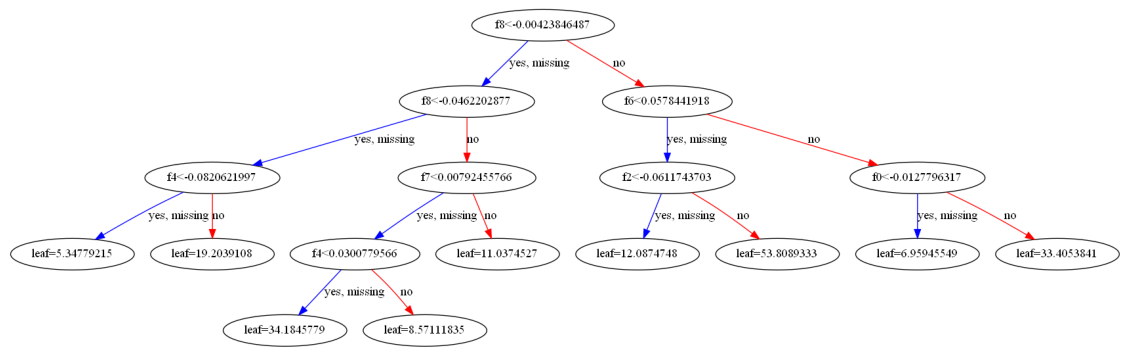

In [57]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(model, num_trees=0, ax=ax)
plt.show()

## 9. Evaluating the model with the training data

In [58]:
score = model.score(X_train, y_train)
training_predict = model.predict(X_train)
mse = mean_squared_error(y_train, training_predict)


In [59]:
print("R-squared:", score)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

R-squared: 0.9999757104172633
MSE:  0.1238049202644366
RMSE:  0.0619024601322183


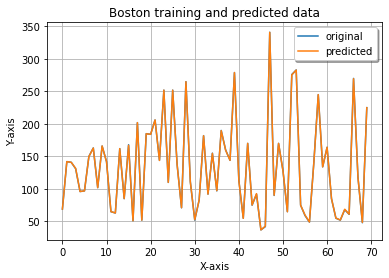

In [60]:
x_ax = range(len(y_train))
plt.plot(x_ax, y_train, label="original")
plt.plot(x_ax, training_predict, label="predicted")
plt.title("Training and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

## 10. Evaluating the model with test data

In [61]:
score = model.score(X_test, y_test)
test_predict = model.predict(X_test)
mse = mean_squared_error(y_test, test_predict)

In [62]:
print("R-squared:", score)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

R-squared: -0.2233049126261799
MSE:  4763.34408638656
RMSE:  2381.67204319328


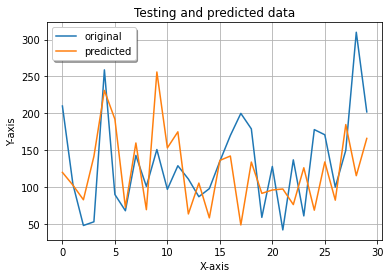

In [64]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, test_predict, label="predicted")
plt.title("Testing and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

## 11. Obtaining the model to be implemented in the microcontroller

In [50]:
code = m2c.export_to_c(model)

In [51]:
print(code)

double score(double * input) {
    double var0;
    if (input[8] >= -0.004238465) {
        if (input[6] >= 0.05784419) {
            if (input[0] >= -0.012779632) {
                var0 = 34.2;
            } else {
                var0 = 7.1250005;
            }
        } else {
            if (input[2] >= -0.06117437) {
                var0 = 55.08889;
            } else {
                var0 = 12.375001;
            }
        }
    } else {
        if (input[8] >= -0.046220288) {
            if (input[7] >= 0.007924558) {
                var0 = 11.300001;
            } else {
                if (input[4] >= 0.030077957) {
                    var0 = 8.775001;
                } else {
                    var0 = 34.997726;
                }
            }
        } else {
            if (input[4] >= -0.0820622) {
                var0 = 19.660715;
            } else {
                var0 = 5.4750004;
            }
        }
    }
    double var1;
    if (input[8] >= -0.010422352) {
   

## 12. Saves the template in a .h file

In [52]:
with open('./XGBRegressor.h', 'w') as file:
    file.write(code)